# Exploratory Data Analysis


## Download data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [5]:
import pandas as pd
import glob
import os

folder_path = '/content/drive/MyDrive/0. Fall 2024/SML 310/Final project/atp-matches'

# Use glob to get a list of all CSV files in the folder
all_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Get the intersection of columns across all csv files
common_columns = set(pd.read_csv(all_files[0]).columns)
for file in all_files[1:]:
    df = pd.read_csv(file)
    common_columns = common_columns.intersection(df.columns)

# Combine dataframes into single df, using shared columns only
df_list = []

for file in all_files:
    df = pd.read_csv(file, usecols=common_columns)
    df_list.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)

In [6]:
print(combined_df.columns)

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


In [7]:
combined_df

tourney_id                  tourney_name surface  \
0                              2000-301                      Auckland    Hard   
1                              2000-301                      Auckland    Hard   
2                              2000-301                      Auckland    Hard   
3                              2000-301                      Auckland    Hard   
4                              2000-301                      Auckland    Hard   
...                                 ...                           ...     ...   
73242  2024-M-DC-2024-WG2-PO-URU-MDA-01  Davis Cup WG2 PO: URU vs MDA    Clay   
73243  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   
73244  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   
73245  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   
73246  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   

       draw_size tourney_level  tourney_date  match_num  winner_id  \
0             32             A      20000110          1     103163   
1             32             A      20000110          2     102607   
2             32             A      20000110          3     103252   
3             32             A      20000110          4     103507   
4             32             A      20000110          5     102103   
...          ...           ...           ...        ...        ...   
73242          4             D      20240203          5     212051   
73243          4             D      20240202          1     122533   
73244          4             D      20240202          2     144748   
73245          4             D      20240202          4     122533   
73246          4             D      20240202          5     202475   

      winner_seed winner_entry  ... l_1stIn l_1stWon  l_2ndWon l_SvGms  \
0             1.0          NaN  ...    55.0     39.0      29.0    17.0   
1             NaN            Q  ...    32.0     25.0      18.0    12.0   
2             NaN          NaN  ...    33.0     20.0       7.0     8.0   
3             7.0          NaN  ...    43.0     29.0      14.0    10.0   
4             NaN            Q  ...    46.0     34.0      18.0    12.0   
...           ...          ...  ...     ...      ...       ...     ...   
73242         NaN          NaN  ...    30.0     17.0       7.0     6.0   
73243         NaN          NaN  ...    41.0     25.0       6.0     9.0   
73244         NaN          NaN  ...    51.0     25.0       7.0    11.0   
73245         NaN          NaN  ...    51.0     32.0      17.0    14.0   
73246         NaN          NaN  ...    53.0     25.0       8.0     8.0   

       l_bpSaved  l_bpFaced winner_rank winner_rank_points loser_rank  \
0            4.0        7.0        11.0             1612.0       63.0   
1            3.0        6.0       211.0              157.0       49.0   
2            7.0       11.0        48.0              726.0       59.0   
3            6.0        8.0        45.0              768.0       61.0   
4            5.0        9.0       167.0              219.0       34.0   
...          ...        ...         ...                ...        ...   
73242        8.0       14.0      1109.0                8.0      740.0   
73243        1.0        4.0       554.0               67.0      748.0   
73244        5.0       12.0       416.0              109.0        NaN   
73245        5.0        9.0       554.0               67.0      416.0   
73246        9.0       14.0       748.0               32.0        NaN   

      loser_rank_points  
0                 595.0  
1                 723.0  
2                 649.0  
3                 616.0  
4                 873.0  
...                 ...  
73242              34.0  
73243              32.0  
73244               NaN  
73245             109.0  
73246               NaN  

[73247 rows x 49 columns]

In [8]:
# Include year column and place it as the first col to show in df
combined_df['year'] = combined_df['tourney_date'].astype(str).str[:4]
columns = ['year'] + [col for col in combined_df.columns if col != 'year']
combined_df = combined_df[columns]
combined_df

year                        tourney_id                  tourney_name  \
0      2000                          2000-301                      Auckland   
1      2000                          2000-301                      Auckland   
2      2000                          2000-301                      Auckland   
3      2000                          2000-301                      Auckland   
4      2000                          2000-301                      Auckland   
...     ...                               ...                           ...   
73242  2024  2024-M-DC-2024-WG2-PO-URU-MDA-01  Davis Cup WG2 PO: URU vs MDA   
73243  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   
73244  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   
73245  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   
73246  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   

      surface  draw_size tourney_level  tourney_date  match_num  winner_id  \
0        Hard         32             A      20000110          1     103163   
1        Hard         32             A      20000110          2     102607   
2        Hard         32             A      20000110          3     103252   
3        Hard         32             A      20000110          4     103507   
4        Hard         32             A      20000110          5     102103   
...       ...        ...           ...           ...        ...        ...   
73242    Clay          4             D      20240203          5     212051   
73243    Hard          4             D      20240202          1     122533   
73244    Hard          4             D      20240202          2     144748   
73245    Hard          4             D      20240202          4     122533   
73246    Hard          4             D      20240202          5     202475   

      winner_seed  ... l_1stIn l_1stWon l_2ndWon  l_SvGms l_bpSaved  \
0             1.0  ...    55.0     39.0     29.0     17.0       4.0   
1             NaN  ...    32.0     25.0     18.0     12.0       3.0   
2             NaN  ...    33.0     20.0      7.0      8.0       7.0   
3             7.0  ...    43.0     29.0     14.0     10.0       6.0   
4             NaN  ...    46.0     34.0     18.0     12.0       5.0   
...           ...  ...     ...      ...      ...      ...       ...   
73242         NaN  ...    30.0     17.0      7.0      6.0       8.0   
73243         NaN  ...    41.0     25.0      6.0      9.0       1.0   
73244         NaN  ...    51.0     25.0      7.0     11.0       5.0   
73245         NaN  ...    51.0     32.0     17.0     14.0       5.0   
73246         NaN  ...    53.0     25.0      8.0      8.0       9.0   

       l_bpFaced  winner_rank winner_rank_points loser_rank loser_rank_points  
0            7.0         11.0             1612.0       63.0             595.0  
1            6.0        211.0              157.0       49.0             723.0  
2           11.0         48.0              726.0       59.0             649.0  
3            8.0         45.0              768.0       61.0             616.0  
4            9.0        167.0              219.0       34.0             873.0  
...          ...          ...                ...        ...               ...  
73242       14.0       1109.0                8.0      740.0              34.0  
73243        4.0        554.0               67.0      748.0              32.0  
73244       12.0        416.0              109.0        NaN               NaN  
73245        9.0        554.0               67.0      416.0             109.0  
73246       14.0        748.0               32.0        NaN               NaN  

[73247 rows x 50 columns]

## What percentage of data is missing? Do some variables have higher percentages of missing data than others?

In [9]:
# Count missing values per column in each year

missing_data_per_year = combined_df.groupby('year').apply(lambda x: x.isnull().sum())
print(missing_data_per_year)

      year  tourney_id  tourney_name  surface  draw_size  tourney_level  \
year                                                                      
2000     0           0             0        0          0              0   
2001     0           0             0        0          0              0   
2002     0           0             0        0          0              0   
2003     0           0             0        0          0              0   
2004     0           0             0        0          0              0   
2005     0           0             0        0          0              0   
2006     0           0             0        0          0              0   
2007     0           0             0        0          0              0   
2008     0           0             0        0          0              0   
2009     0           0             0        0          0              0   
2010     0           0             0        0          0              0   
2011     0           0   

<ipython-input-9-b7bc2470160a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_per_year = combined_df.groupby('year').apply(lambda x: x.isnull().sum())


In [10]:
# Explore number of values missing per column for a given year
year = str(2023)
missing_data = missing_data_per_year.loc[year]
print(missing_data)
print(f"\nTotal number of values per column: {len(combined_df[combined_df['year'] == year])}")

year                     0
tourney_id               0
tourney_name             0
surface                 53
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1736
winner_entry          2513
winner_name              0
winner_hand              0
winner_ht               19
winner_ioc               0
winner_age               1
loser_id                 0
loser_seed            2217
loser_entry           2291
loser_name               0
loser_hand               0
loser_ht                38
loser_ioc                0
loser_age                5
score                    0
best_of                  0
round                    0
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced              171
l

In [11]:
# Sum missing values across all years (columns) so we can determine what columns contain the most missing data
missing_data_per_column = combined_df.isnull().sum()
print(missing_data_per_column)
print(f"\nTotal number of values per column: {len(combined_df)}")

year                      0
tourney_id                0
tourney_name              0
surface                  53
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           42803
winner_entry          64018
winner_name               0
winner_hand               7
winner_ht              1711
winner_ioc                0
winner_age                7
loser_id                  0
loser_seed            56389
loser_entry           58240
loser_name                0
loser_hand               42
loser_ht               3323
loser_ioc                 0
loser_age                10
score                     0
best_of                   0
round                     0
minutes                7938
w_ace                  6469
w_df                   6469
w_svpt                 6469
w_1stIn                6469
w_1stWon               6469
w_2ndWon               6469
w_SvGms                6468
w_bpSaved           

In [12]:
# Exclude columns with more than half of total values in that column missing
filtered = missing_data_per_column[missing_data_per_column <= len(combined_df) / 2]
print(f"Variables removed: {set(missing_data_per_column.index) - set(filtered.index)}")

Variables removed: {'winner_entry', 'loser_seed', 'winner_seed', 'loser_entry'}


In [13]:
new_columns = filtered.index
new_columns

Index(['year', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [14]:
df_new = combined_df[new_columns]
df_new

year                        tourney_id                  tourney_name  \
0      2000                          2000-301                      Auckland   
1      2000                          2000-301                      Auckland   
2      2000                          2000-301                      Auckland   
3      2000                          2000-301                      Auckland   
4      2000                          2000-301                      Auckland   
...     ...                               ...                           ...   
73242  2024  2024-M-DC-2024-WG2-PO-URU-MDA-01  Davis Cup WG2 PO: URU vs MDA   
73243  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   
73244  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   
73245  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   
73246  2024  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA   

      surface  draw_size tourney_level  tourney_date  match_num  winner_id  \
0        Hard         32             A      20000110          1     103163   
1        Hard         32             A      20000110          2     102607   
2        Hard         32             A      20000110          3     103252   
3        Hard         32             A      20000110          4     103507   
4        Hard         32             A      20000110          5     102103   
...       ...        ...           ...           ...        ...        ...   
73242    Clay          4             D      20240203          5     212051   
73243    Hard          4             D      20240202          1     122533   
73244    Hard          4             D      20240202          2     144748   
73245    Hard          4             D      20240202          4     122533   
73246    Hard          4             D      20240202          5     202475   

                     winner_name  ... l_1stIn  l_1stWon l_2ndWon  l_SvGms  \
0                     Tommy Haas  ...    55.0      39.0     29.0     17.0   
1                  Juan Balcells  ...    32.0      25.0     18.0     12.0   
2                 Alberto Martin  ...    33.0      20.0      7.0      8.0   
3            Juan Carlos Ferrero  ...    43.0      29.0     14.0     10.0   
4                   Michael Sell  ...    46.0      34.0     18.0     12.0   
...                          ...  ...     ...       ...      ...      ...   
73242  Joaquin  Aguilar Cardozo   ...    30.0      17.0      7.0      6.0   
73243               Nam Hoang Ly  ...    41.0      25.0      6.0      9.0   
73244               Kris Van Wyk  ...    51.0      25.0      7.0     11.0   
73245               Nam Hoang Ly  ...    51.0      32.0     17.0     14.0   
73246             Philip Henning  ...    53.0      25.0      8.0      8.0   

       l_bpSaved l_bpFaced winner_rank  winner_rank_points loser_rank  \
0            4.0       7.0        11.0              1612.0       63.0   
1            3.0       6.0       211.0               157.0       49.0   
2            7.0      11.0        48.0               726.0       59.0   
3            6.0       8.0        45.0               768.0       61.0   
4            5.0       9.0       167.0               219.0       34.0   
...          ...       ...         ...                 ...        ...   
73242        8.0      14.0      1109.0                 8.0      740.0   
73243        1.0       4.0       554.0                67.0      748.0   
73244        5.0      12.0       416.0               109.0        NaN   
73245        5.0       9.0       554.0                67.0      416.0   
73246        9.0      14.0       748.0                32.0        NaN   

       loser_rank_points  
0                  595.0  
1                  723.0  
2                  649.0  
3                  616.0  
4                  873.0  
...                  ...  
73242               34.0  
73243               32.0  
73244                NaN  
73245              109.0  
73246                N

In [15]:
# Inspect percentage of remaining missing values per column across all years
missing_perc = df_new.isnull().sum() / len(df_new) * 100
print(f"Mean percentage of missing values for remaining cols = {missing_perc.mean()}")
print(f"Median percentage of missing values for remaining cols = {missing_perc.median()}")
missing_perc

Mean percentage of missing values for remaining cols = 3.9642223067749915
Median percentage of missing values for remaining cols = 1.3782134421887584


year                   0.000000
tourney_id             0.000000
tourney_name           0.000000
surface                0.072358
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_name            0.000000
winner_hand            0.009557
winner_ht              2.335932
winner_ioc             0.000000
winner_age             0.009557
loser_id               0.000000
loser_name             0.000000
loser_hand             0.057340
loser_ht               4.536705
loser_ioc              0.000000
loser_age              0.013652
score                  0.000000
best_of                0.000000
round                  0.000000
minutes               10.837304
w_ace                  8.831761
w_df                   8.831761
w_svpt                 8.831761
w_1stIn                8.831761
w_1stWon               8.831761
w_2ndWon               8.831761
w_SvGms                8.830396
w_bpSaved              8.831761
w_bpFaced              8.831761
l_ace                  8.831761
l_df                   8.831761
l_svpt                 8.831761
l_1stIn                8.831761
l_1stWon               8.831761
l_2ndWon               8.831761
l_SvGms                8.830396
l_bpSaved              8.831761
l_bpFaced              8.831761
winner_rank            0.772728
winner_rank_points     0.772728
loser_rank             1.983699
loser_rank_points      1.983699
dtype: float64

## Select initial variables for model

In [16]:
df = df_new[['year', 'tourney_name', 'surface',
       'tourney_level', 'winner_hand', 'winner_ht', 'winner_age',
       'loser_hand', 'loser_ht',
       'loser_age', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'loser_rank', 'round', 'draw_size']]
df

year                  tourney_name surface tourney_level winner_hand  \
0      2000                      Auckland    Hard             A           R   
1      2000                      Auckland    Hard             A           R   
2      2000                      Auckland    Hard             A           R   
3      2000                      Auckland    Hard             A           R   
4      2000                      Auckland    Hard             A           R   
...     ...                           ...     ...           ...         ...   
73242  2024  Davis Cup WG2 PO: URU vs MDA    Clay             D           U   
73243  2024  Davis Cup WG2 PO: VIE vs RSA    Hard             D           R   
73244  2024  Davis Cup WG2 PO: VIE vs RSA    Hard             D           U   
73245  2024  Davis Cup WG2 PO: VIE vs RSA    Hard             D           R   
73246  2024  Davis Cup WG2 PO: VIE vs RSA    Hard             D           R   

       winner_ht  winner_age loser_hand  loser_ht  loser_age  ...  l_svpt  \
0          188.0        21.7          L     180.0       31.1  ...   106.0   
1          190.0        24.5          L     183.0       24.3  ...    74.0   
2          175.0        21.3          R     173.0       26.5  ...    56.0   
3          183.0        19.9          R     185.0       18.4  ...    70.0   
4          180.0        27.3          R     185.0       23.7  ...    92.0   
...          ...         ...        ...       ...        ...  ...     ...   
73242        NaN        18.8          U       NaN       21.8  ...    61.0   
73243        NaN        26.9          R       NaN       23.2  ...    56.0   
73244        NaN        27.3          R     183.0       26.4  ...    71.0   
73245        NaN        26.9          U       NaN       27.3  ...    86.0   
73246        NaN        23.2          R     183.0       26.4  ...    71.0   

       l_1stIn  l_1stWon  l_2ndWon  l_bpSaved  l_bpFaced  winner_rank  \
0         55.0      39.0      29.0        4.0        7.0         11.0   
1         32.0      25.0      18.0        3.0        6.0        211.0   
2         33.0      20.0       7.0        7.0       11.0         48.0   
3         43.0      29.0      14.0        6.0        8.0         45.0   
4         46.0      34.0      18.0        5.0        9.0        167.0   
...        ...       ...       ...        ...        ...          ...   
73242     30.0      17.0       7.0        8.0       14.0       1109.0   
73243     41.0      25.0       6.0        1.0        4.0        554.0   
73244     51.0      25.0       7.0        5.0       12.0        416.0   
73245     51.0      32.0      17.0        5.0        9.0        554.0   
73246     53.0      25.0       8.0        9.0       14.0        748.0   

       loser_rank  round  draw_size  
0            63.0    R32         32  
1            49.0    R32         32  
2            59.0    R32         32  
3            61.0    R32         32  
4            34.0    R32         32  
...           ...    ...        ...  
73242       740.0     RR          4  
73243       748.0     RR          4  
73244         NaN     RR          4  
73245       416.0     RR          4  
73246         NaN     RR          4  

[73247 rows x 31 columns]

In [17]:
print(f"Excluded variables = {set(df_new.columns) - set(df.columns)}")

Excluded variables = {'tourney_date', 'loser_id', 'loser_ioc', 'winner_id', 'winner_name', 'score', 'best_of', 'l_SvGms', 'w_SvGms', 'winner_ioc', 'loser_rank_points', 'tourney_id', 'match_num', 'winner_rank_points', 'loser_name'}


## General sanity checks

In [18]:
# Identify and remove duplicate rows if needed
print(f"Number of duplicate rows removed: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicate rows removed: 1


In [19]:
df.shape

(73246, 31)

In [20]:
# Convert variables to correct data types

# Convert relevant columns to numeric types, handling errors
numeric_cols = ['year', 'winner_ht', 'winner_age', 'loser_ht', 'loser_age', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank', 'draw_size']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert other columns to categorical type
categorical_cols = ['tourney_name', 'surface', 'tourney_level', 'winner_hand', 'loser_hand', 'round']

for col in categorical_cols:
  df[col] = df[col].astype('category')

print(df.dtypes)

year                int64
tourney_name     category
surface          category
tourney_level    category
winner_hand      category
winner_ht         float64
winner_age        float64
loser_hand       category
loser_ht          float64
loser_age         float64
minutes           float64
w_ace             float64
w_df              float64
w_svpt            float64
w_1stIn           float64
w_1stWon          float64
w_2ndWon          float64
w_bpSaved         float64
w_bpFaced         float64
l_ace             float64
l_df              float64
l_svpt            float64
l_1stIn           float64
l_1stWon          float64
l_2ndWon          float64
l_bpSaved         float64
l_bpFaced         float64
winner_rank       float64
loser_rank        float64
round            category
draw_size           int64
dtype: object


<ipython-input-20-912d8ddfb738>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-20-912d8ddfb738>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-20-912d8ddfb738>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [21]:
# Verify unique values of the round column
unique_rounds = df['round'].unique()
print(unique_rounds)

['R32', 'R16', 'QF', 'SF', 'F', 'R64', 'R128', 'RR', 'BR', 'ER']
Categories (10, object): ['BR', 'ER', 'F', 'QF', ..., 'R32', 'R64', 'RR', 'SF']


The meaning of RR, BR, and ER are not specified in the dictionary on GitHub. The following definitions are a best-guess.

'RR': Round Robin – This refers to a tournament format where each player or team competes against every other participant in the group. This format is often used in round-robin groups, such as in the ATP Finals or some smaller events, where players play against each other until a winner is determined based on total wins.

'BR': Bonus Round – This is an uncommon label, but in some datasets, "BR" could indicate a special round, perhaps a final round of a specific event or stage that carries extra significance, such as bonus points in certain tournaments. Special events, such as Olympics tennis tournaments, have this round annotation.

'ER': Exhibition Round – This could refer to exhibition matches, which are unofficial matches played outside of the standard tournament structure. These exhibition matches are usually for promotional purposes, charity, or to give players extra practice.

In [22]:
df[df['round'] == 'ER']

year  tourney_name surface tourney_level winner_hand  winner_ht  \
23586  2007      Adelaide    Hard             A           R      185.0   
23587  2007      Adelaide    Hard             A           R      185.0   
23588  2007      Adelaide    Hard             A           R      198.0   
23589  2007      Adelaide    Hard             A           L      201.0   
23590  2007      Adelaide    Hard             A           R      180.0   
23591  2007      Adelaide    Hard             A           R      183.0   
23592  2007      Adelaide    Hard             A           R      180.0   
23593  2007      Adelaide    Hard             A           R      198.0   
24549  2007     Las Vegas    Hard             A           R      173.0   
24550  2007     Las Vegas    Hard             A           R      185.0   
24551  2007     Las Vegas    Hard             A           R      198.0   
24552  2007     Las Vegas    Hard             A           L      188.0   
24553  2007     Las Vegas    Hard             A           R      180.0   
24554  2007     Las Vegas    Hard             A           R      190.0   
24555  2007     Las Vegas    Hard             A           R      180.0   
24556  2007     Las Vegas    Hard             A           R      190.0   
24836  2007  Delray Beach    Hard             A           R      188.0   
24837  2007  Delray Beach    Hard             A           R      188.0   
24838  2007  Delray Beach    Hard             A           R      196.0   
24839  2007  Delray Beach    Hard             A           L      185.0   
24840  2007  Delray Beach    Hard             A           L      175.0   
24841  2007  Delray Beach    Hard             A           R      183.0   
24842  2007  Delray Beach    Hard             A           R      198.0   
24843  2007  Delray Beach    Hard             A           R      188.0   
24906  2007  Buenos Aires    Clay             A           R      185.0   
24907  2007  Buenos Aires    Clay             A           R      188.0   
24908  2007  Buenos Aires    Clay             A           R      185.0   
24909  2007  Buenos Aires    Clay             A           R      183.0   
24910  2007  Buenos Aires    Clay             A           R      178.0   
24911  2007  Buenos Aires    Clay             A           R      185.0   
24912  2007  Buenos Aires    Clay             A           L      185.0   
24913  2007  Buenos Aires    Clay             A           L      173.0   

       winner_age loser_hand  loser_ht  loser_age  ...  l_svpt  l_1stIn  \
23586        18.8          R     180.0       26.8  ...    81.0     47.0   
23587        22.2          R     183.0       27.5  ...    59.0     35.0   
23588        24.5          R     185.0       23.7  ...    56.0     30.0   
23589        21.4          R     196.0       24.5  ...    83.0     47.0   
23590        26.6          L     193.0       23.6  ...    59.0     39.0   
23591        27.3          R     183.0       26.8  ...    49.0     38.0   
23592        25.2          R     196.0       27.8  ...   101.0     72.0   
23593        18.2          R     178.0       22.3  ...    57.0     31.0   
24549        25.5          R     190.0       27.2  ...    82.0     52.0   
24550        19.0          R     196.0       24.6  ...    88.0     44.0   
24551        19.3          L     183.0       22.7  ...    46.0     29.0   
24552        25.4          L     201.0       21.5  ...   114.0     64.0   
24553        25.4          R     185.0       22.4  ...    84.0     46.0   
24554        30.4          R     196.0       28.0  ...    60.0     40.0   
24555        31.9          R     175.0       27.3  ...    88.0     45.0   
24556        23.9          R     180.0       23.5  ...    51.0     30.0   
24836        34.4          R     190.0       30.6  ...    79.0     56.0   
24837        20.3          L     183.0       22.6  ...    77.0     48.0   
24838        19.5          R     173.0       28.7  ...    70.0     51.0   
24839        23.2          R     193.0       21.0  ...    67.0  

In [23]:
df[df['round'] == 'BR']

year      tourney_name surface tourney_level winner_hand  winner_ht  \
3042   2000   Sydney Olympics    Hard             A           R      185.0   
16073  2004   Athens Olympics    Hard             A           R      183.0   
28910  2008  Beijing Olympics    Hard             A           R      188.0   
40574  2012   London Olympics   Grass             A           R      198.0   
52402  2016      Rio Olympics    Hard             A           R      178.0   
56004  2017    NextGen Finals    Hard             F           R      198.0   
58899  2018    NextGen Finals    Hard             F           R      188.0   
63257  2021    Tokyo Olympics    Hard             A           R      188.0   

       winner_age loser_hand  loser_ht  loser_age  ...  l_svpt  l_1stIn  \
3042         21.6          R     185.0       19.1  ...     NaN      NaN   
16073        24.0          R     188.0       23.3  ...     NaN      NaN   
28910        21.2          R     185.0       28.6  ...     NaN      NaN   
40574        23.8          R     188.0       25.1  ...     NaN      NaN   
52402        26.6          L     185.0       30.1  ...   106.0     82.0   
56004        21.7          R     188.0       20.9  ...     NaN      NaN   
58899        21.0          R     183.0       21.5  ...    95.0     68.0   
63257        30.0          R     188.0       34.1  ...     NaN      NaN   

       l_1stWon  l_2ndWon  l_bpSaved  l_bpFaced  winner_rank  loser_rank  \
3042        NaN       NaN        NaN        NaN         62.0        36.0   
16073       NaN       NaN        NaN        NaN         21.0        28.0   
28910       NaN       NaN        NaN        NaN          3.0         7.0   
40574       NaN       NaN        NaN        NaN          9.0         2.0   
52402      49.0      11.0        8.0       13.0          7.0         5.0   
56004       NaN       NaN        NaN        NaN         63.0        51.0   
58899      48.0      16.0       10.0       12.0         68.0        76.0   
63257       NaN       NaN        NaN        NaN         11.0         1.0   

       round  draw_size  
3042      BR         64  
16073     BR         64  
28910     BR         64  
40574     BR         64  
52402     BR         64  
56004     BR          8  
58899     BR          8  
63257     BR         64  

[8 rows x 31 columns]

## Handle missing data

In [24]:
# Count number of missing values per column in df
missing_data_per_column = df.isnull().sum()
print(f"Number of missing values: {missing_data_per_column.sum()}")

Number of missing values: 118595


In [25]:
with_missing_data = df.copy()

In [26]:
print(numeric_cols)
print(categorical_cols)
print(len(numeric_cols) + len(categorical_cols))

['year', 'winner_ht', 'winner_age', 'loser_ht', 'loser_age', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank', 'draw_size']
['tourney_name', 'surface', 'tourney_level', 'winner_hand', 'loser_hand', 'round']
31


In [27]:
# Fill in missing values with the median for numeric columns for each group based on tourney_name and year

# Group data by 'tourney_name' and 'year'
# observed = True includes the categories that appear in the data,
# which avoids creating empty groups for categories that do not appear in the data
grouped = df.groupby(['tourney_name', 'year'], observed=True)

# Iterate through numeric columns and fill missing values with the median for each group
for col in numeric_cols:
  col_median = df[col].median()
  df.loc[:, col] = grouped[col].transform(lambda x: x.fillna(x.median()) if not x.isna().all() else col_median)

In [28]:
# Remove all rows where categorical variables contain missing values
df = df.dropna(subset=categorical_cols)

In [29]:
# Confirm there are no missing values remaining
missing_data_per_column = df.isnull().sum()
print(f"Number of missing values remaining: {missing_data_per_column.sum()}")
missing_data_per_column

Number of missing values remaining: 0


year             0
tourney_name     0
surface          0
tourney_level    0
winner_hand      0
winner_ht        0
winner_age       0
loser_hand       0
loser_ht         0
loser_age        0
minutes          0
w_ace            0
w_df             0
w_svpt           0
w_1stIn          0
w_1stWon         0
w_2ndWon         0
w_bpSaved        0
w_bpFaced        0
l_ace            0
l_df             0
l_svpt           0
l_1stIn          0
l_1stWon         0
l_2ndWon         0
l_bpSaved        0
l_bpFaced        0
winner_rank      0
loser_rank       0
round            0
draw_size        0
dtype: int64

In [30]:
# Determine proportion of data that was excluded upon removing rows with missing entries for categorical variables
print(f"Percentage of data removed = {((len(with_missing_data) - len(df)) / len(with_missing_data)) * 100}%")

Percentage of data removed = 0.13789148895502826%


In [31]:
# Verify that no columns have been accidentally removed upon excluding missing data
len(df.columns) == len(numeric_cols) + len(categorical_cols)

True

## Outliers

### Inspect distributions BEFORE outlier removal

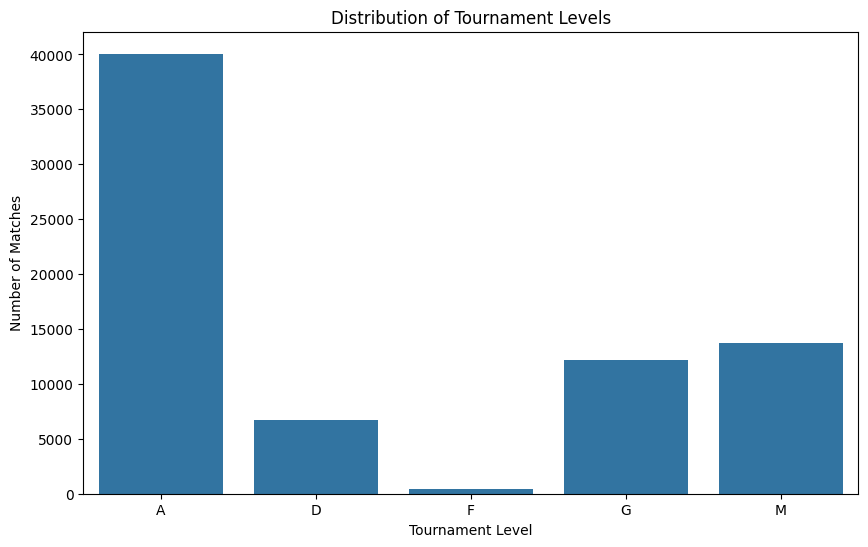

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the 'tourney_level' column
plt.figure(figsize=(10, 6))
sns.countplot(x='tourney_level', data=df)
plt.title('Distribution of Tournament Levels')
plt.xlabel('Tournament Level')
plt.ylabel('Number of Matches')
plt.show()

Distribution of tourney_name:
tourney_name
Australian Open                 0.043407
Roland Garros                   0.041671
Wimbledon                       0.039934
US Open                         0.034726
Miami Masters                   0.031171
                                  ...   
Davis Cup WG2 PO: RSA vs LUX    0.000000
Davis Cup WG2 PO: BOL vs GEO    0.000000
Davis Cup WG2 PO: INA vs VIE    0.000000
Davis Cup WG2 PO: EGY vs PAR    0.000000
Davis Cup WG2 PO: BAR vs POC    0.000000
Name: proportion, Length: 1906, dtype: float64


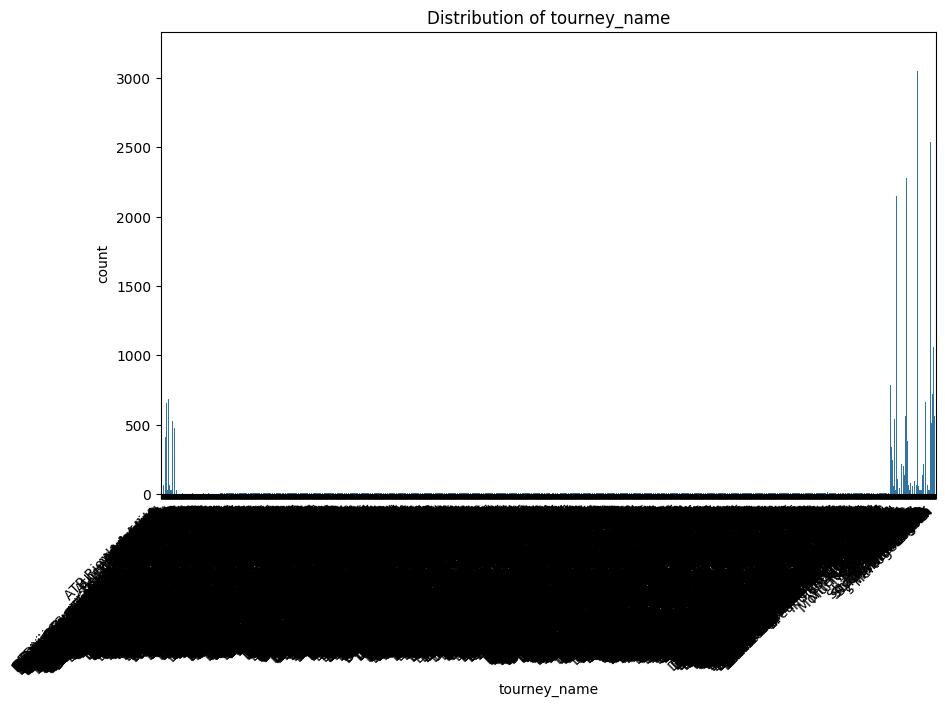

Distribution of surface:
surface
Hard      0.544986
Clay      0.326324
Grass     0.100813
Carpet    0.027876
Name: proportion, dtype: float64


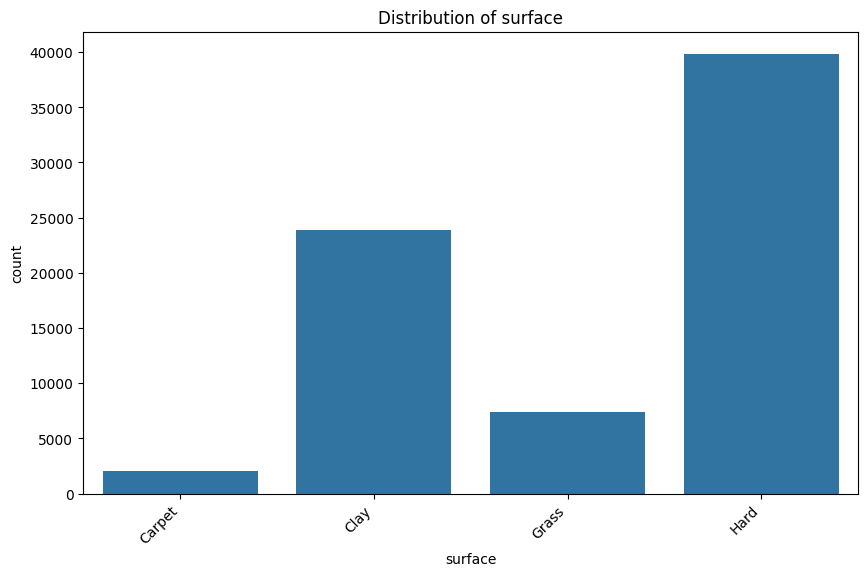

Distribution of tourney_level:
tourney_level
A    0.547789
M    0.187819
G    0.166683
D    0.092146
F    0.005564
Name: proportion, dtype: float64


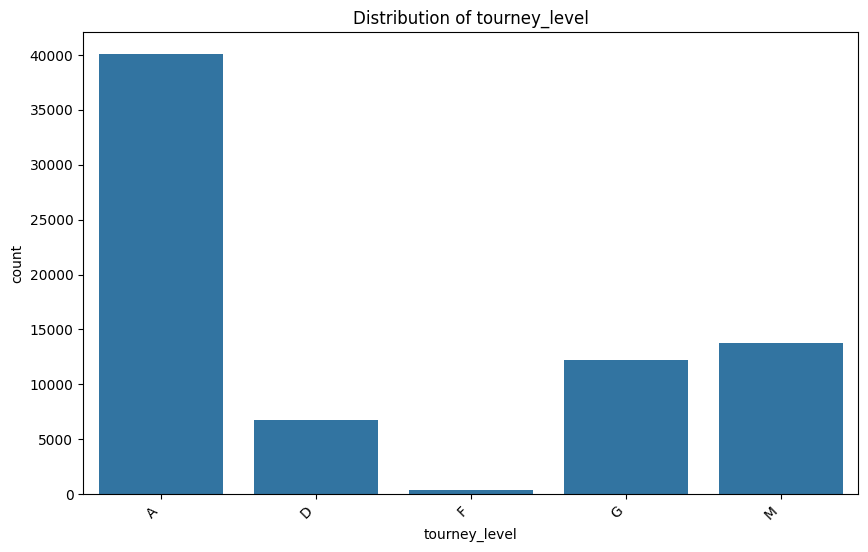

Distribution of winner_hand:
winner_hand
R    0.871639
L    0.122496
U    0.005783
A    0.000082
Name: proportion, dtype: float64


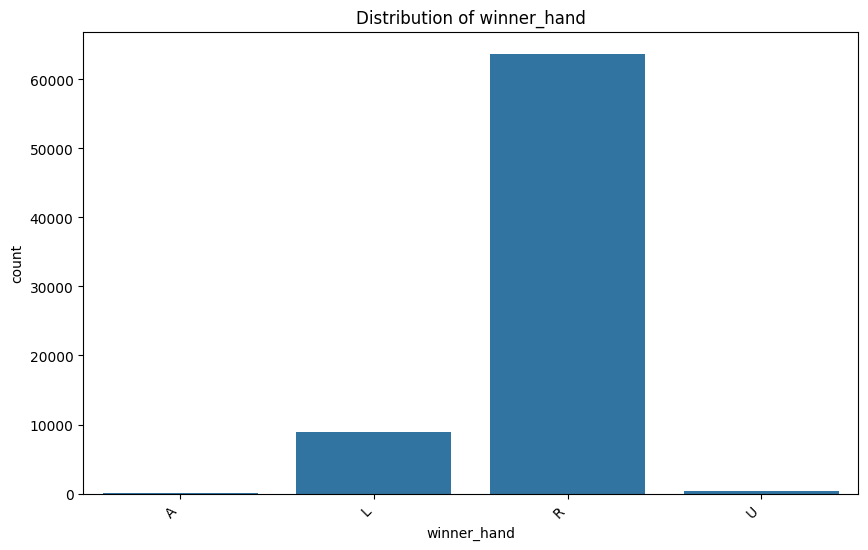

Distribution of loser_hand:
loser_hand
R    0.853729
L    0.131779
U    0.014423
A    0.000068
Name: proportion, dtype: float64


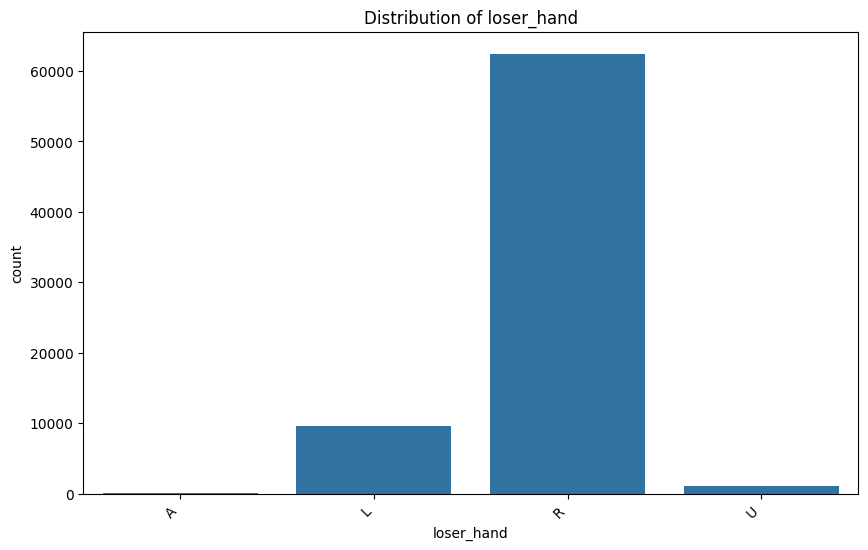

Distribution of round:
round
R32     0.314389
R16     0.170401
R64     0.151220
RR      0.106309
R128    0.105434
QF      0.085638
SF      0.043803
F       0.022257
ER      0.000437
BR      0.000109
Name: proportion, dtype: float64


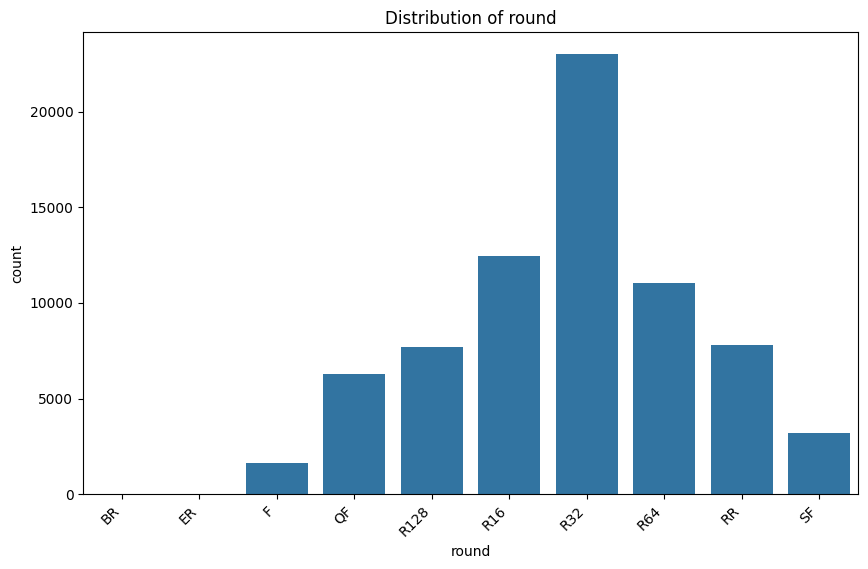

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the distribution of categorical variables
for col in categorical_cols:
    print(f"Distribution of {col}:")
    print(df[col].value_counts(normalize=True))  # Normalize to get proportions
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

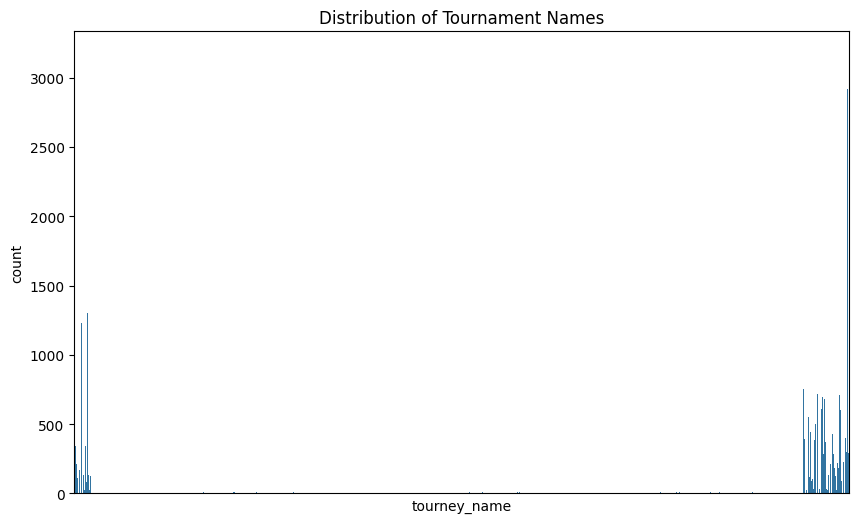

In [34]:
# Distribution of tournament names. Exclude name labels on x-axis

plt.figure(figsize=(10, 6))
sns.countplot(x='tourney_name', data=df)
plt.title('Distribution of Tournament Names')
plt.xticks([]) # Remove x-axis labels
plt.show()

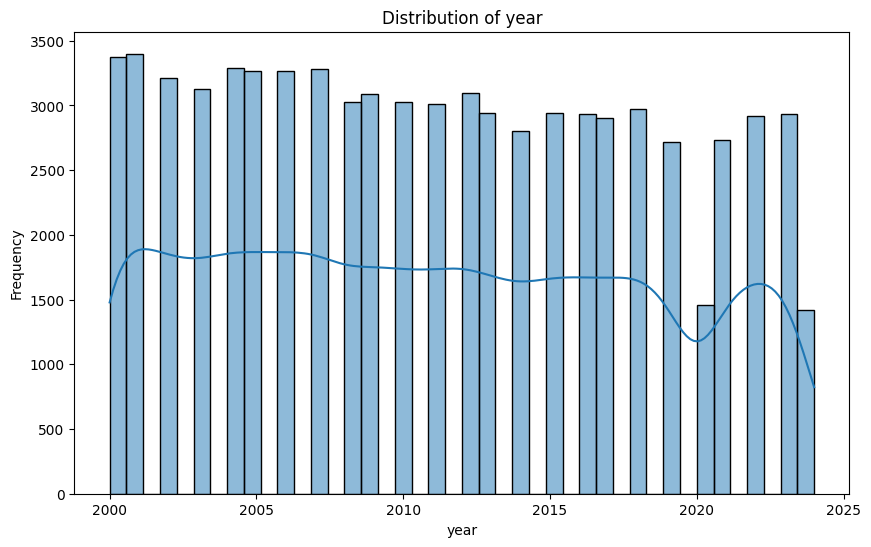

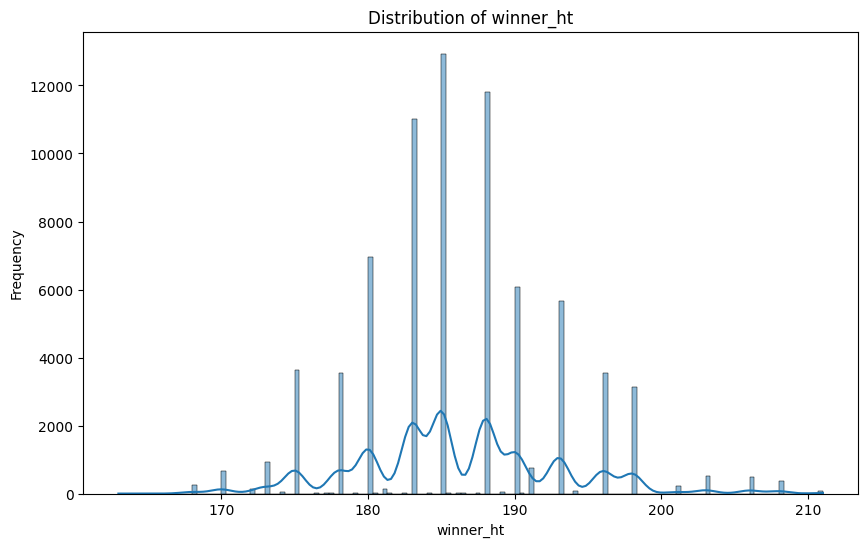

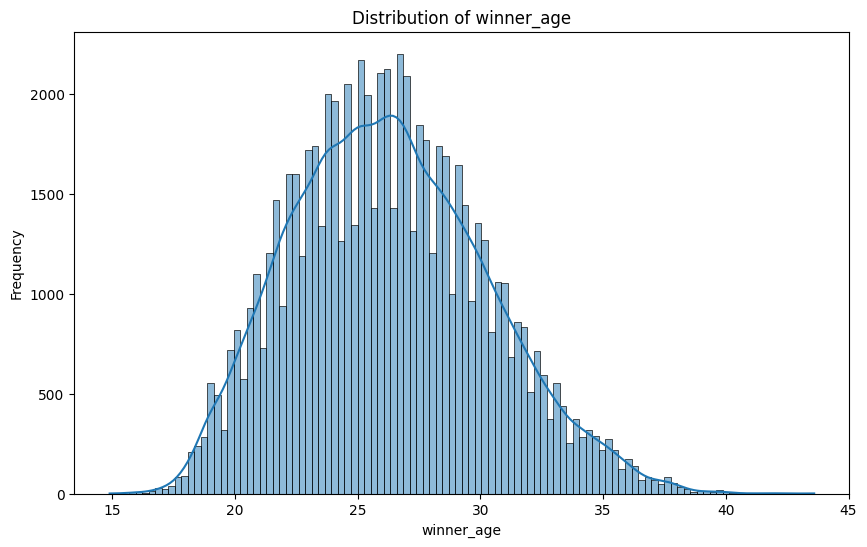

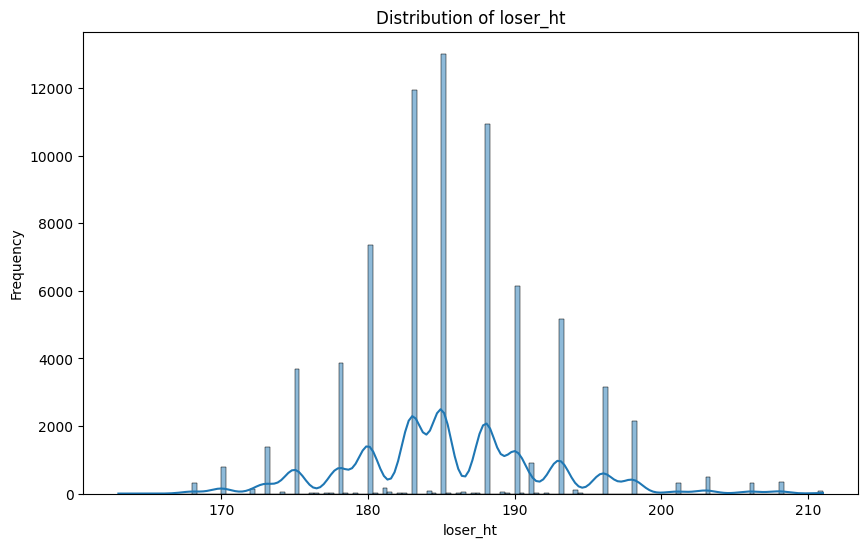

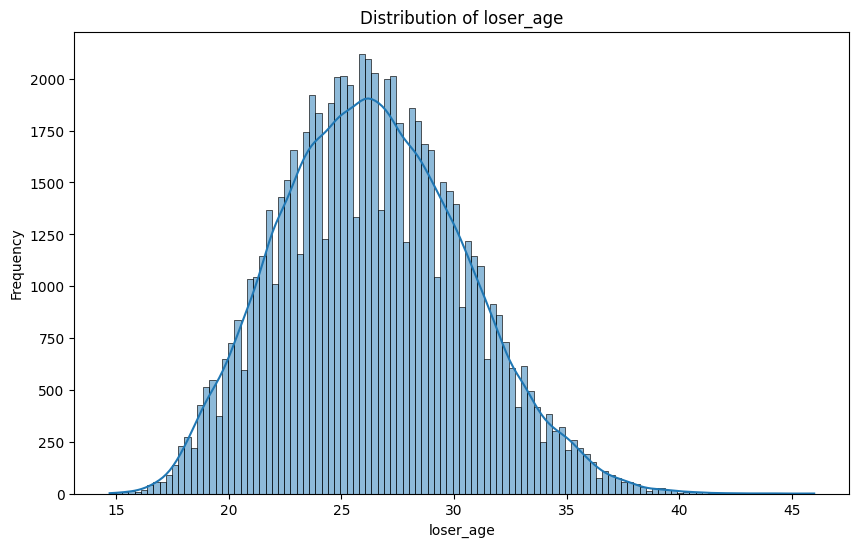

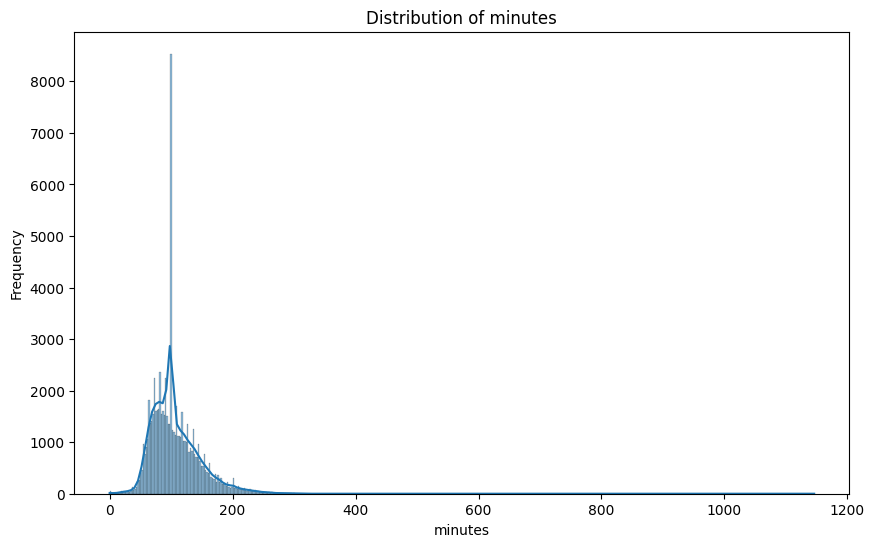

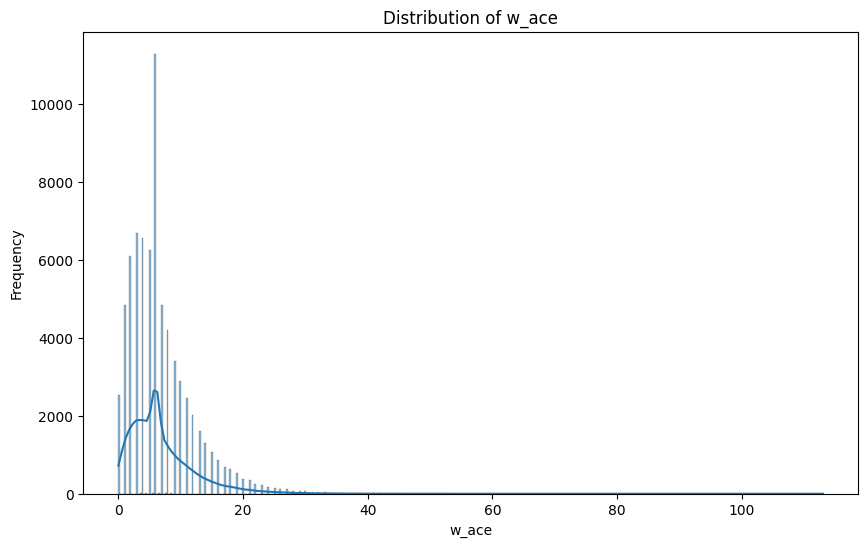

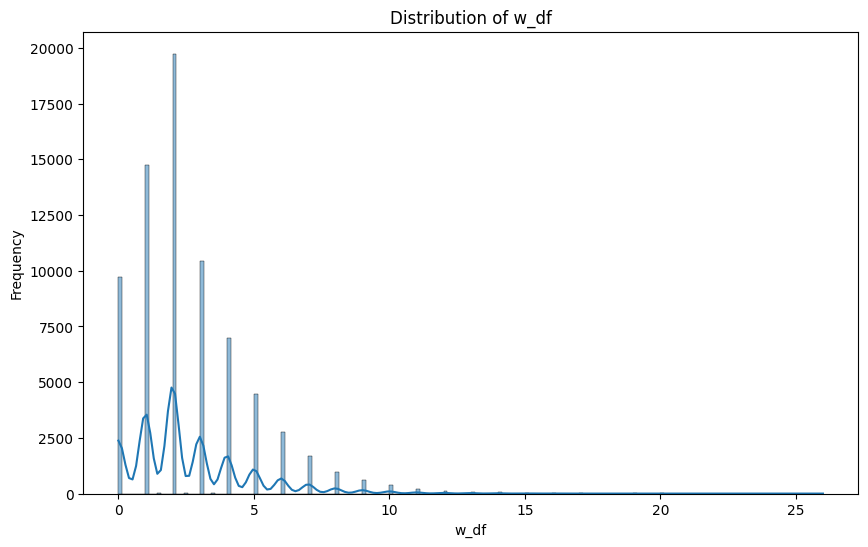

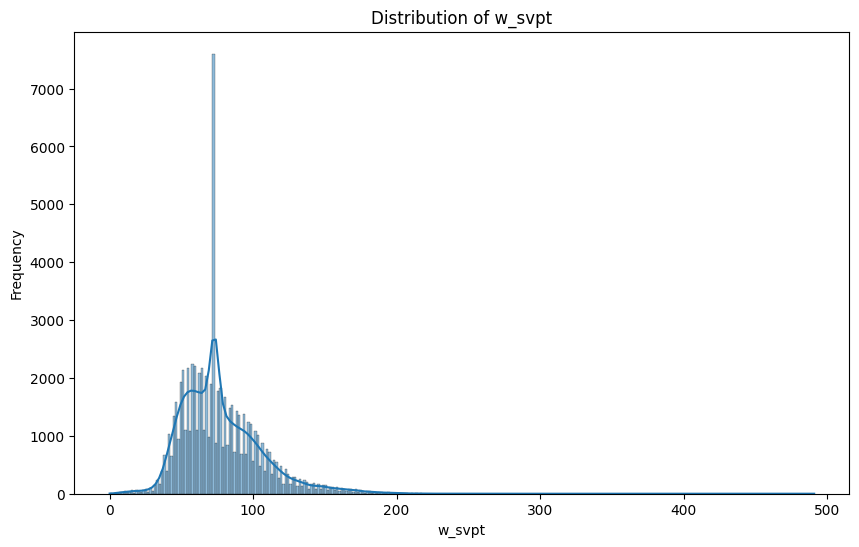

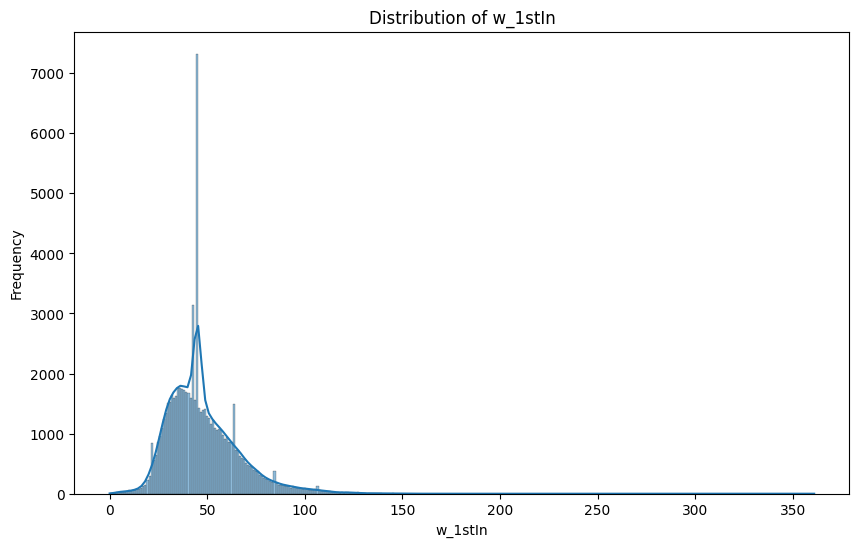

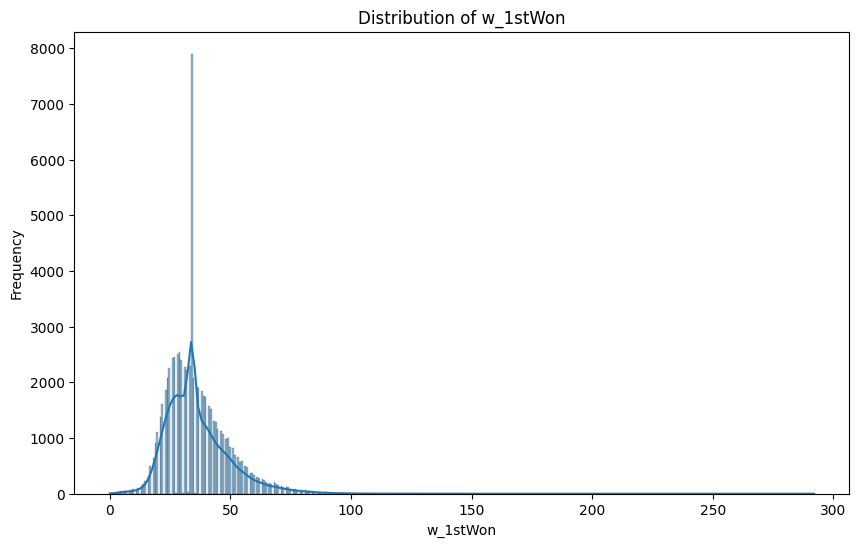

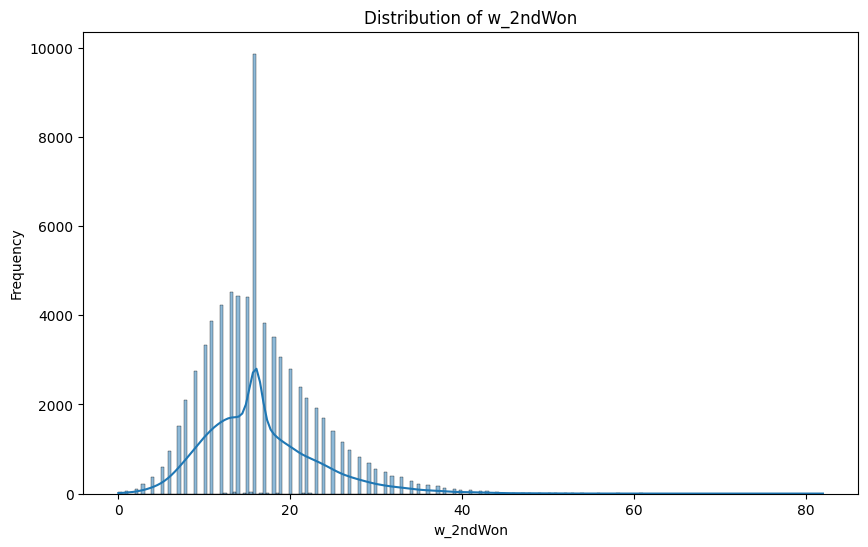

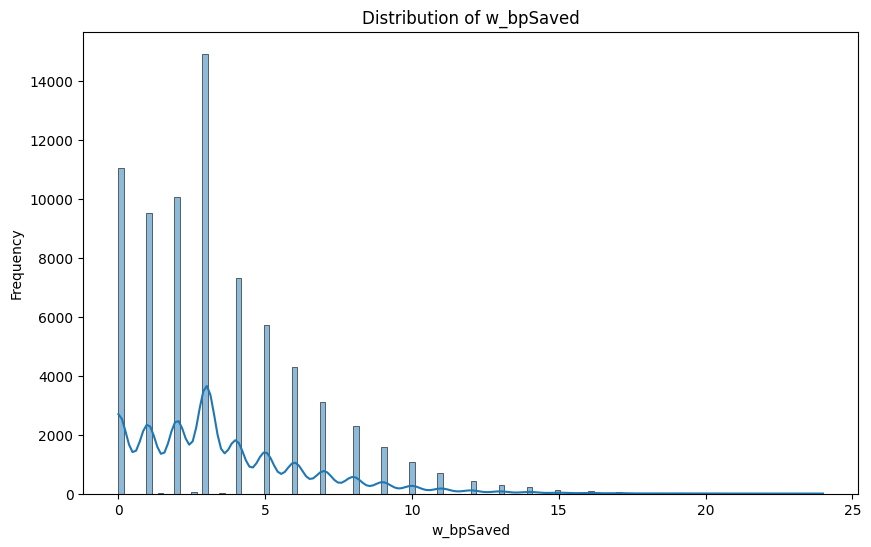

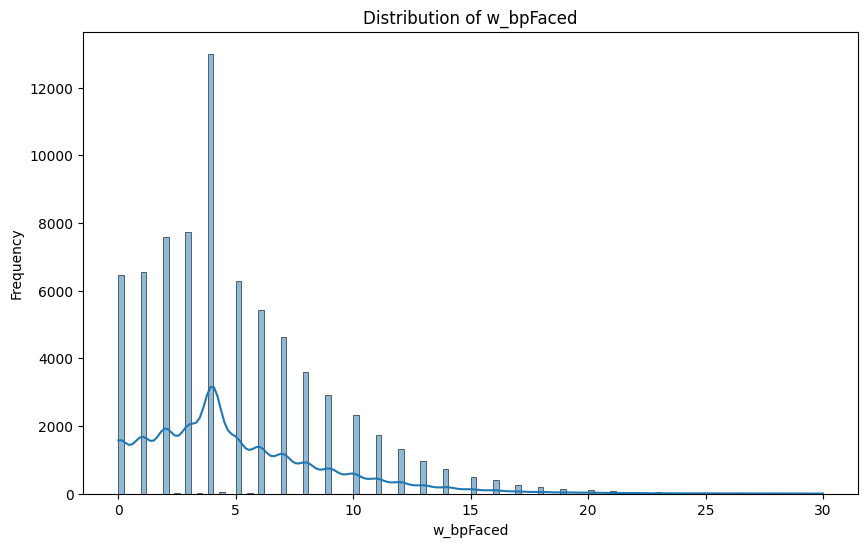

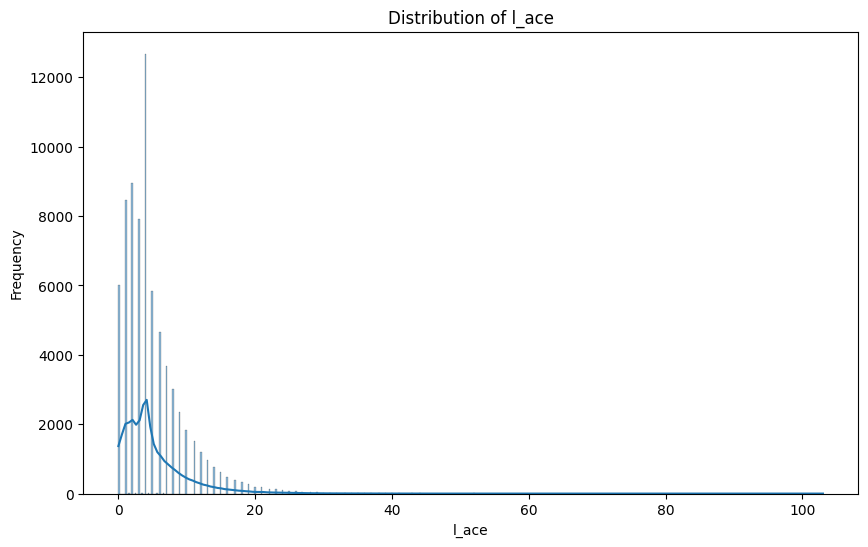

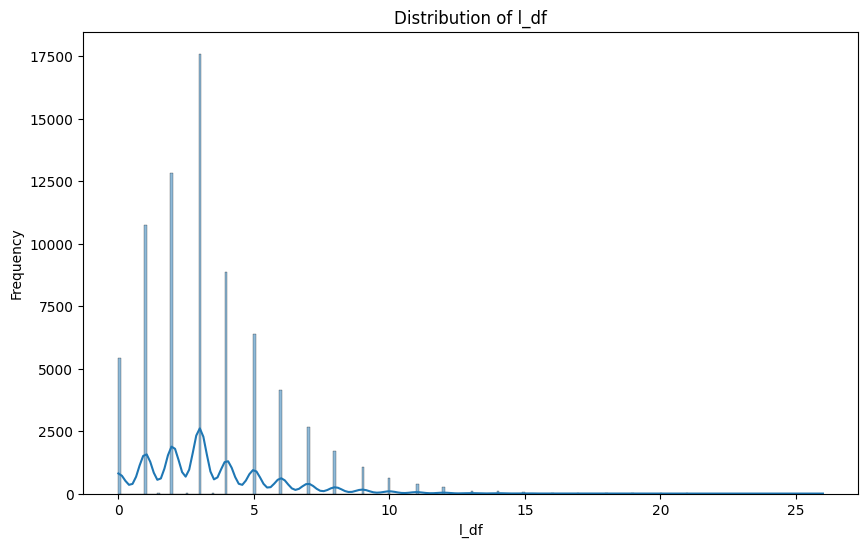

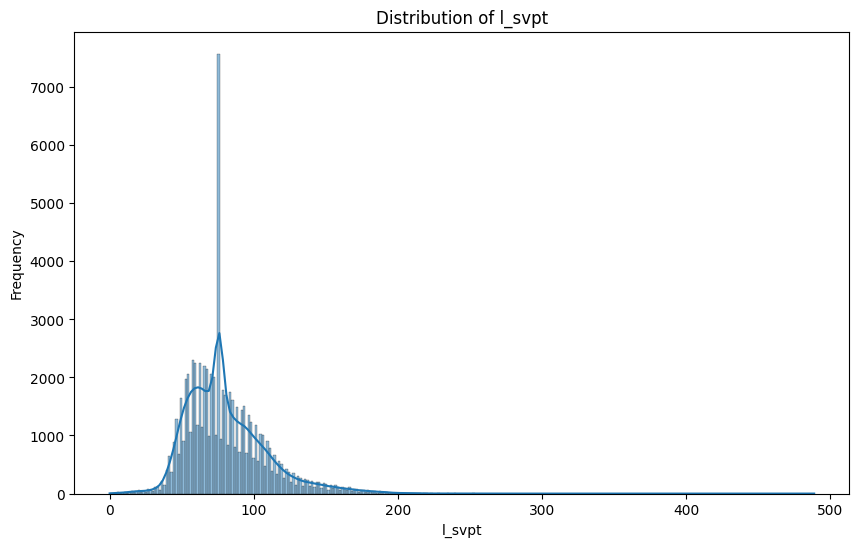

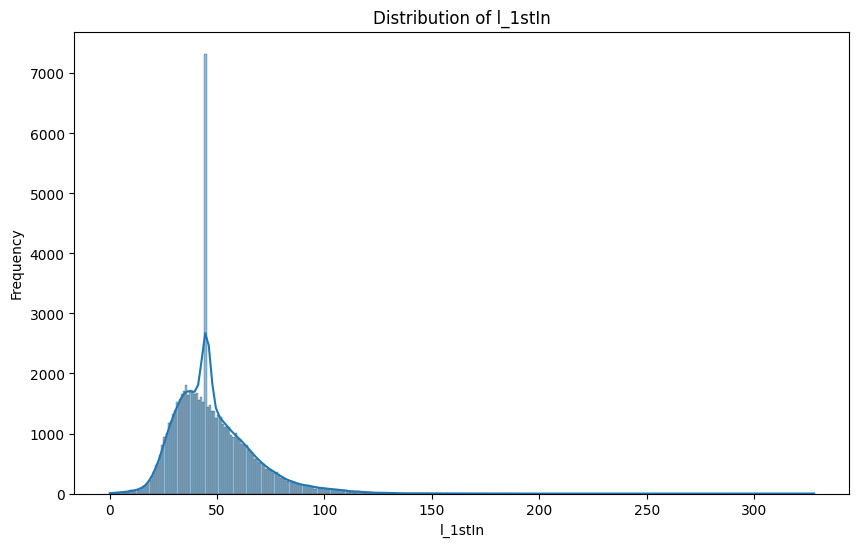

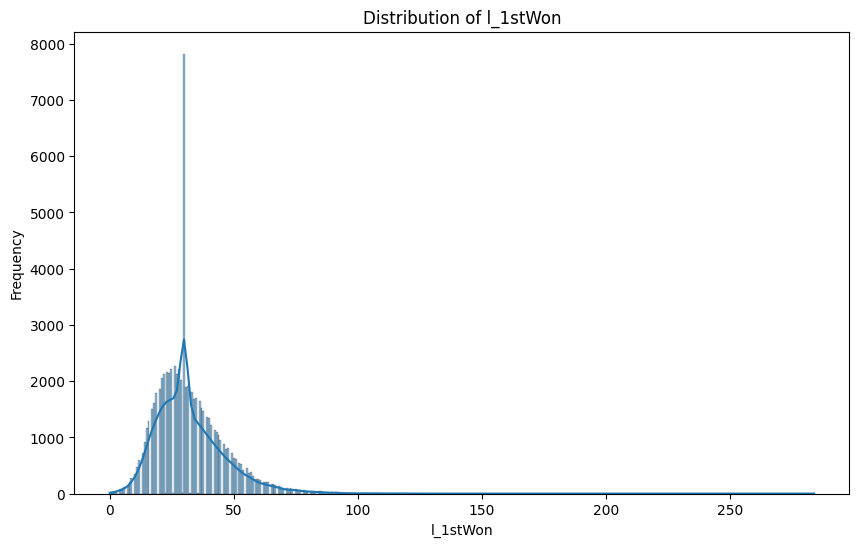

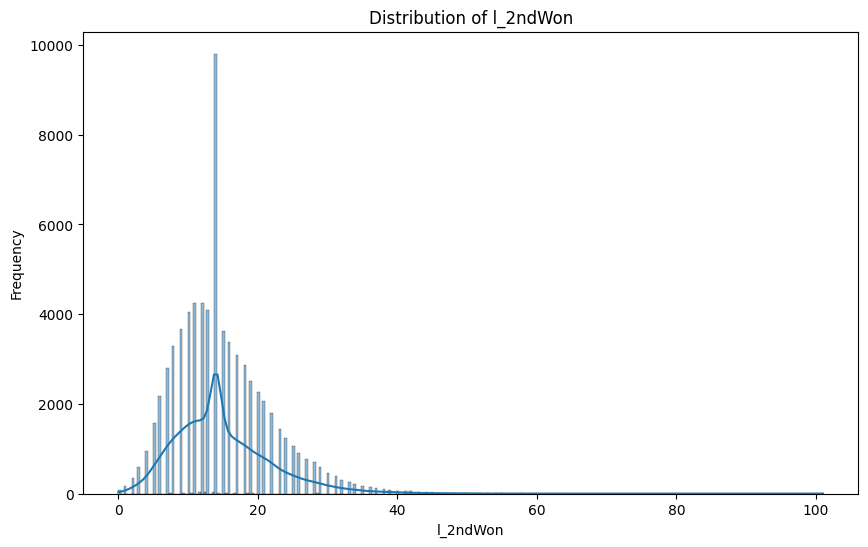

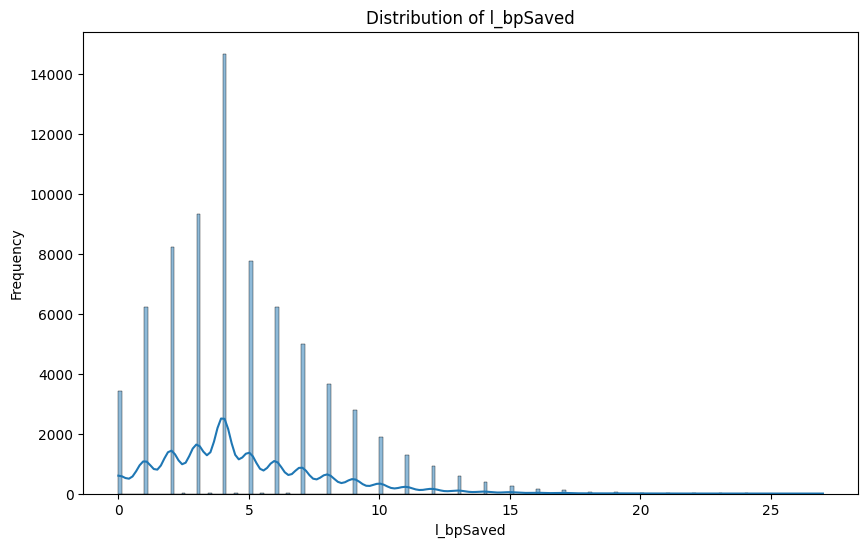

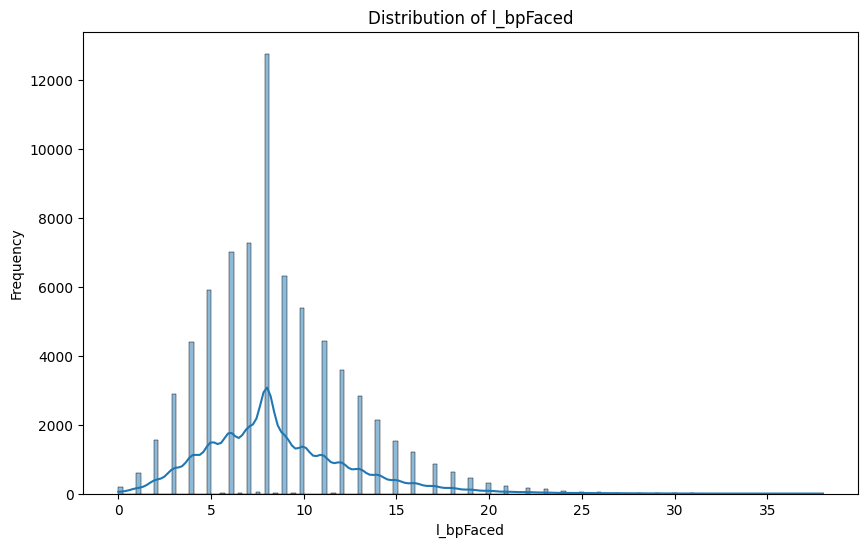

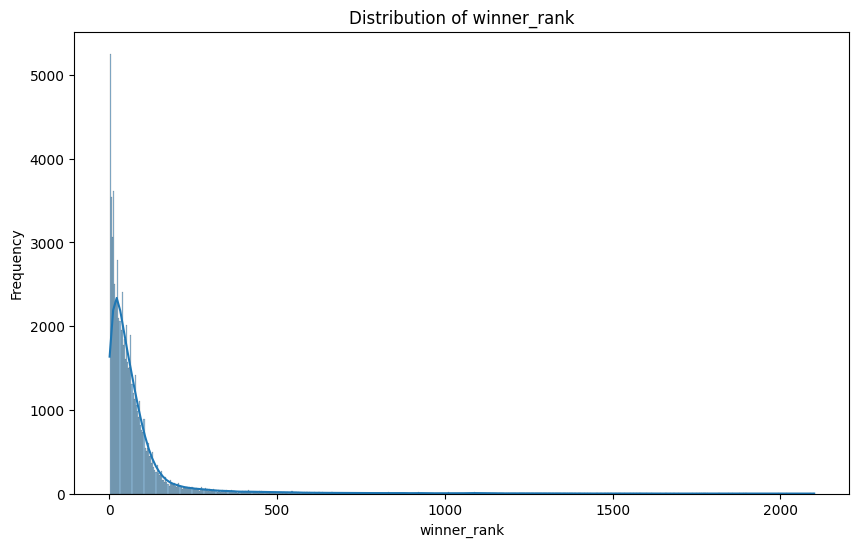

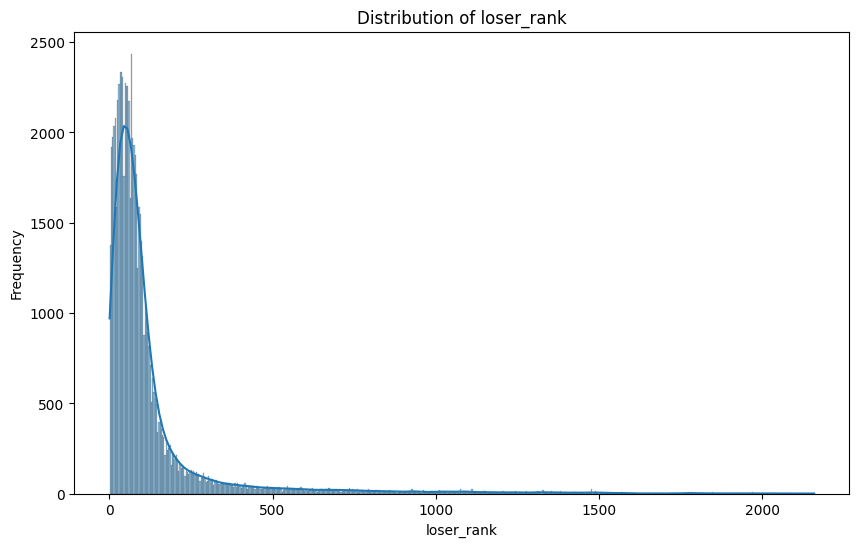

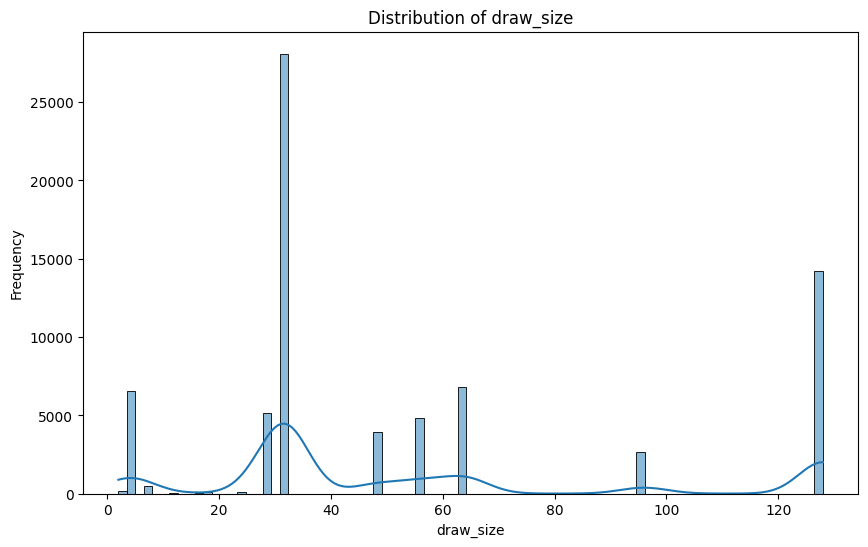

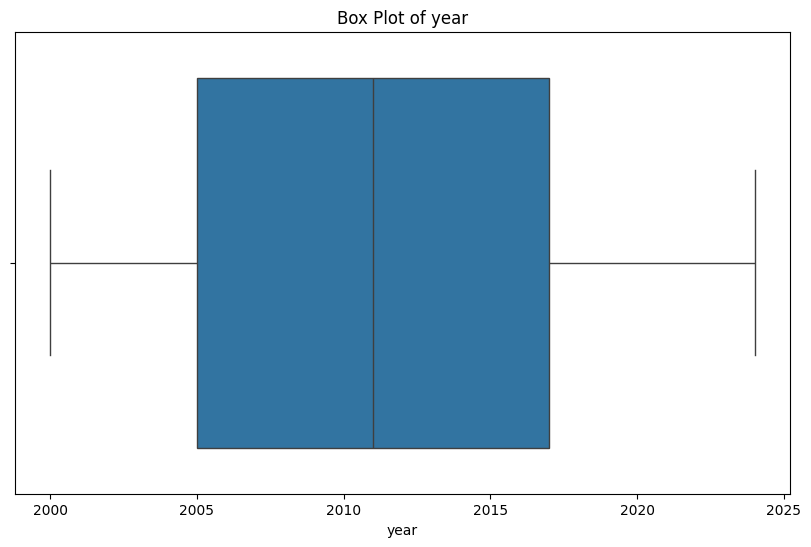

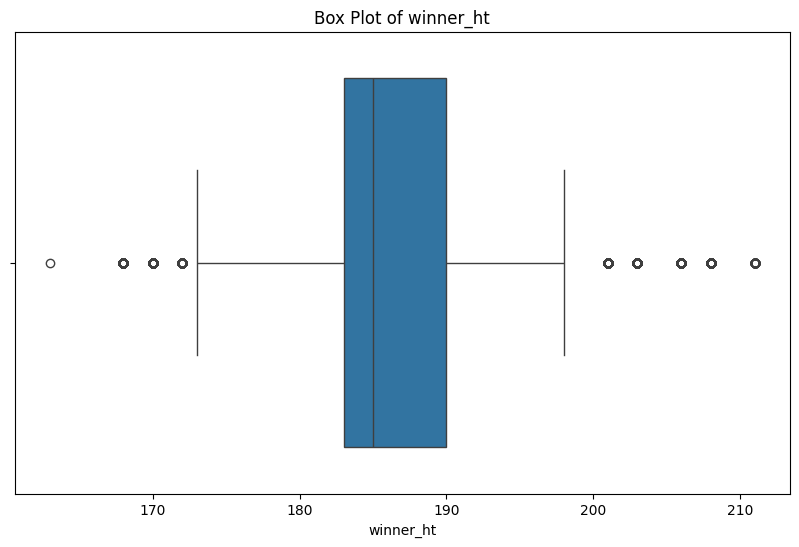

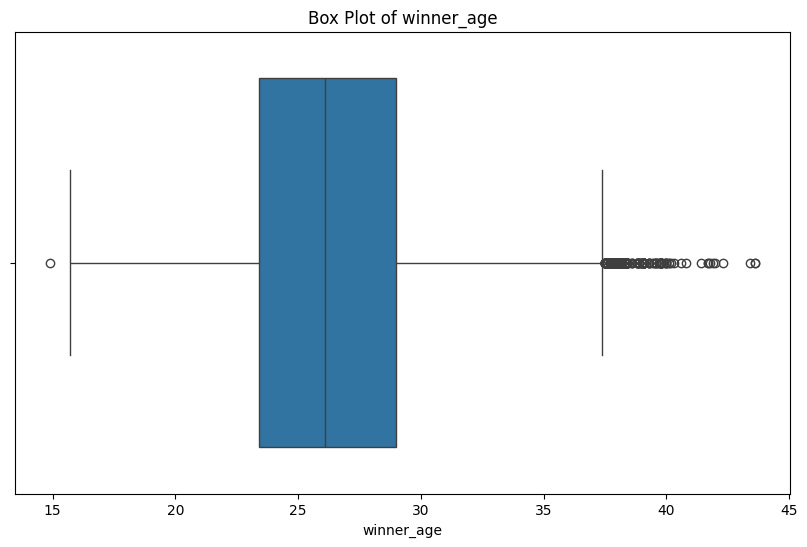

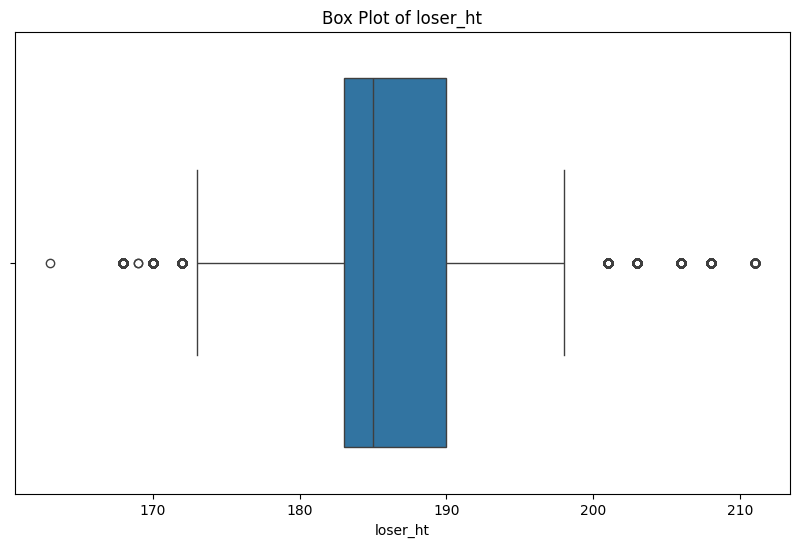

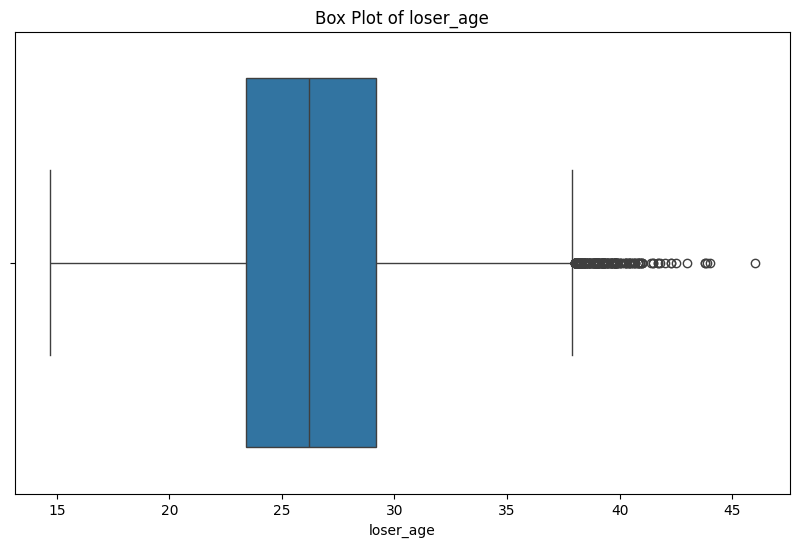

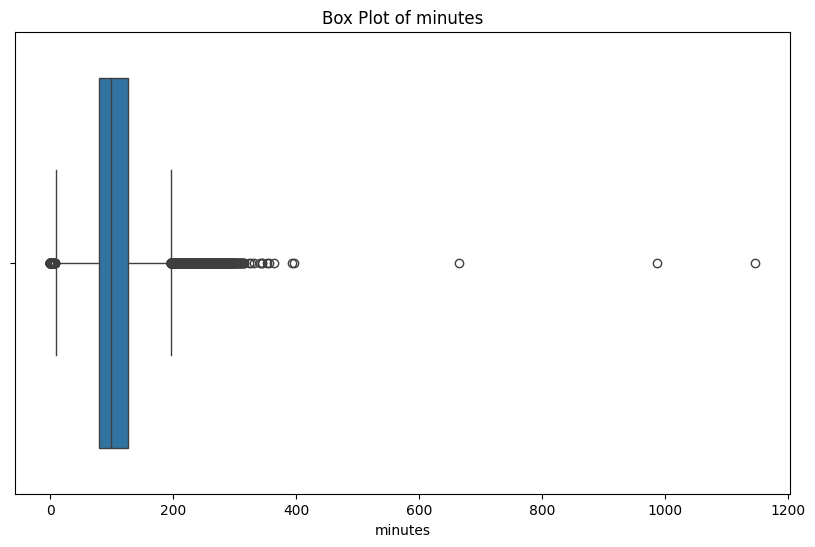

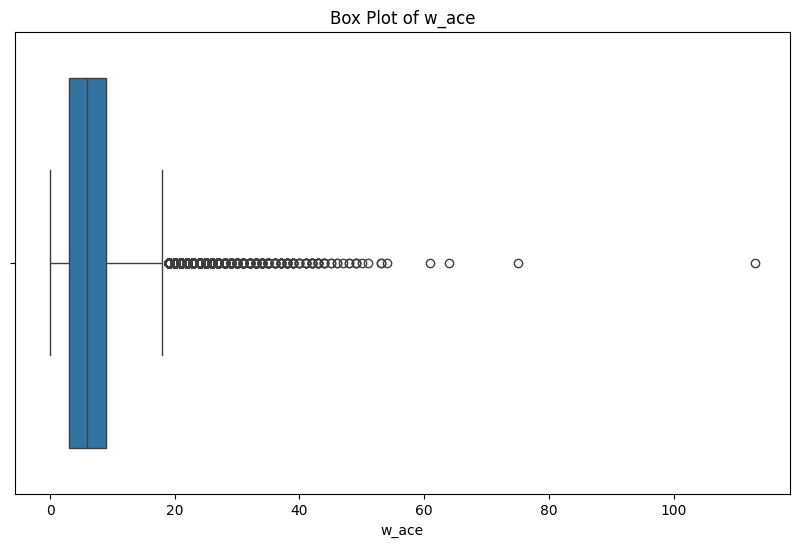

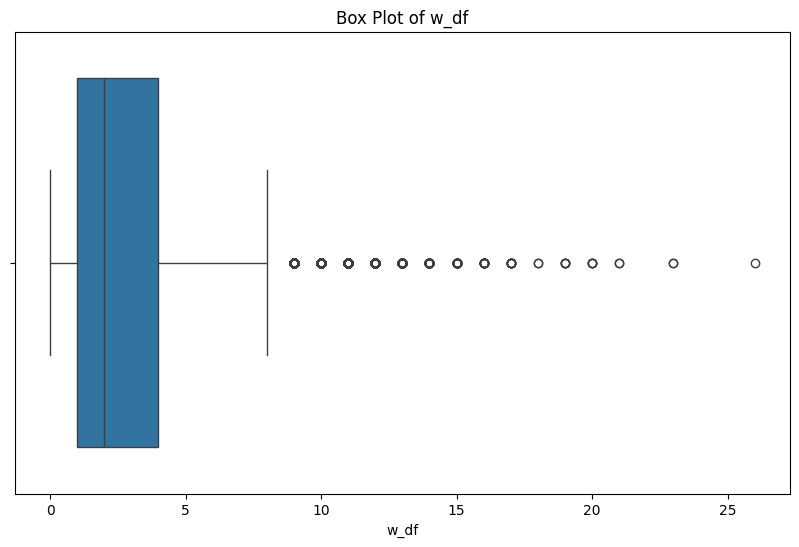

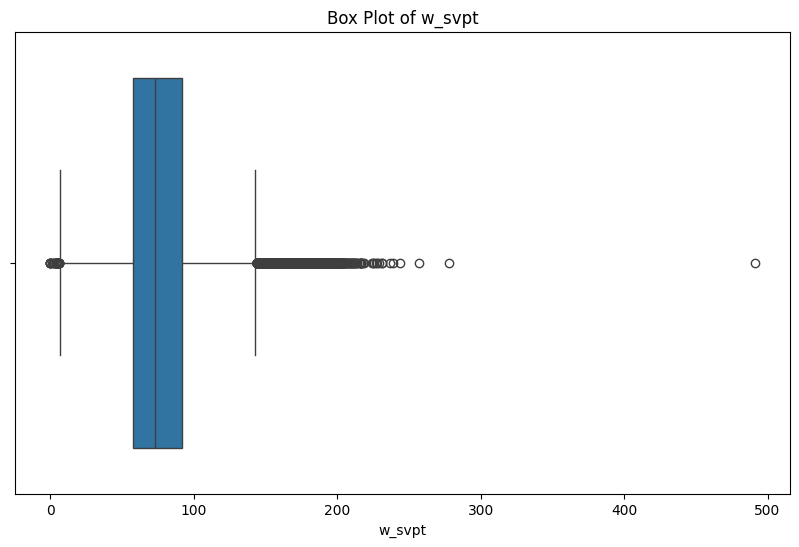

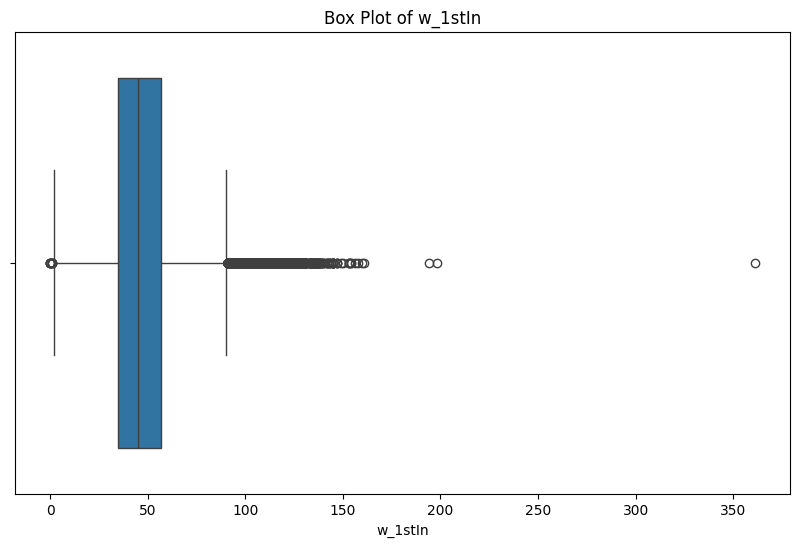

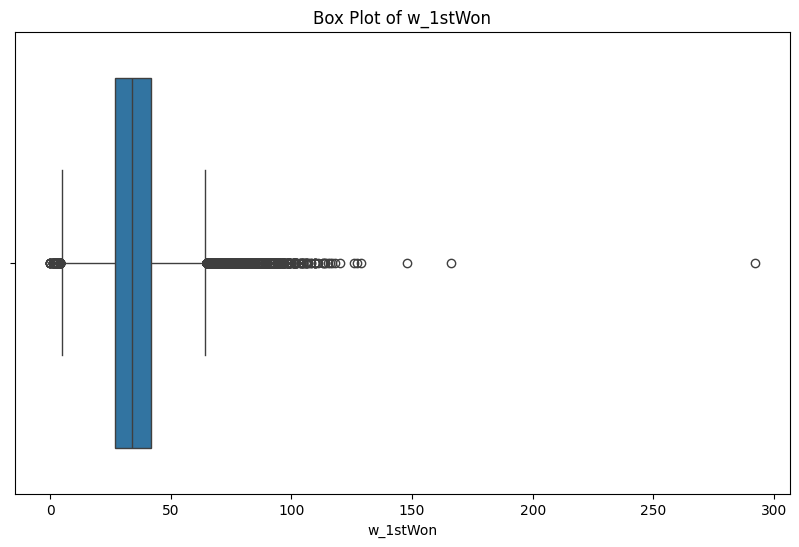

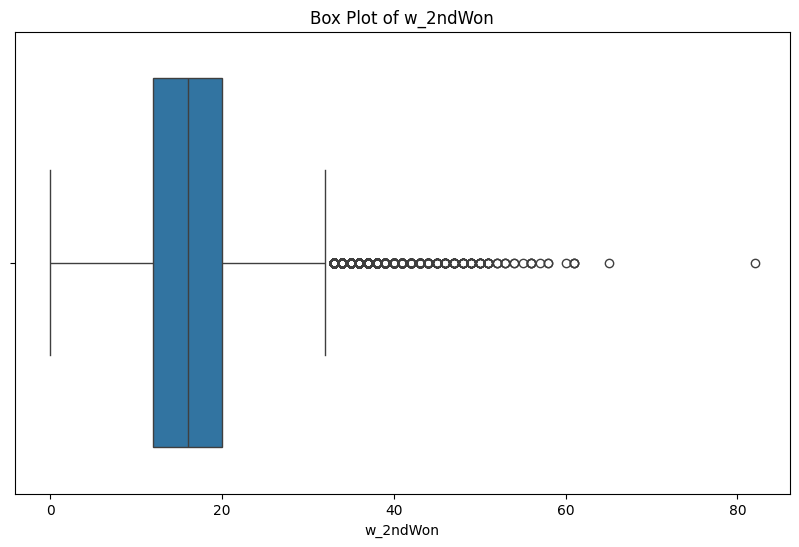

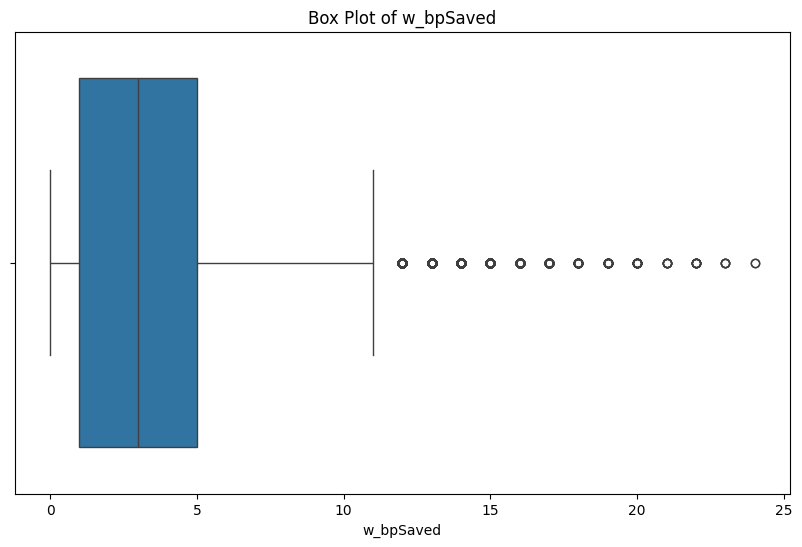

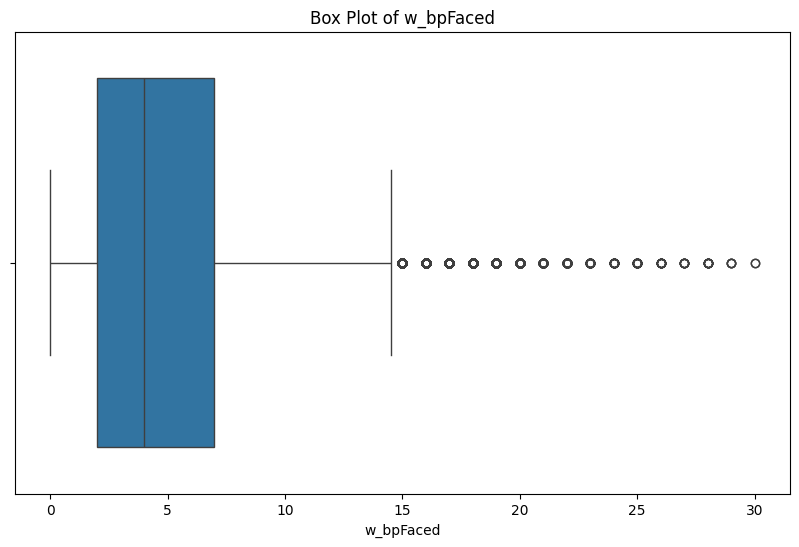

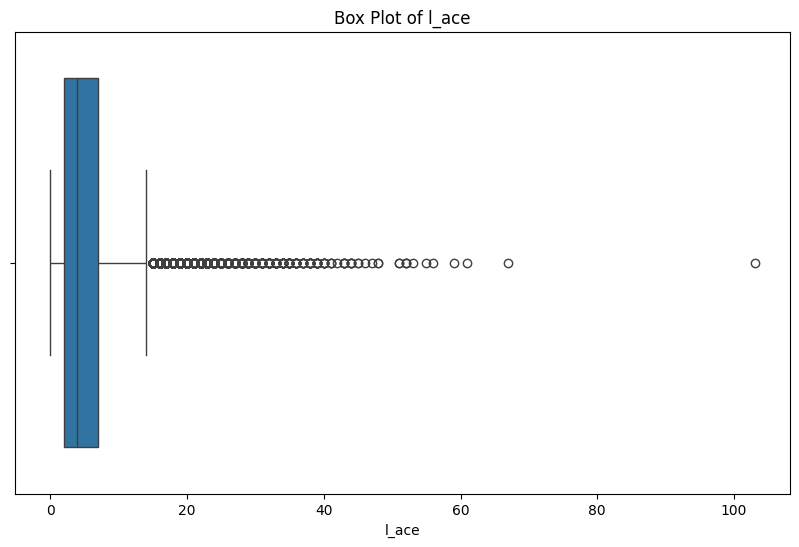

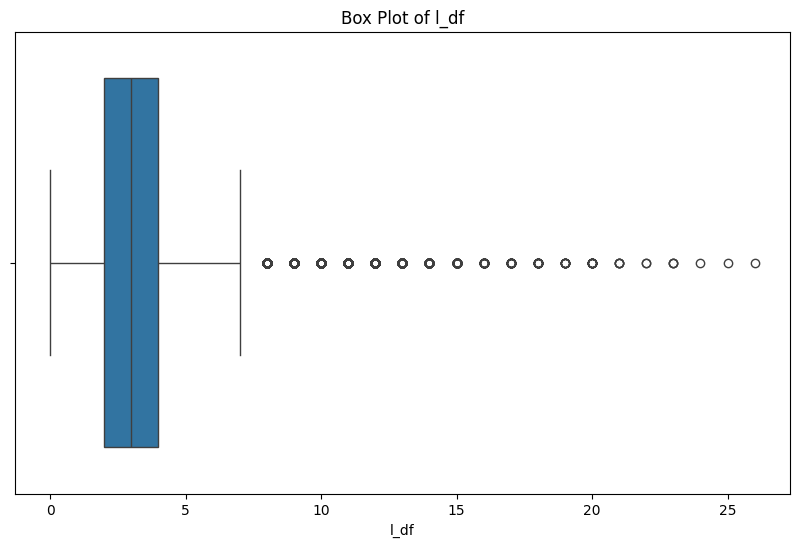

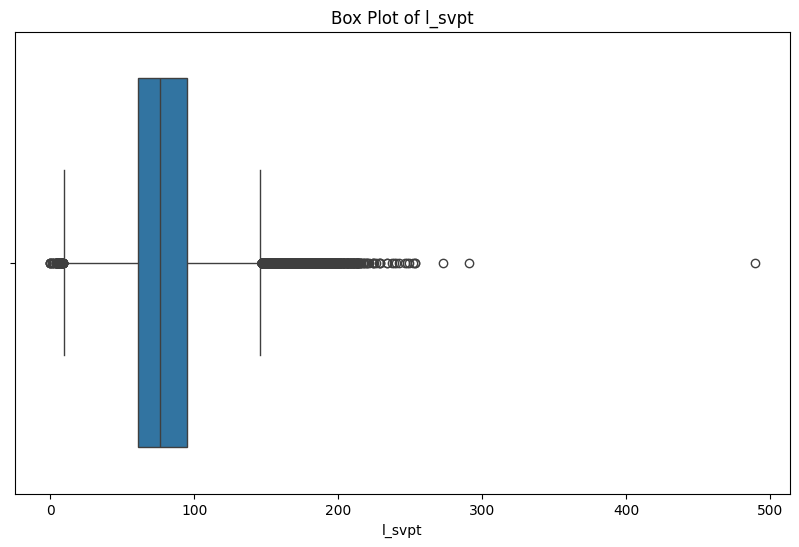

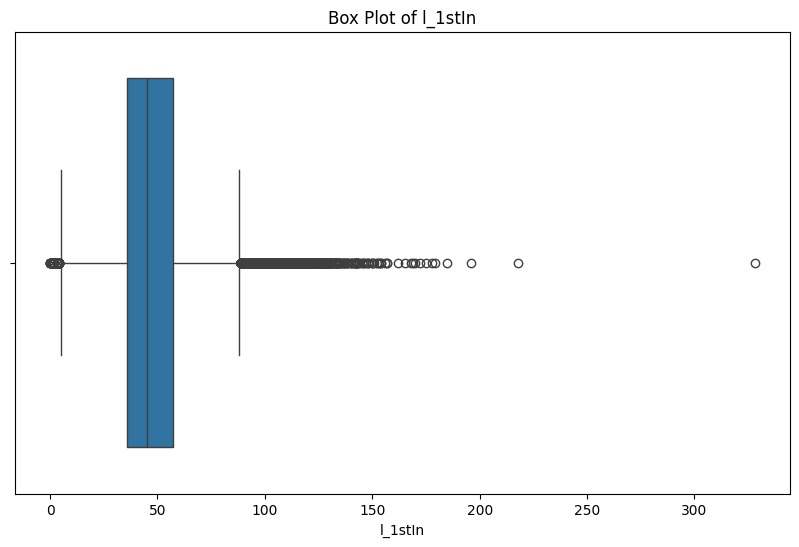

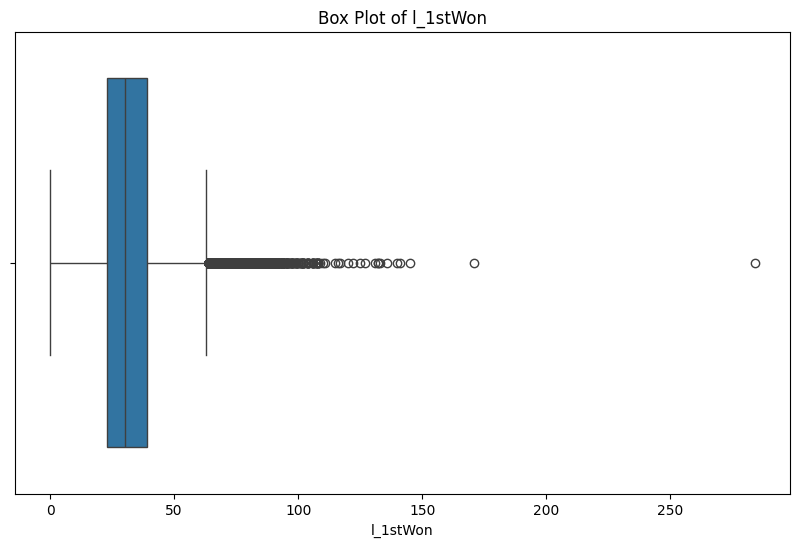

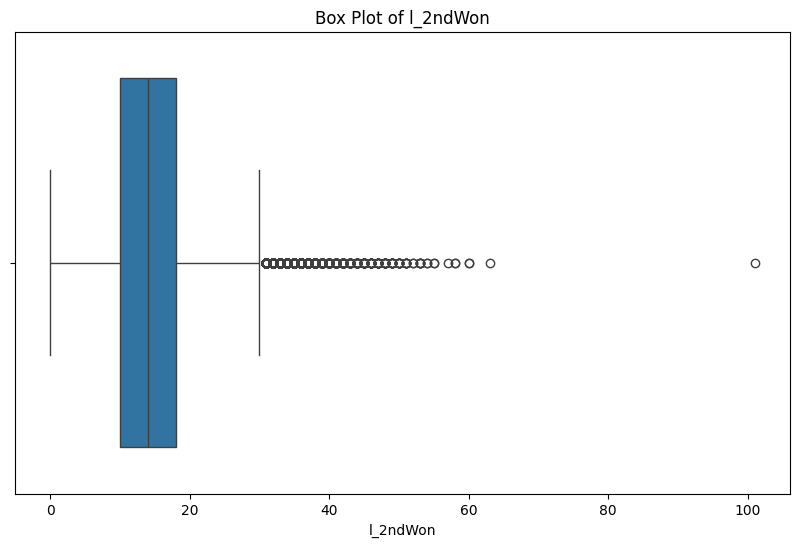

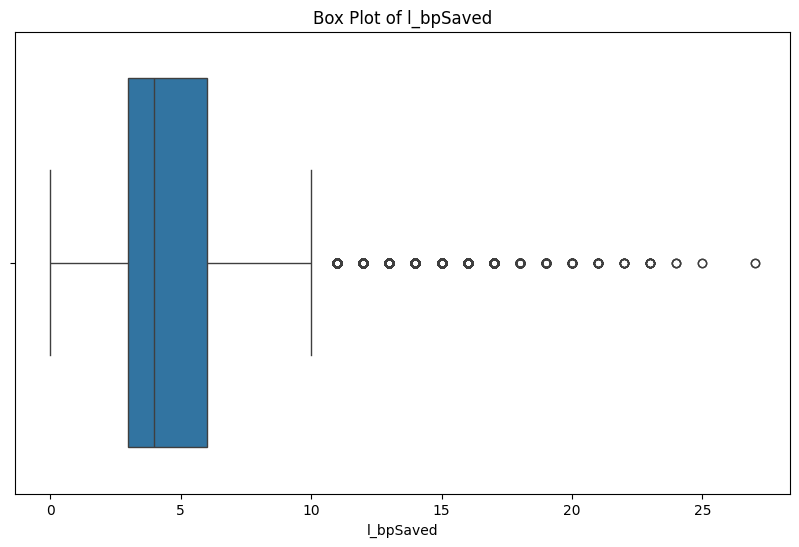

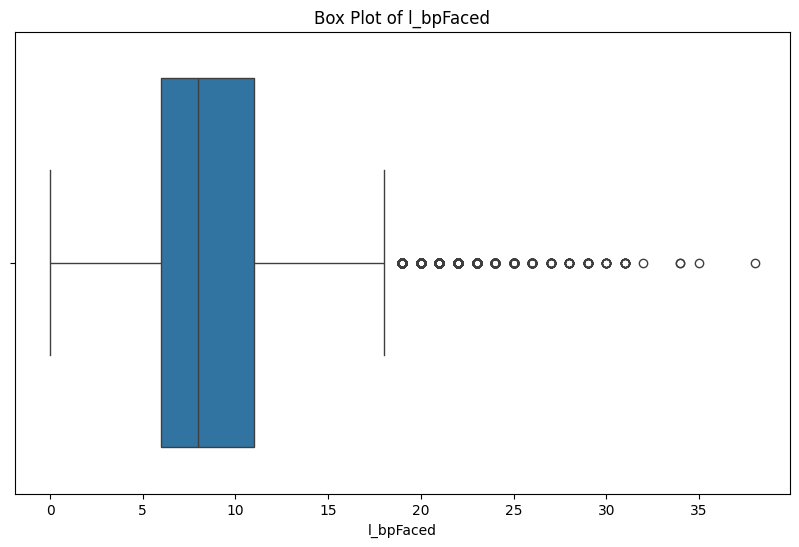

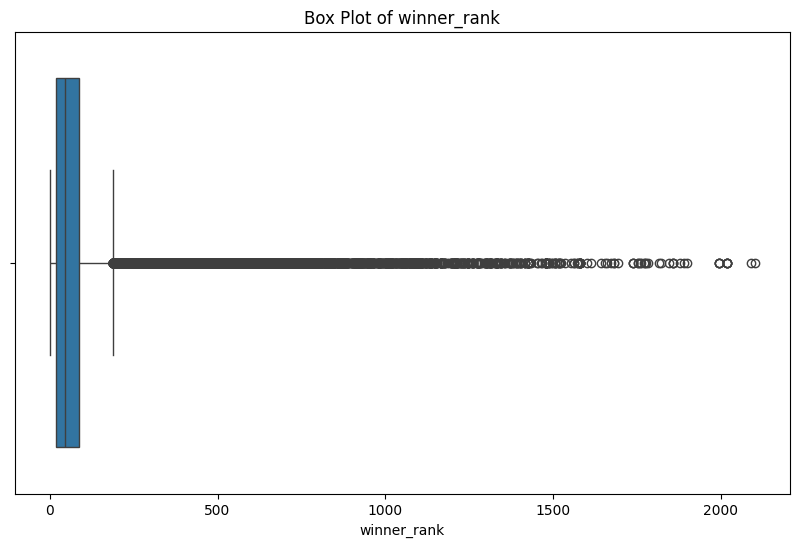

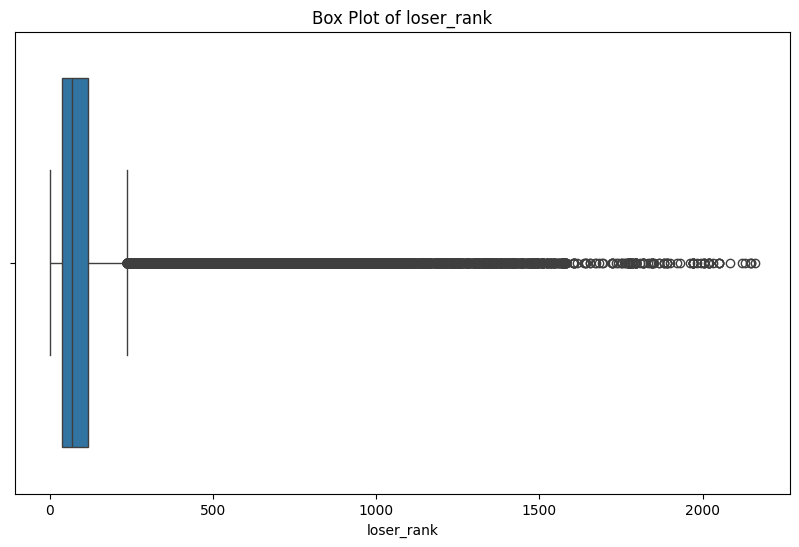

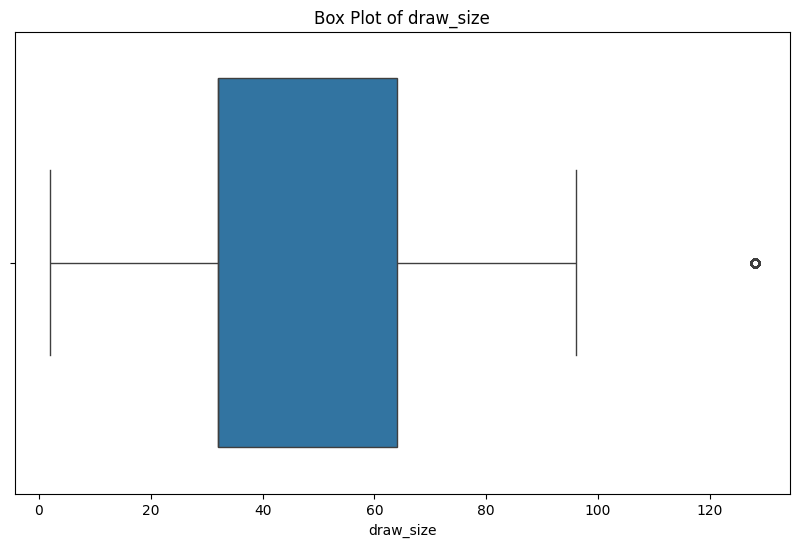

In [35]:
# Inspect distribution of numerical variables

axes = []  # List to store axes objects

# Create histograms for numerical variables
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df[col], kde=True)  # Include KDE for density estimation
    axes.append(ax)  # Add the current axis to the list
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for numerical variables to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

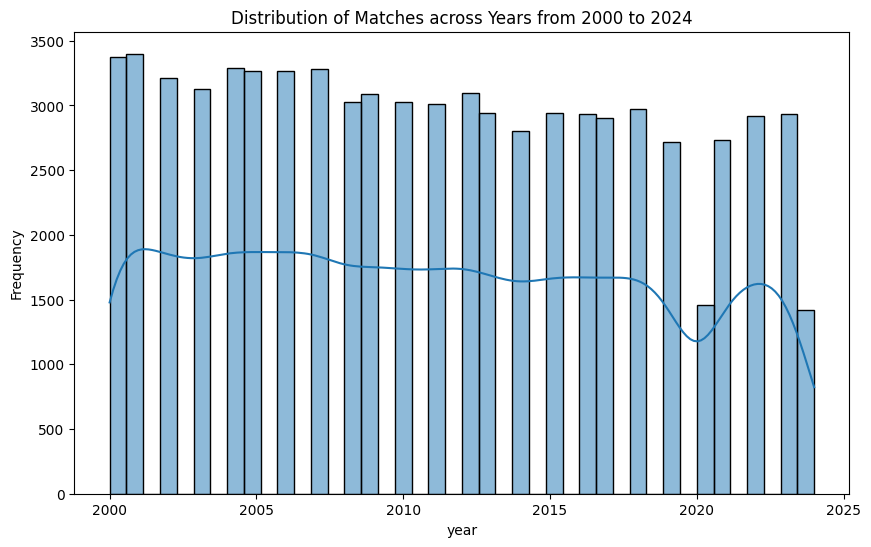

In [36]:
axes[0].set_title("Distribution of Matches across Years from 2000 to 2024")
axes[0].get_figure()

### Exclude numeric outliers

In [37]:
# Reference: https://blog.devgenius.io/data-quality-implementation-a-comprehensive-guide-243b6e8e4bda

# Exclude outliers for numerical variables

def exclude_outliers_iqr(df, numeric_cols):
    df_no_outliers = df.copy()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR
        df_no_outliers = df_no_outliers[
            (df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)
        ]
    return df_no_outliers


df_no_outliers = exclude_outliers_iqr(df, numeric_cols)
print(f"Number of rows after outlier removal: {len(df_no_outliers)} out of {len(df)}\n")
print(f"There is {((len(df)-len(df_no_outliers))/len(df))*100}% decrease in data (removed).\n")

Number of rows after outlier removal: 63693 out of 73145

There is 12.922277667646457% decrease in data (removed).



In [38]:
# Ensure D category is not gone
df_no_outliers['tourney_level'].unique()

['A', 'M', 'G', 'F', 'D']
Categories (5, object): ['A', 'D', 'F', 'G', 'M']

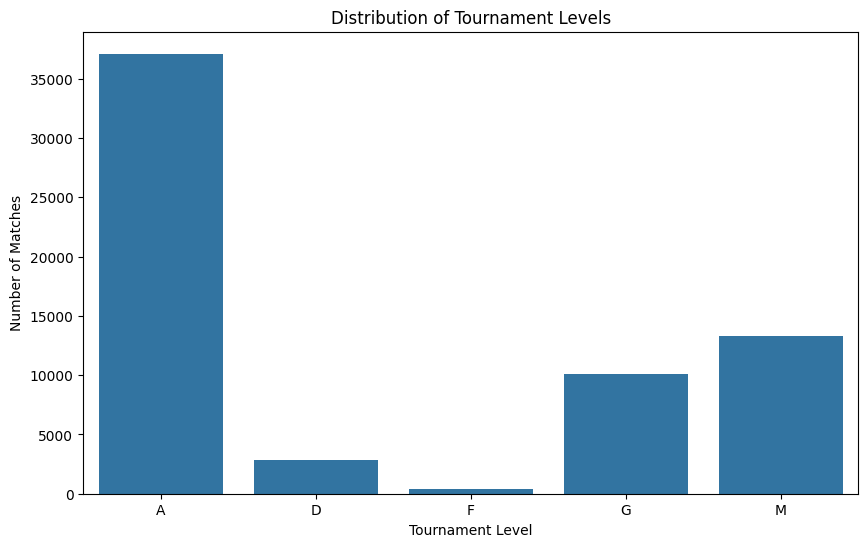

In [39]:
# Check the distribution of the 'tourney_level' column
plt.figure(figsize=(10, 6))
sns.countplot(x='tourney_level', data=df_no_outliers)
plt.title('Distribution of Tournament Levels')
plt.xlabel('Tournament Level')
plt.ylabel('Number of Matches')
plt.show()

### Summary statistics (removed outliers)

In [40]:
df_no_outliers['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [41]:
print(f"number of numerical cols = {len(numeric_cols)}")
print(f"number of categorical cols = {len(categorical_cols)}")
print("\nSummary statistics of numerical variables\n")
summary = df_no_outliers.describe()
summary

number of numerical cols = 25
number of categorical cols = 6

Summary statistics of numerical variables



year     winner_ht    winner_age      loser_ht     loser_age  \
count  63693.000000  63693.000000  63693.000000  63693.000000  63693.000000   
mean    2011.296014    186.204583     26.380267    185.527530     26.588249   
std        7.084314      6.733707      3.898214      6.638188      3.942933   
min     2000.000000    168.000000     15.700000    168.000000     15.000000   
25%     2005.000000    183.000000     23.500000    183.000000     23.700000   
50%     2011.000000    185.000000     26.200000    185.000000     26.400000   
75%     2017.000000    190.000000     29.000000    190.000000     29.300000   
max     2024.000000    211.000000     42.300000    211.000000     42.500000   

            minutes         w_ace          w_df        w_svpt       w_1stIn  \
count  63693.000000  63693.000000  63693.000000  63693.000000  63693.000000   
mean     104.088715      6.583180      2.491435     75.541535     46.482227   
std       36.304380      4.839036      2.082212     25.662229     16.657353   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       78.000000      3.000000      1.000000     57.000000     35.000000   
50%       99.000000      6.000000      2.000000     73.000000     45.000000   
75%      125.000000      9.000000      3.000000     91.000000     56.000000   
max      267.000000     27.000000     13.000000    194.000000    123.000000   

       ...          l_df        l_svpt       l_1stIn      l_1stWon  \
count  ...  63693.000000  63693.000000  63693.000000  63693.000000   
mean   ...      3.130226     78.382938     47.006940     31.200509   
std    ...      2.143058     25.437362     16.949195     12.514015   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      2.000000     60.000000     35.000000     22.000000   
50%    ...      3.000000     76.000000     45.000000     30.000000   
75%    ...      4.000000     93.000000     56.000000     38.000000   
max    ...     10.000000    194.000000    120.000000     87.000000   

           l_2ndWon     l_bpSaved     l_bpFaced   winner_rank    loser_rank  \
count  63693.000000  63693.000000  63693.000000  63693.000000  63693.000000   
mean      14.422935      4.574490      8.381361     53.612610     78.122266   
std        6.461669      2.966448      3.765256     49.496714     63.163977   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%       10.000000      2.000000      6.000000     16.000000     34.000000   
50%       14.000000      4.000000      8.000000     41.000000     64.000000   
75%       18.000000      6.000000     11.000000     76.000000    101.000000   
max       42.000000     15.000000     26.000000    290.000000    356.000000   

          draw_size  
count  63693.000000  
mean      56.788407  
std       38.542506  
min        2.000000  
25%       32.000000  
50%       32.000000  
75%       64.000000  
max      128.000000  

[8 rows x 25 columns]

In [42]:
# Check values of minutes column with entry of zero
zero_minutes_count = df_no_outliers[df_no_outliers['minutes'] == 0].shape[0]
print(f"Number of entries in 'minutes' column with a value of 0: {zero_minutes_count}")

Number of entries in 'minutes' column with a value of 0: 56


In [43]:
# Inspect summary statistics of break points of winners vs. losers
summary[['w_bpFaced', 'l_bpFaced', 'w_bpSaved', 'l_bpSaved']]

w_bpFaced     l_bpFaced     w_bpSaved     l_bpSaved
count  63693.000000  63693.000000  63693.000000  63693.000000
mean       4.816989      8.381361      3.328545      4.574490
std        3.711861      3.765256      2.853399      2.966448
min        0.000000      0.000000      0.000000      0.000000
25%        2.000000      6.000000      1.000000      2.000000
50%        4.000000      8.000000      3.000000      4.000000
75%        7.000000     11.000000      5.000000      6.000000
max       22.000000     26.000000     17.000000     15.000000

In [44]:
# Inspect summary statistics of first-serve points
summary[['w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon']]

w_1stIn       l_1stIn      w_1stWon      l_1stWon
count  63693.000000  63693.000000  63693.000000  63693.000000
mean      46.482227     47.006940     35.182477     31.200509
std       16.657353     16.949195     11.820079     12.514015
min        0.000000      0.000000      0.000000      0.000000
25%       35.000000     35.000000     27.000000     22.000000
50%       45.000000     45.000000     34.000000     30.000000
75%       56.000000     56.000000     42.000000     38.000000
max      123.000000    120.000000     87.000000     87.000000

In [45]:
# Inspect summary statistics of second-serve points won
summary[['w_2ndWon', 'l_2ndWon']]

w_2ndWon      l_2ndWon
count  63693.000000  63693.000000
mean      16.166792     14.422935
std        6.326549      6.461669
min        0.000000      0.000000
25%       12.000000     10.000000
50%       16.000000     14.000000
75%       20.000000     18.000000
max       44.000000     42.000000

In [46]:
# Inspect summary statistics of serve points made by winners vs. losers
summary[['w_svpt', 'l_svpt']]

w_svpt        l_svpt
count  63693.000000  63693.000000
mean      75.541535     78.382938
std       25.662229     25.437362
min        0.000000      0.000000
25%       57.000000     60.000000
50%       73.000000     76.000000
75%       91.000000     93.000000
max      194.000000    194.000000

In [47]:
# Inspect summary statistics of double faults by winners vs. losers
summary[['w_df', 'l_df']]

w_df          l_df
count  63693.000000  63693.000000
mean       2.491435      3.130226
std        2.082212      2.143058
min        0.000000      0.000000
25%        1.000000      2.000000
50%        2.000000      3.000000
75%        3.000000      4.000000
max       13.000000     10.000000

In [48]:
# Inspect summary statistics of aces by winners vs. losers
summary[['w_ace', 'l_ace']]

w_ace         l_ace
count  63693.000000  63693.000000
mean       6.583180      4.713485
std        4.839036      4.024379
min        0.000000      0.000000
25%        3.000000      2.000000
50%        6.000000      4.000000
75%        9.000000      6.000000
max       27.000000     22.000000

### Inspect distributions AFTER outlier removal

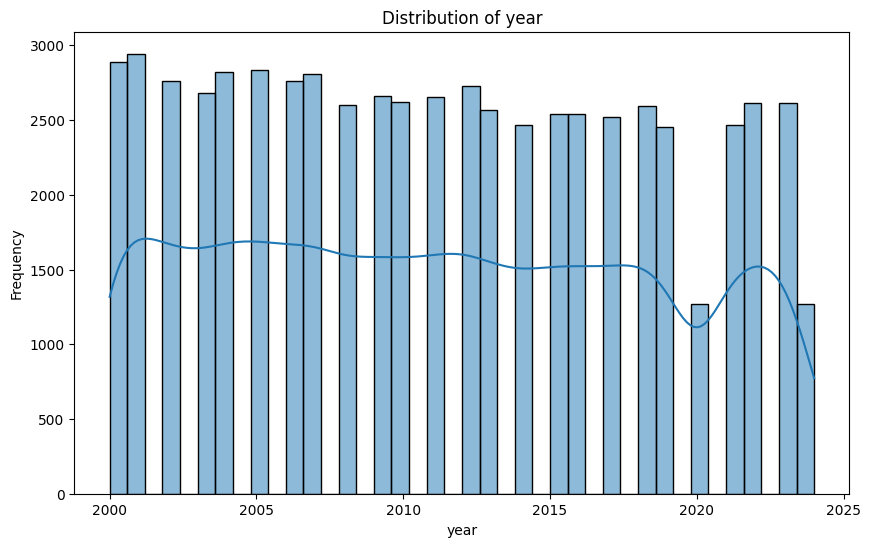

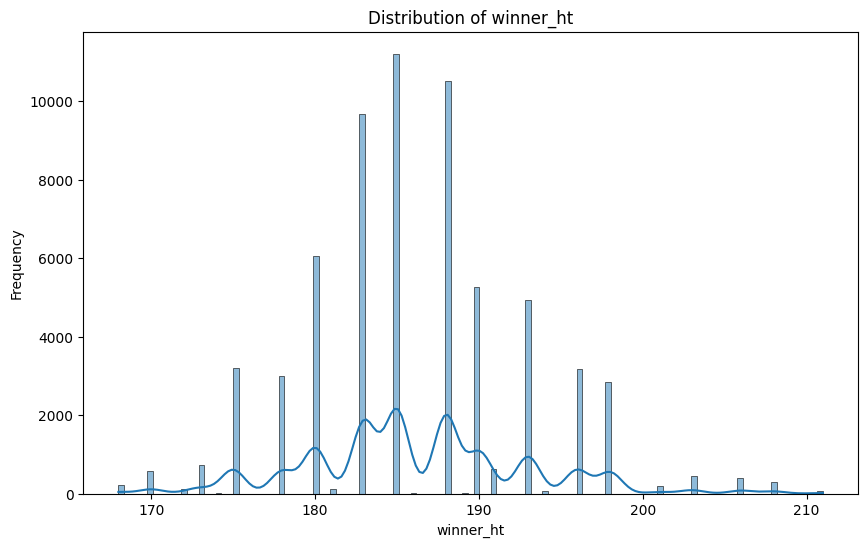

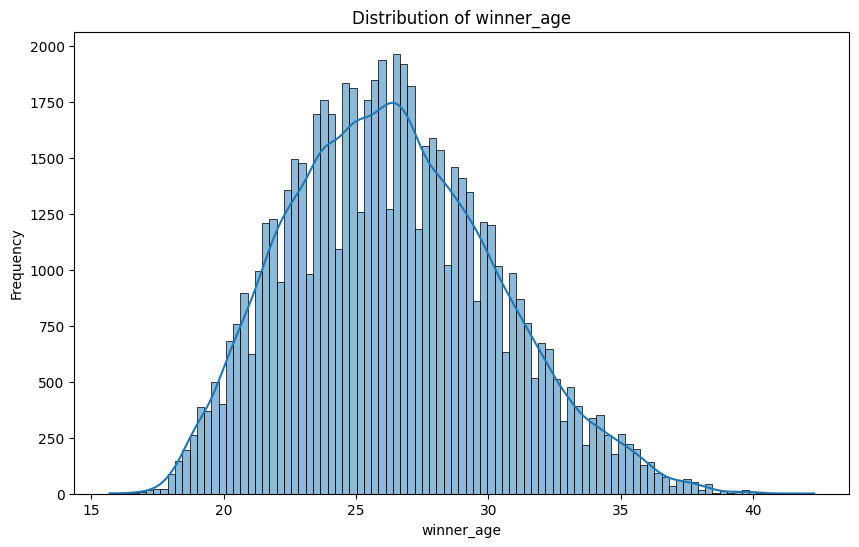

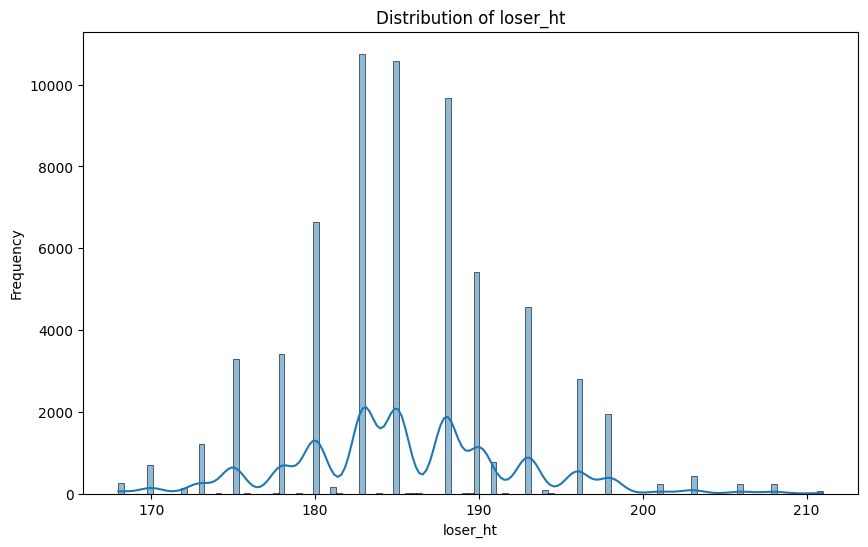

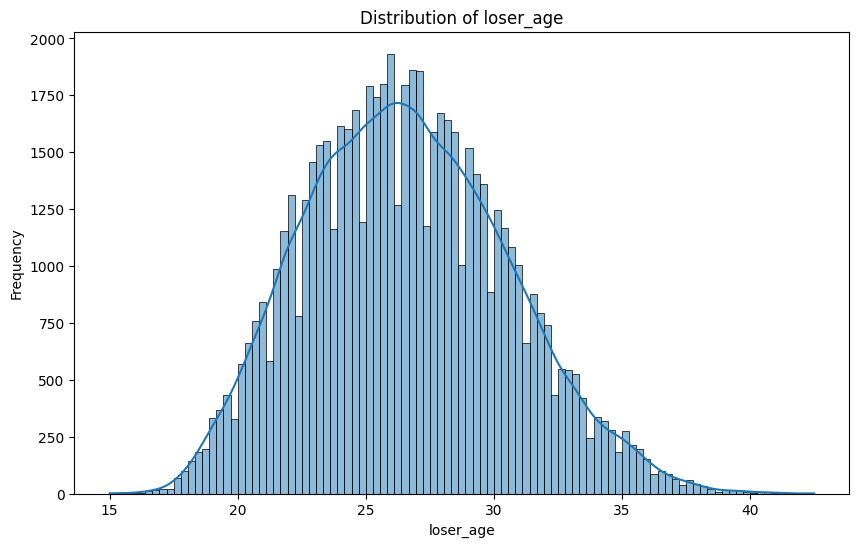

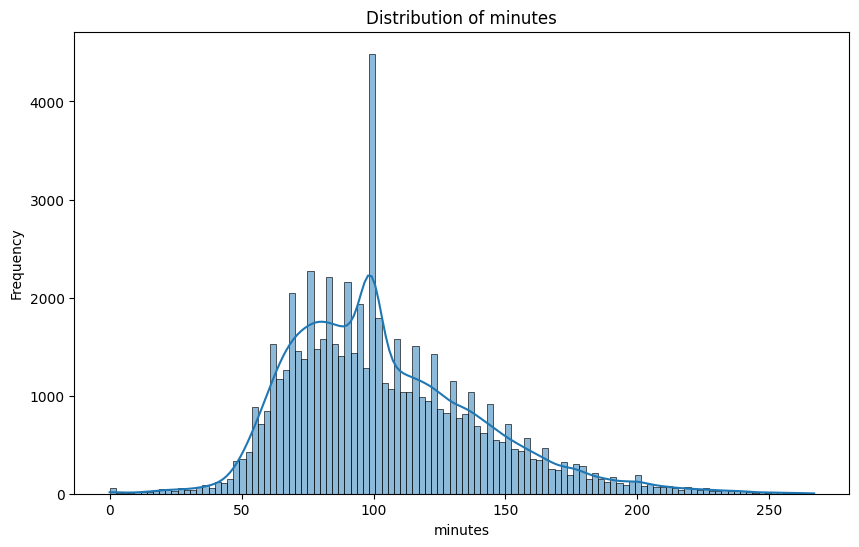

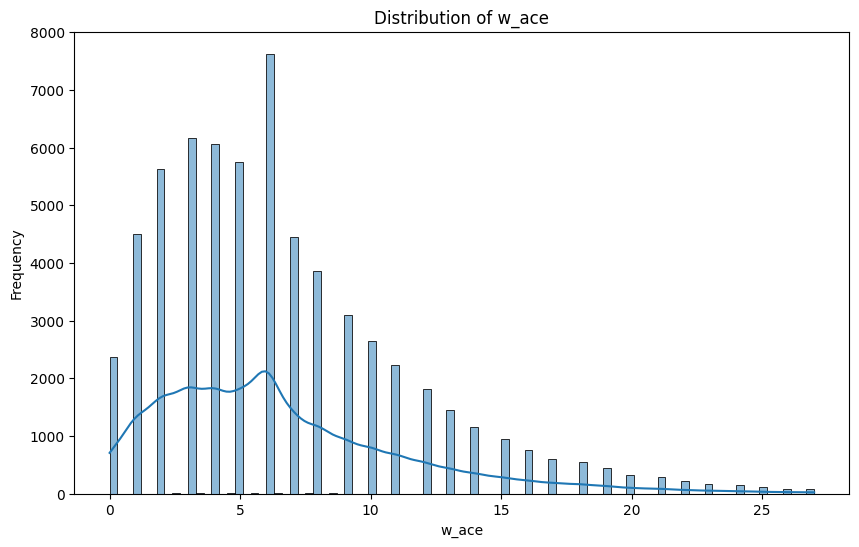

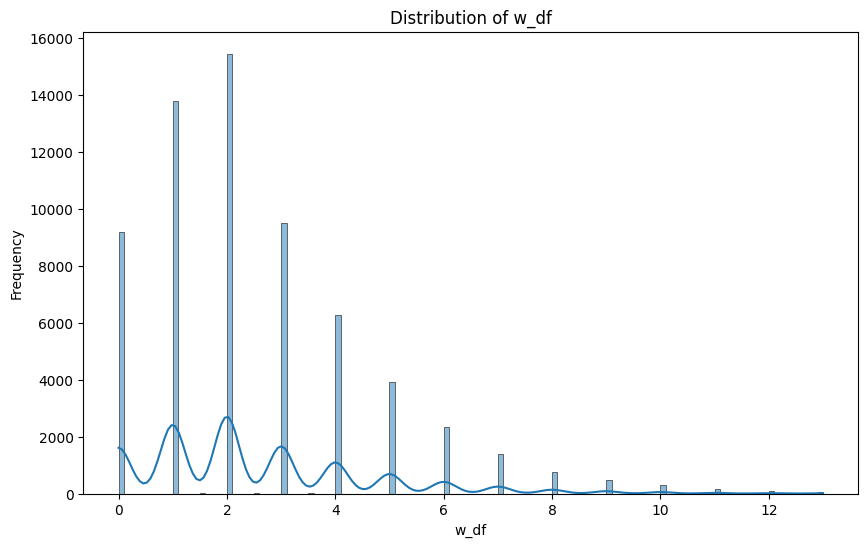

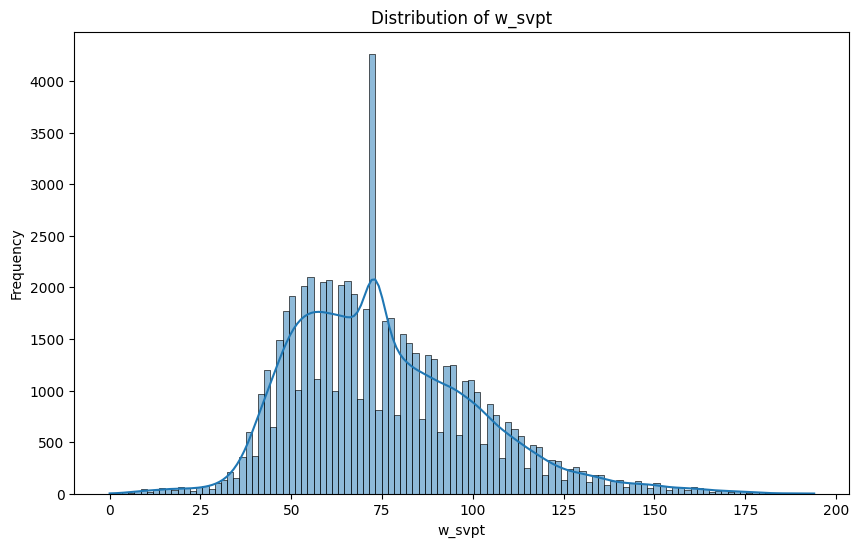

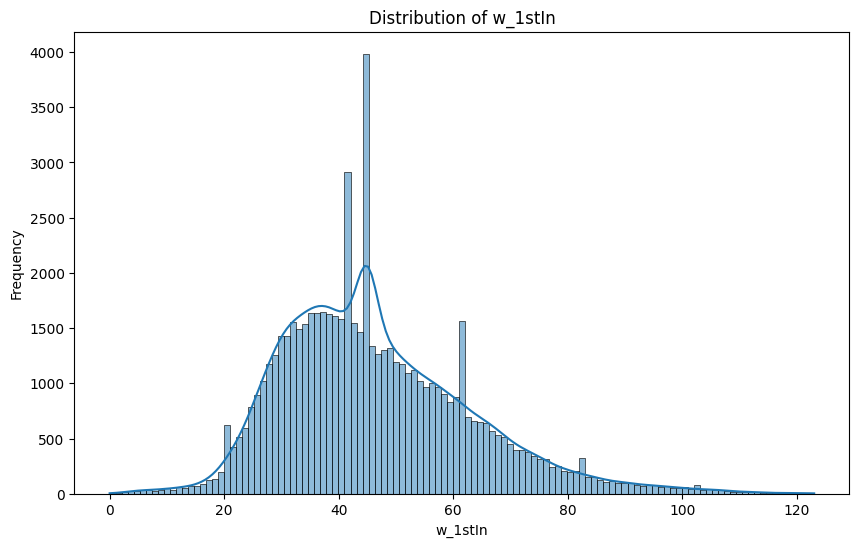

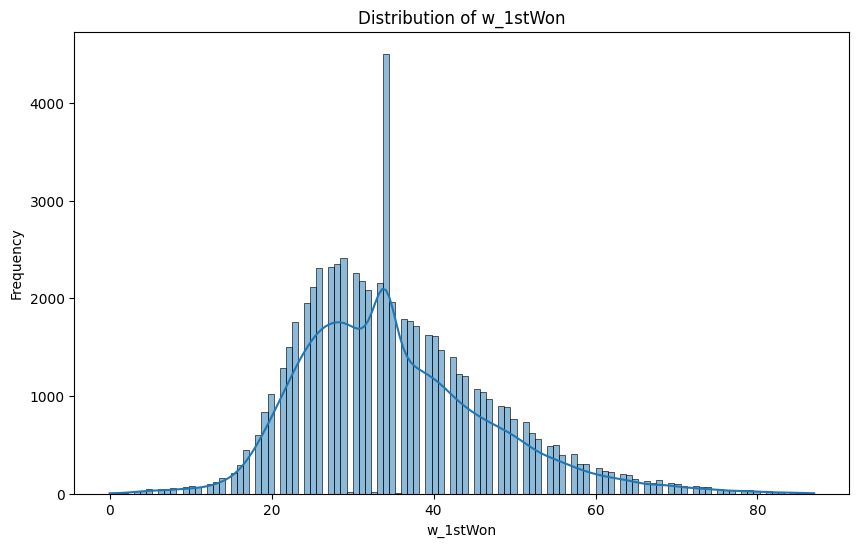

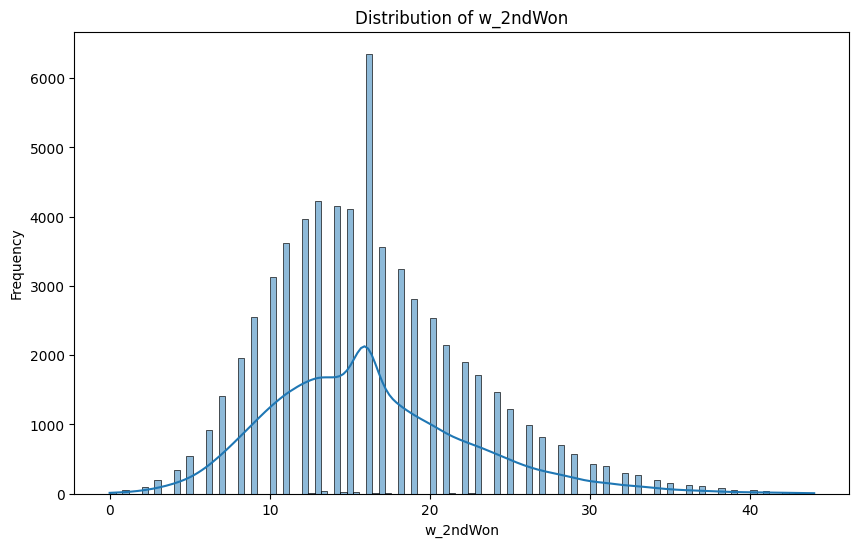

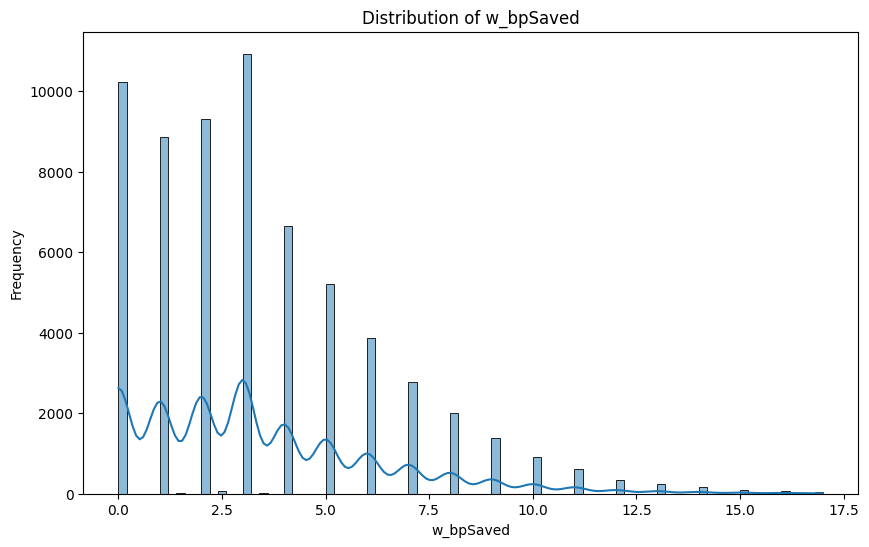

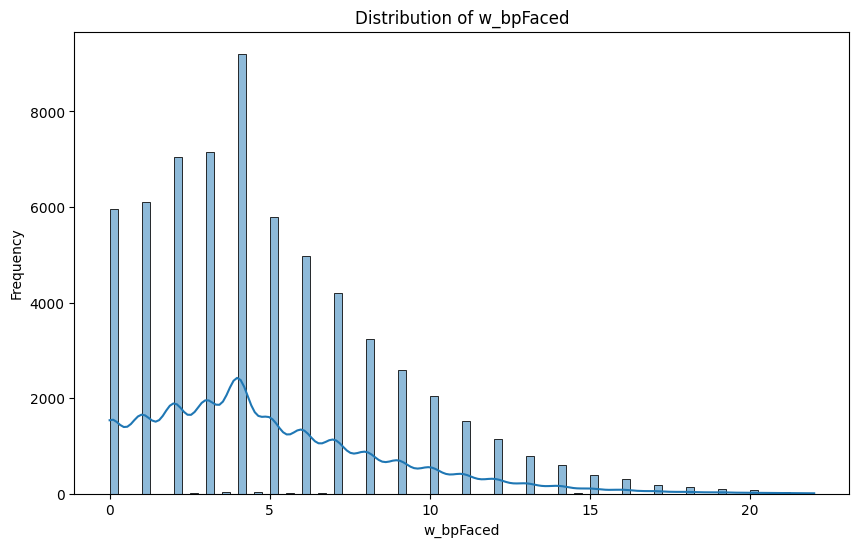

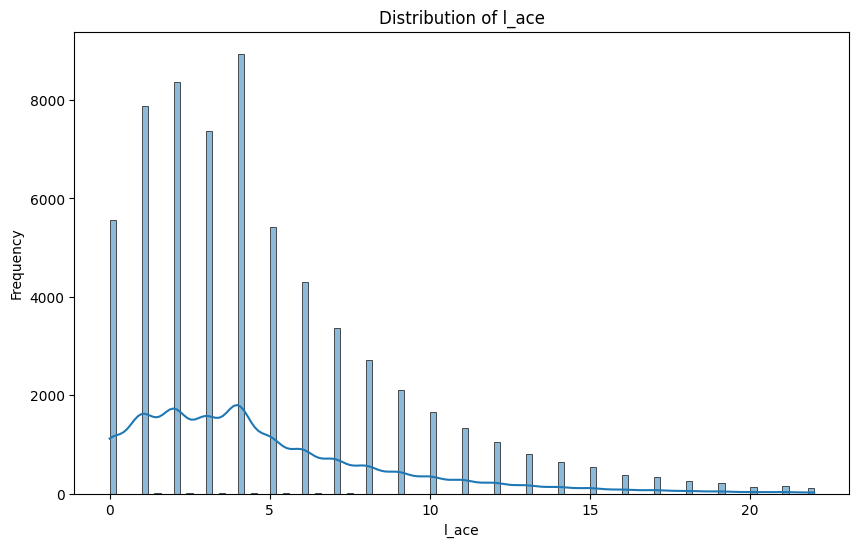

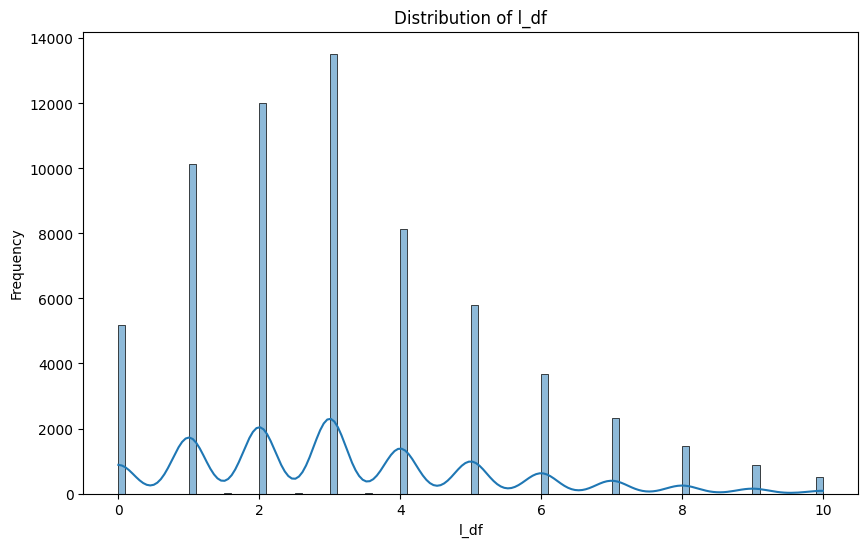

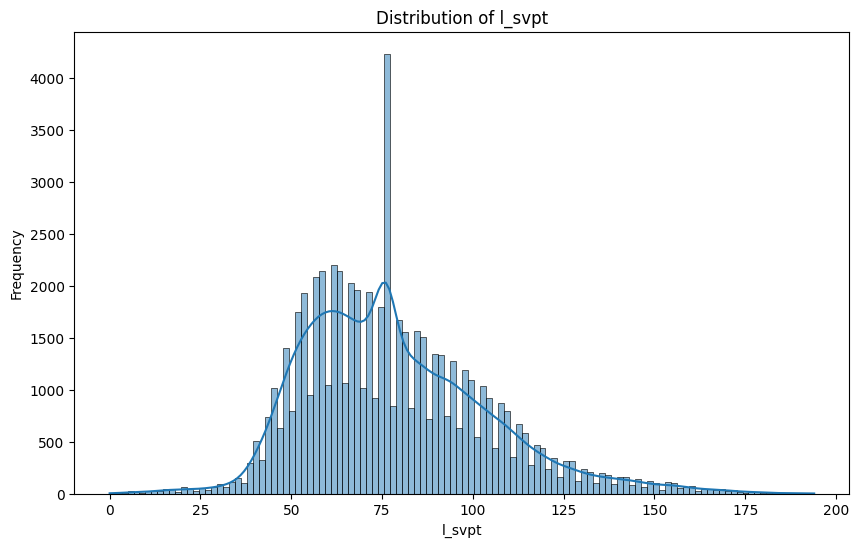

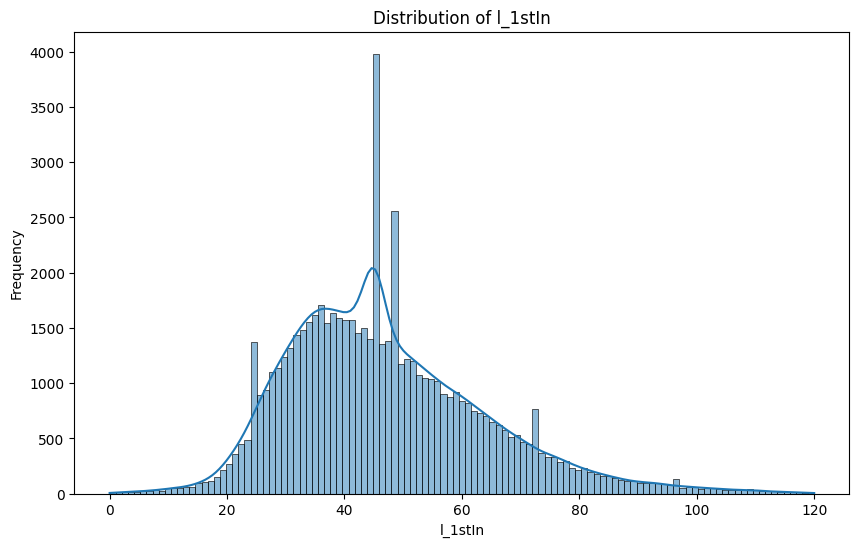

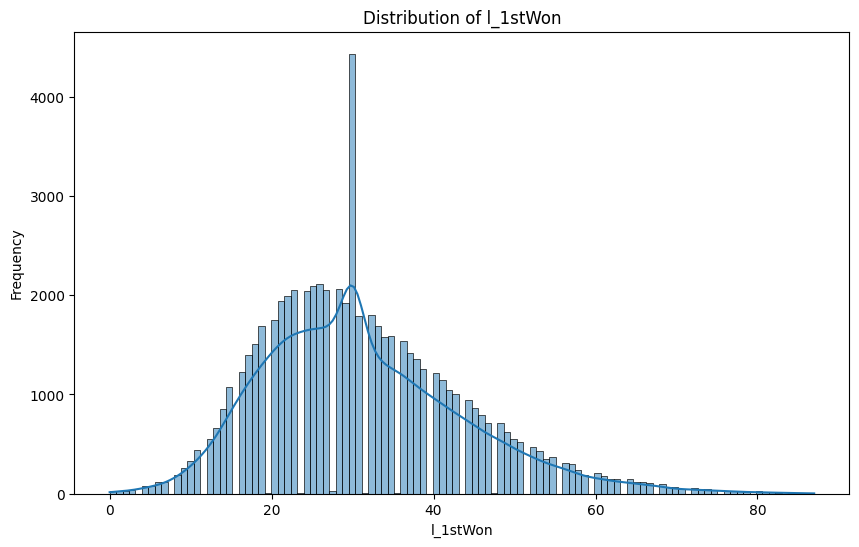

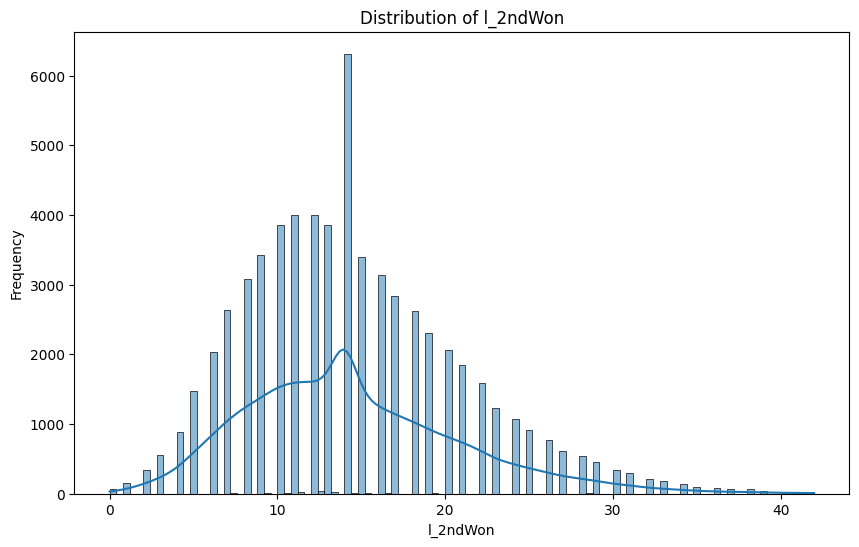

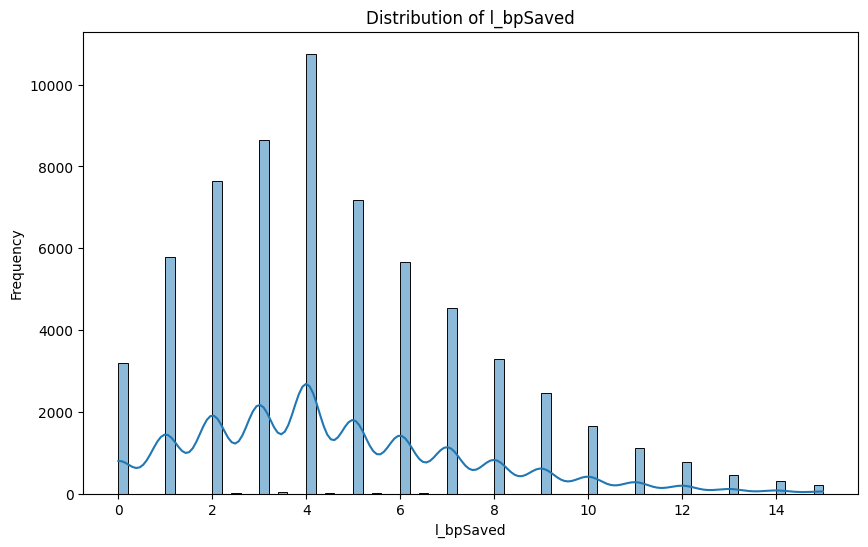

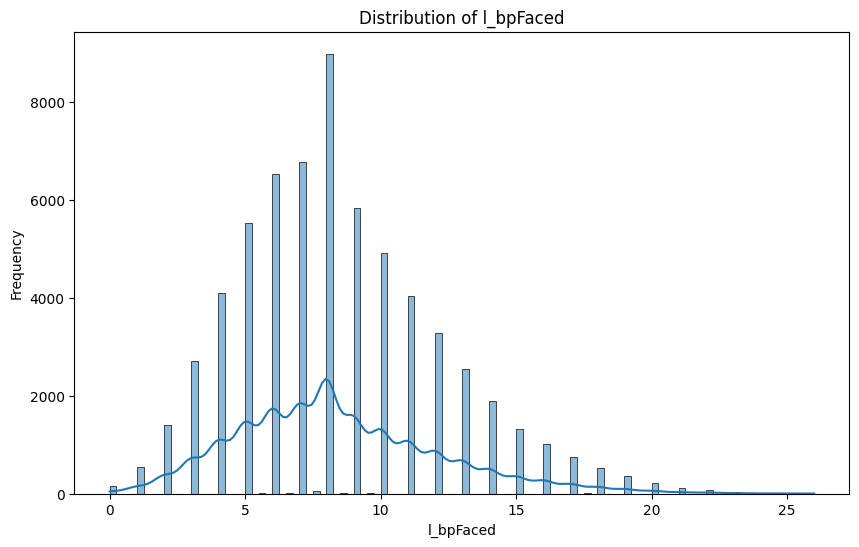

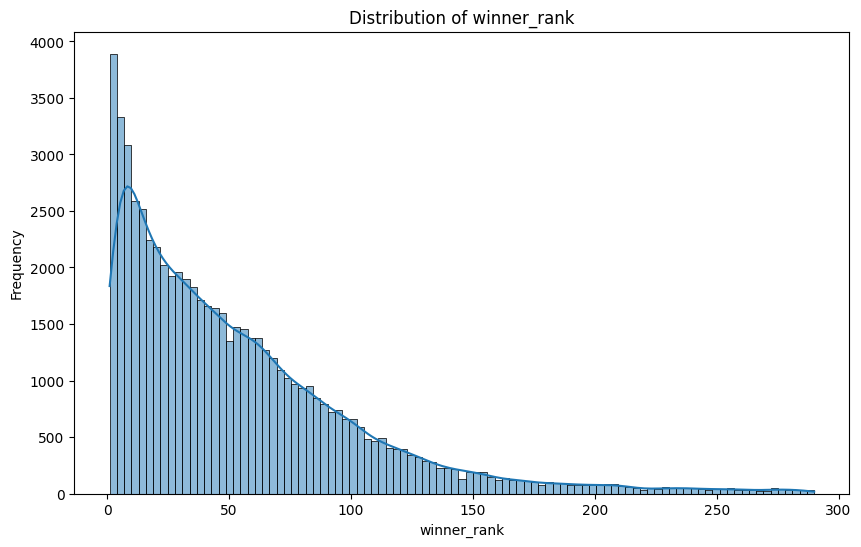

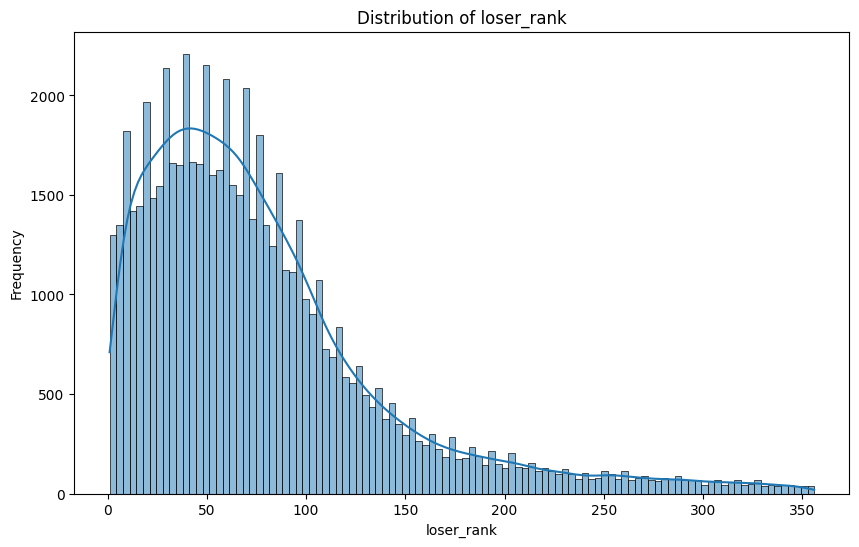

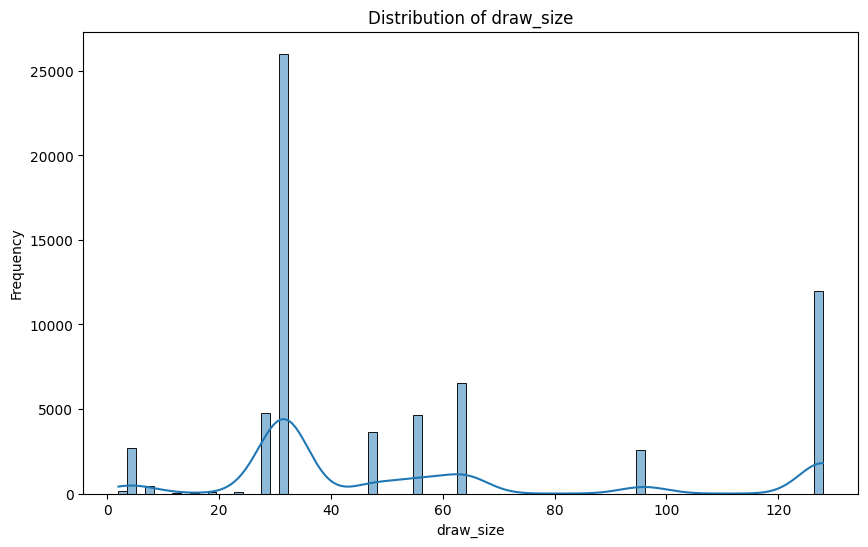

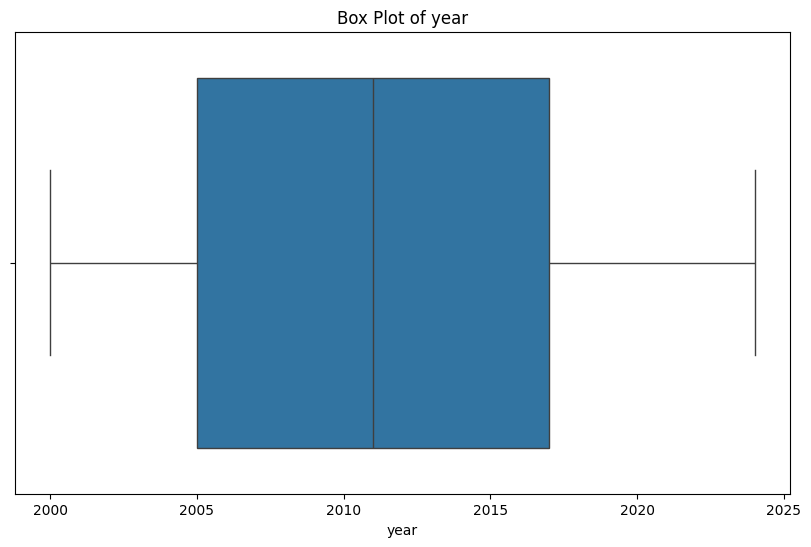

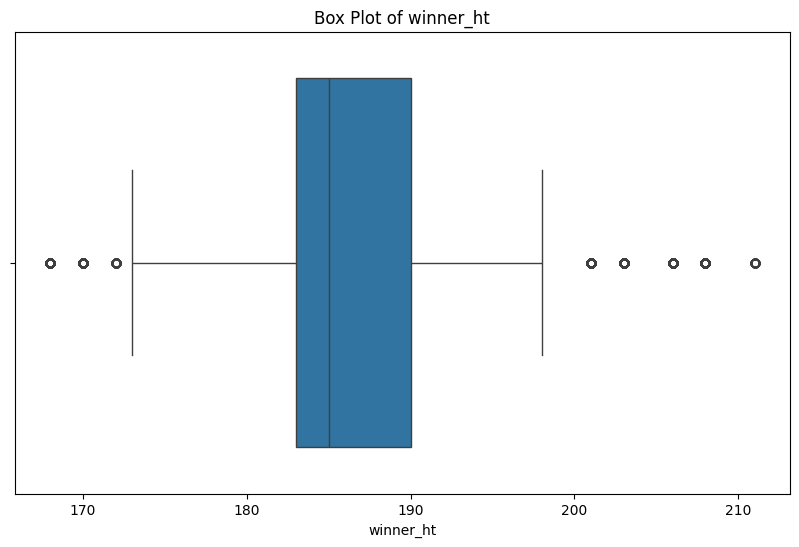

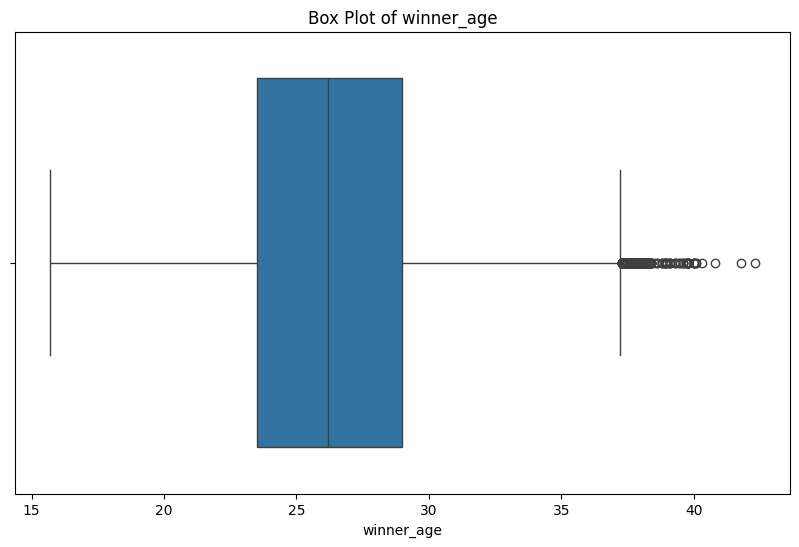

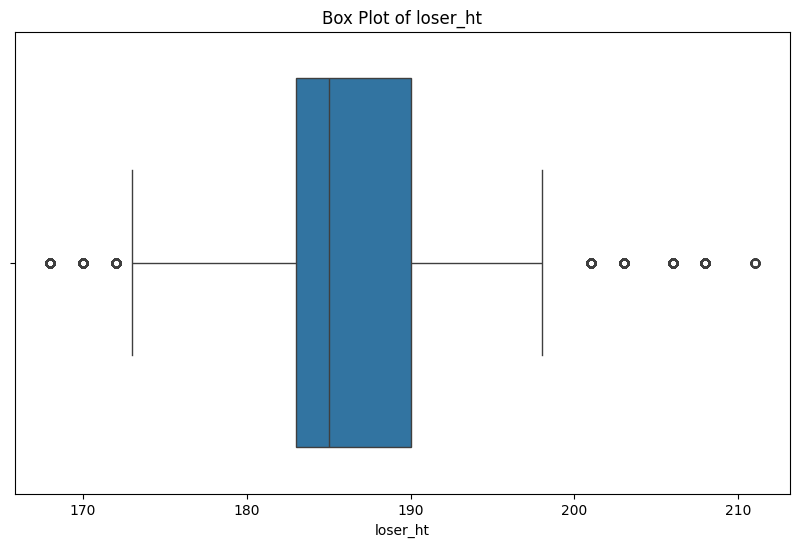

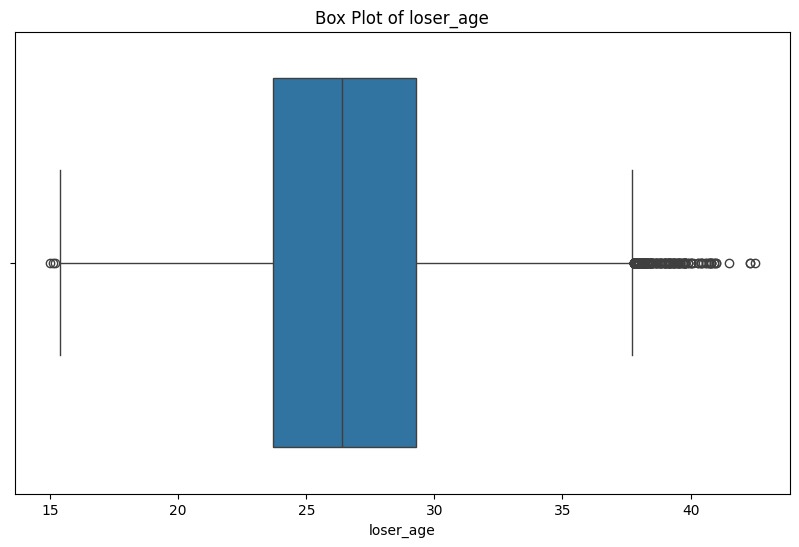

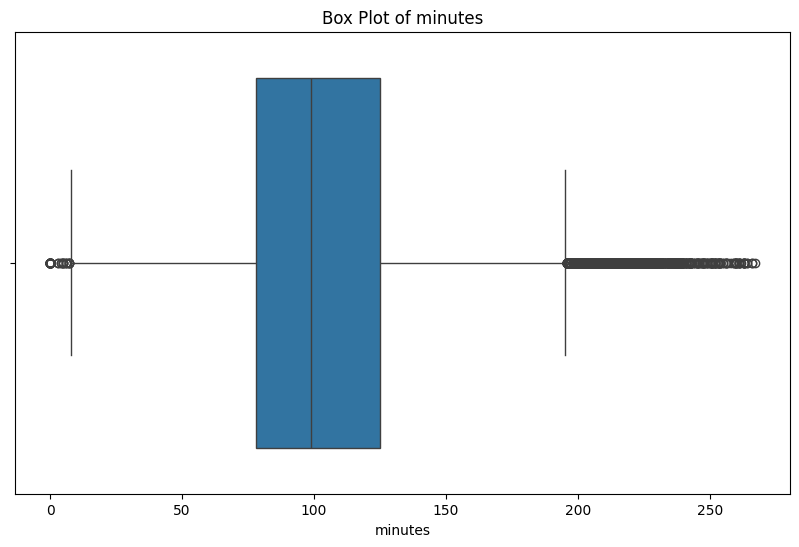

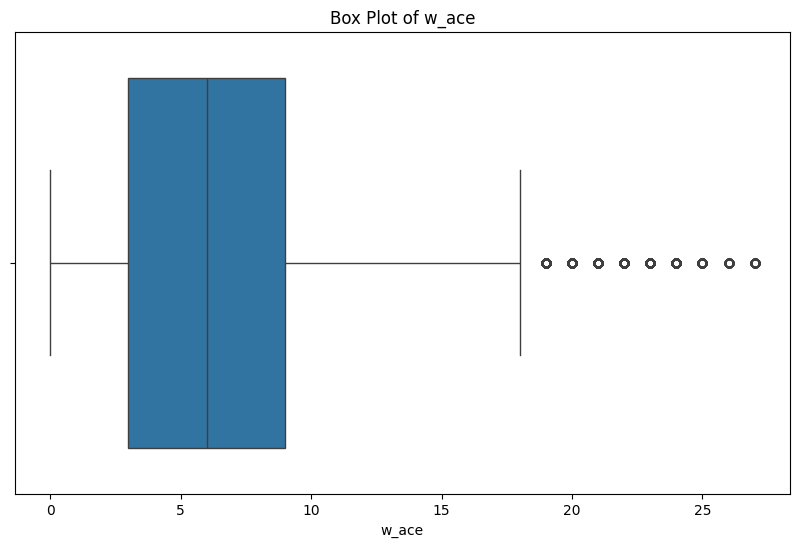

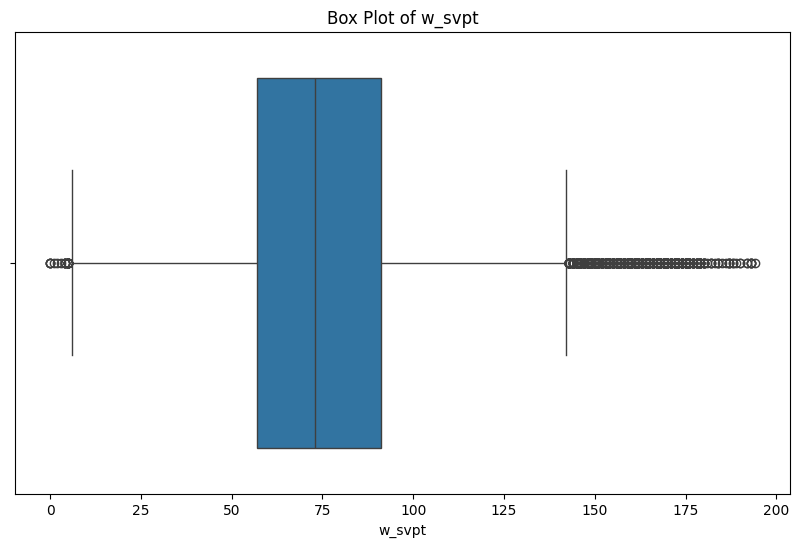

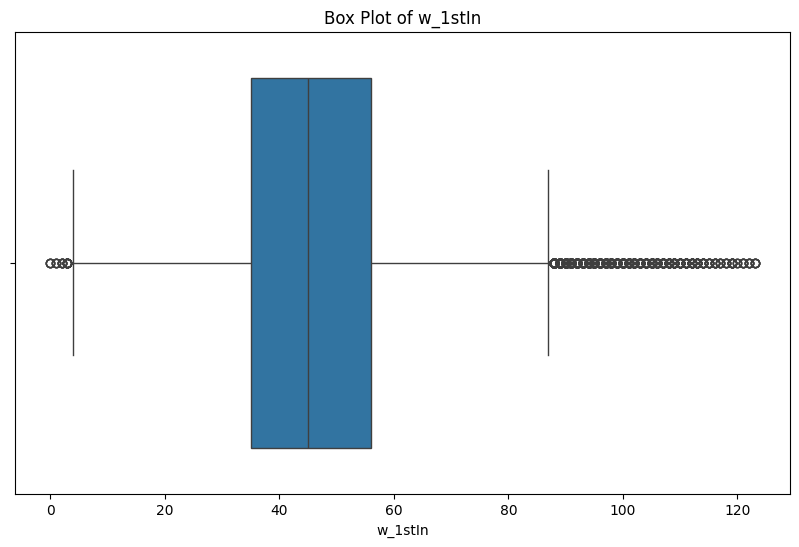

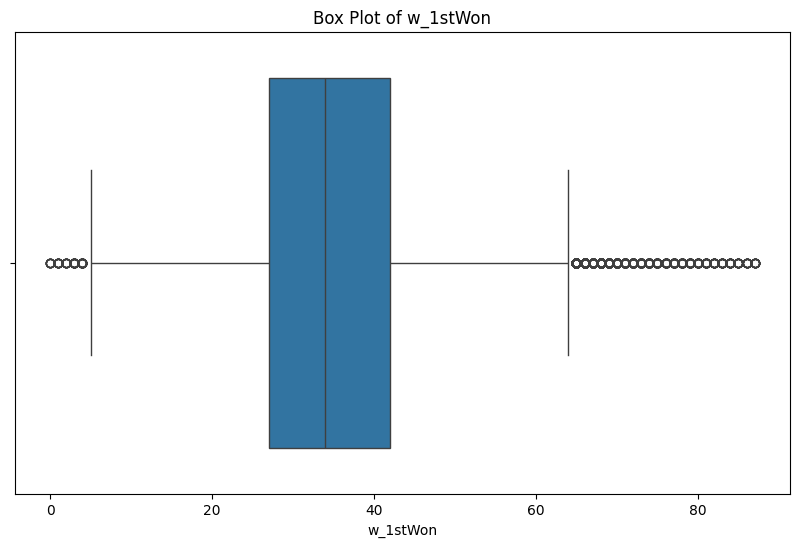

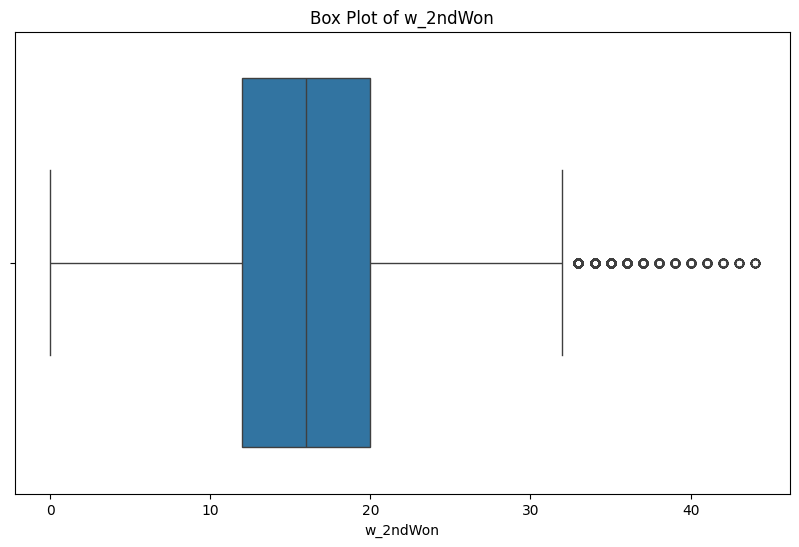

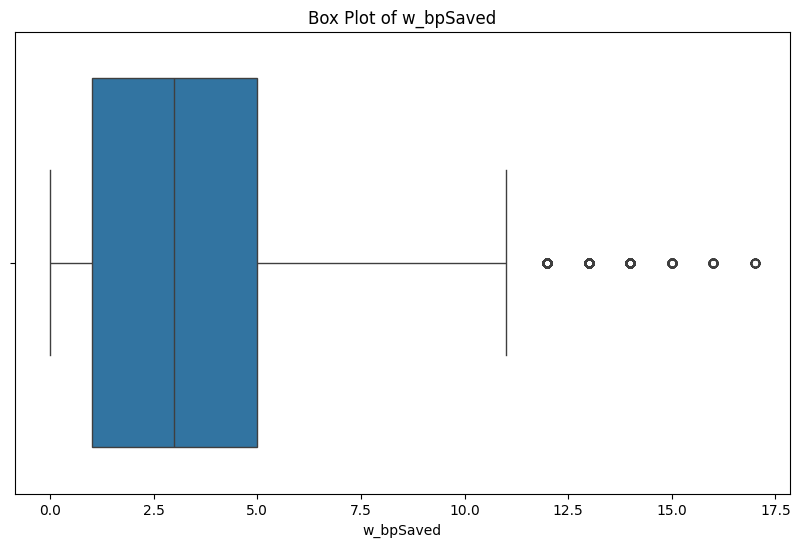

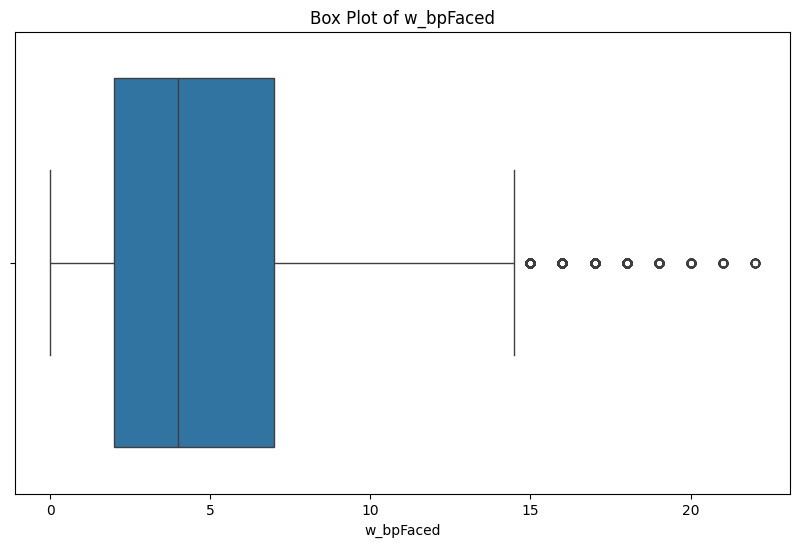

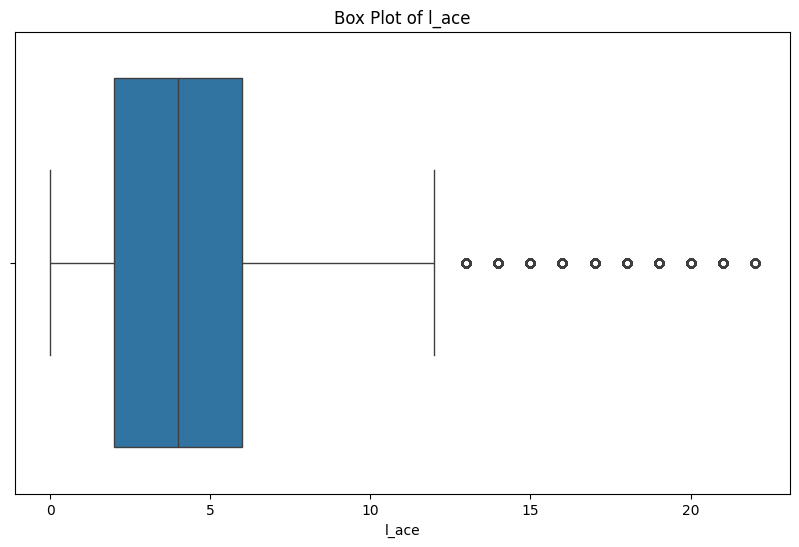

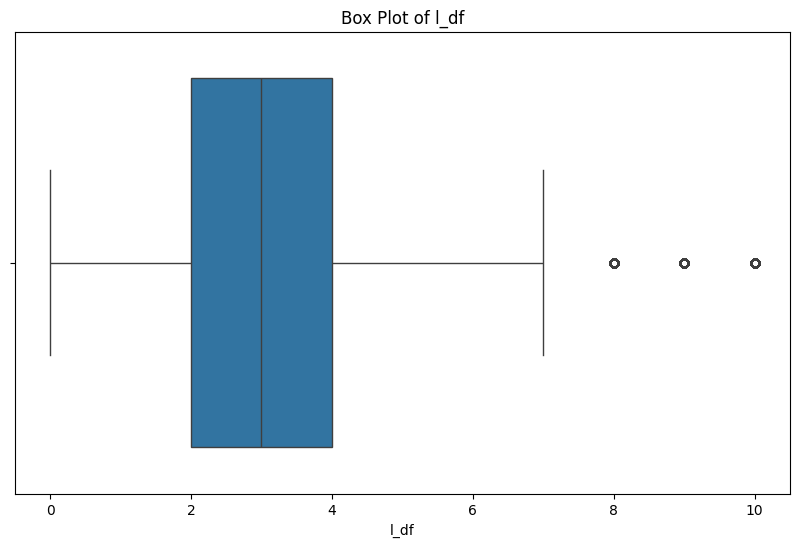

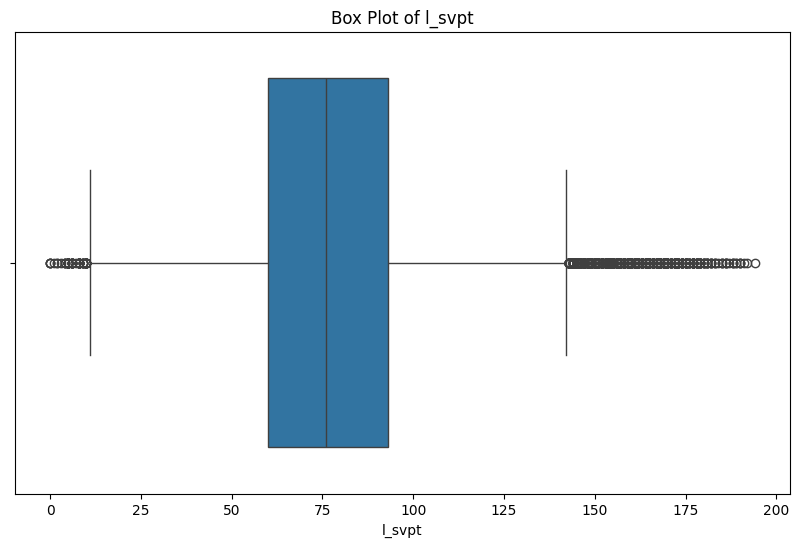

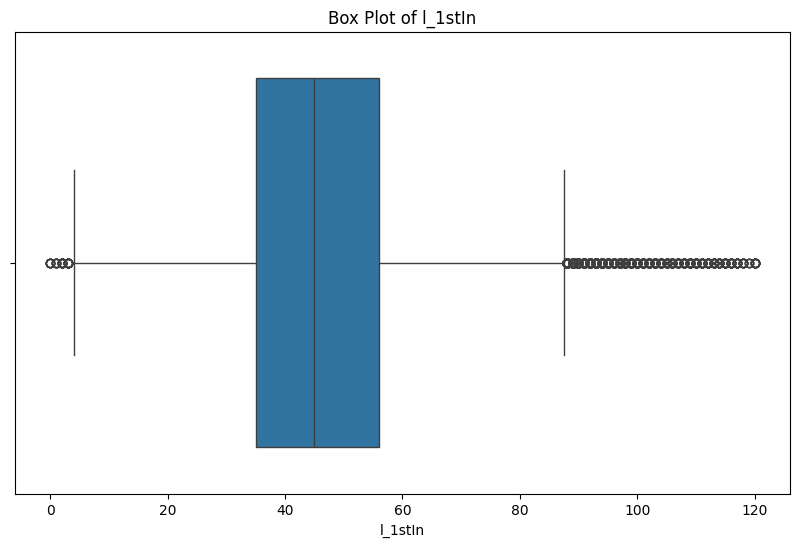

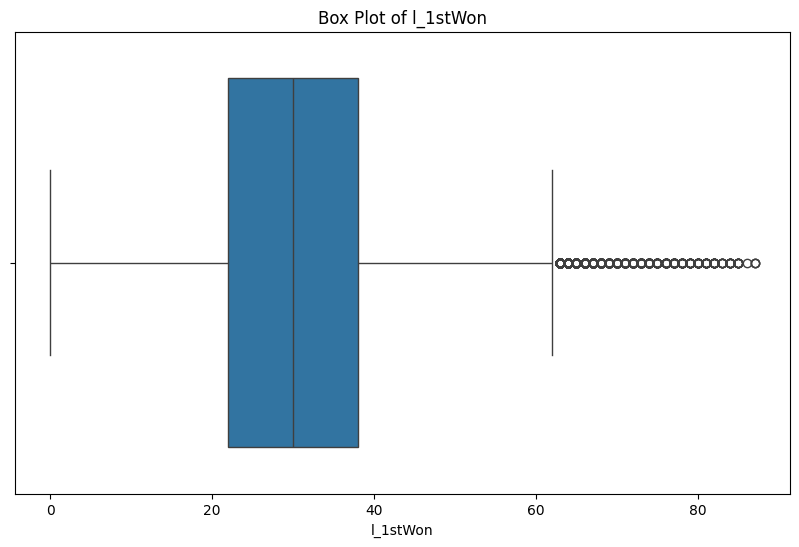

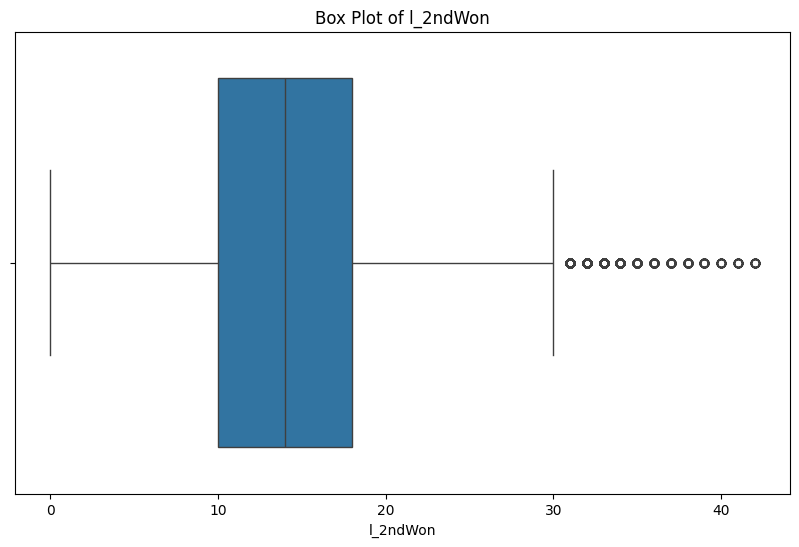

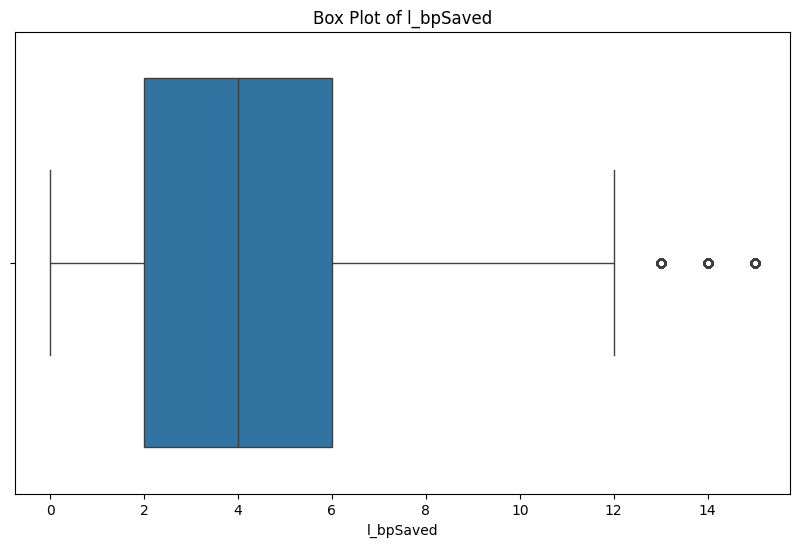

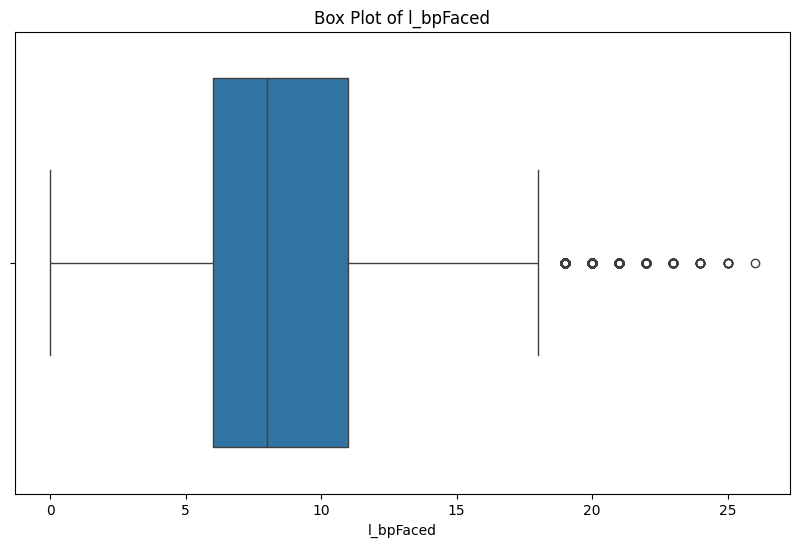

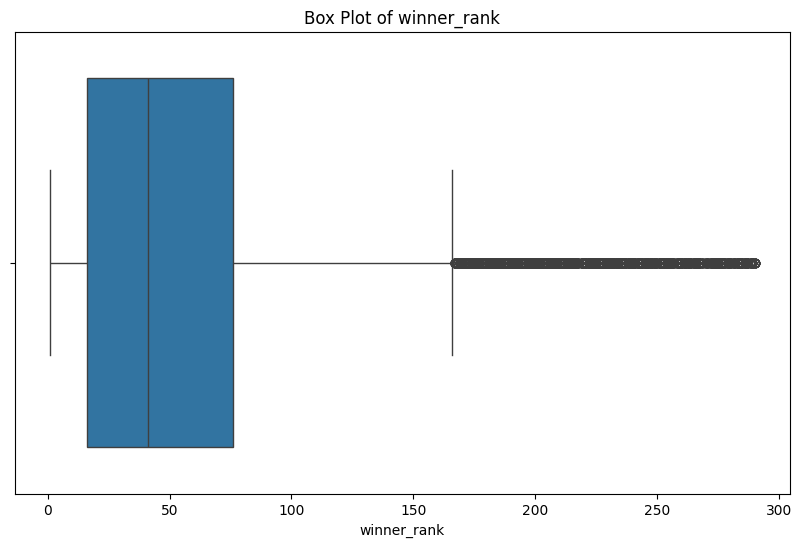

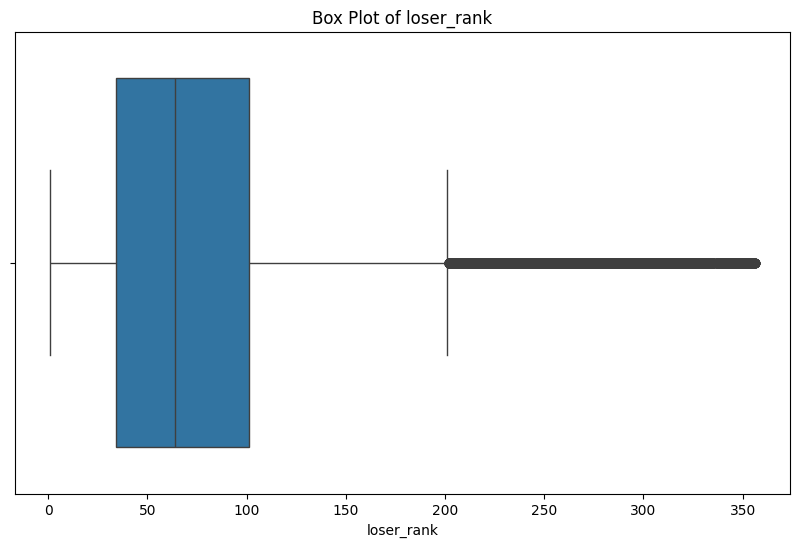

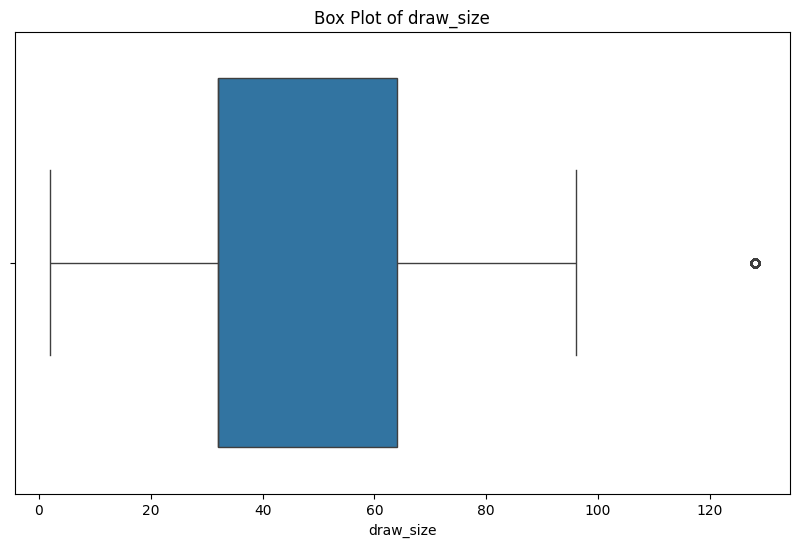

In [49]:
# Inspect distribution of numerical variables after outlier removal

# Create histograms for numerical variables
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_no_outliers[col], kde=True)  # Include KDE for density estimation
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for numerical variables to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Distribution of tourney_name:
tourney_name
Australian Open                0.041779
Roland Garros                  0.040915
Wimbledon                      0.036472
Miami Masters                  0.034399
Indian Wells Masters           0.032625
                                 ...   
Davis Cup G2 PO: HUN vs MDA    0.000000
Davis Cup G2 R2: NZL vs PHI    0.000000
Davis Cup G2 R2: NZL vs PAK    0.000000
Davis Cup G2 PO: HKG vs SYR    0.000000
Davis Cup WG PO: SUI vs SWE    0.000000
Name: proportion, Length: 1906, dtype: float64


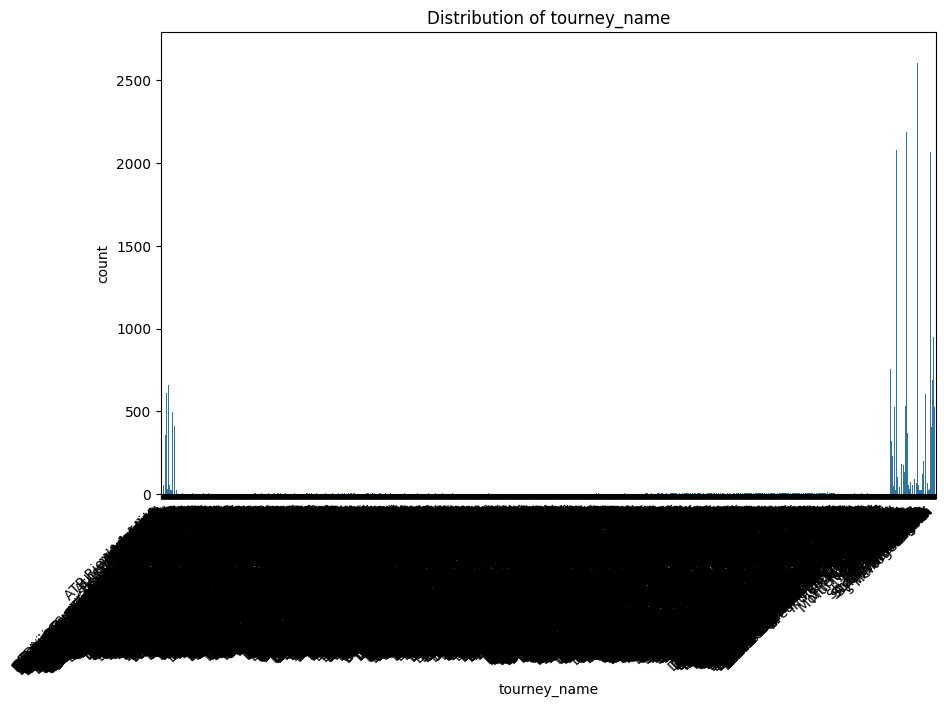

Distribution of surface:
surface
Hard      0.547172
Clay      0.329251
Grass     0.098033
Carpet    0.025544
Name: proportion, dtype: float64


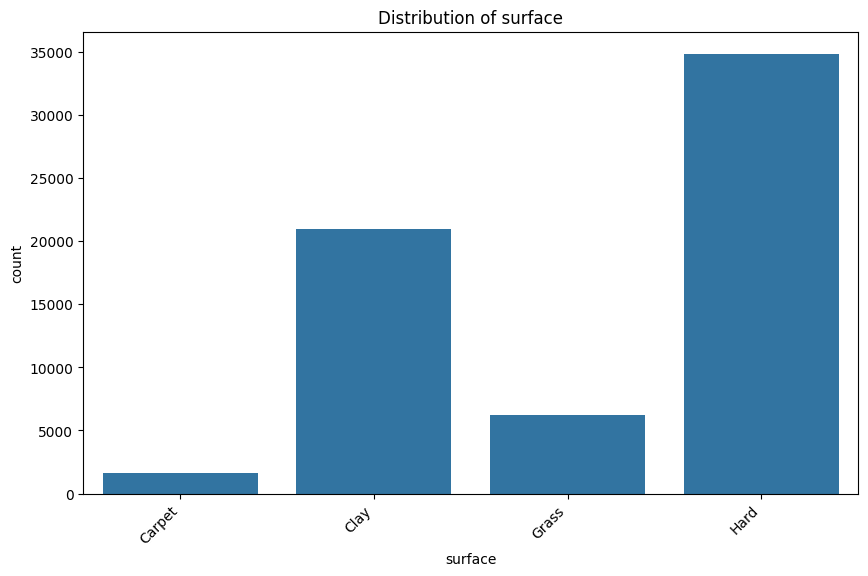

Distribution of tourney_level:
tourney_level
A    0.582513
M    0.208469
G    0.157977
D    0.044777
F    0.006264
Name: proportion, dtype: float64


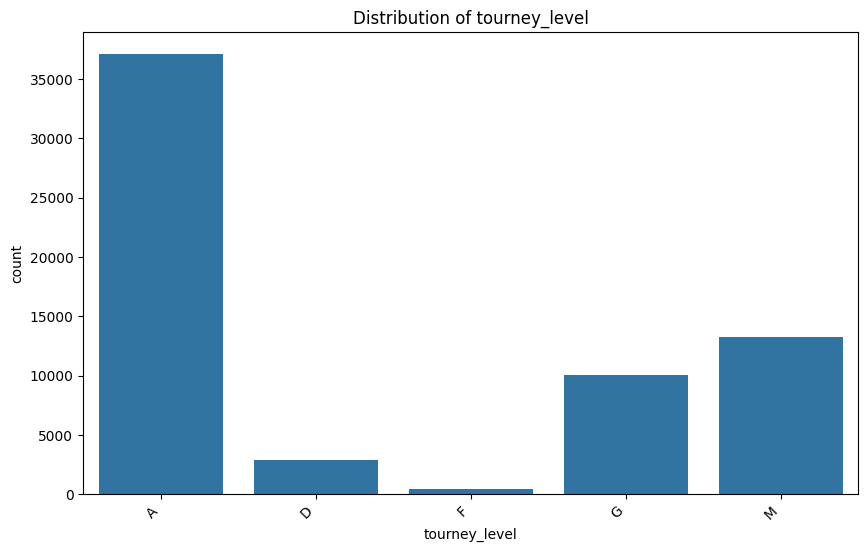

Distribution of winner_hand:
winner_hand
R    0.875559
L    0.123185
U    0.001256
A    0.000000
Name: proportion, dtype: float64


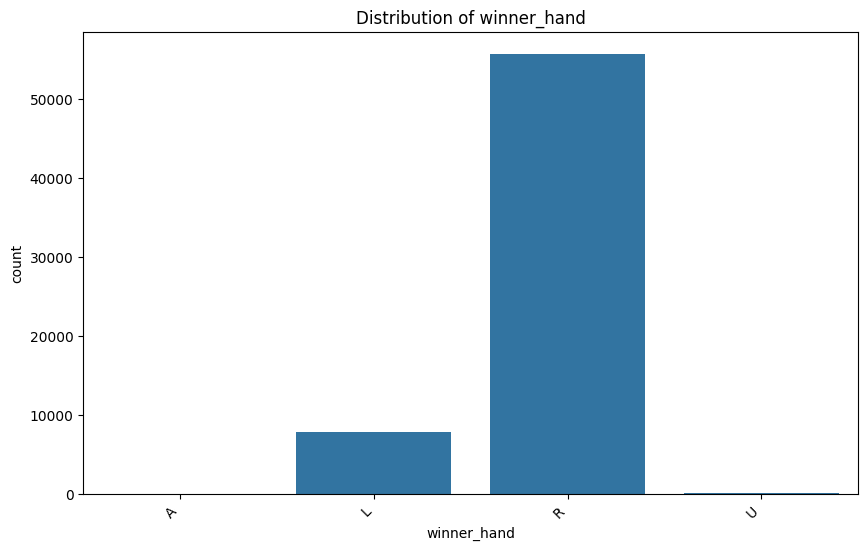

Distribution of loser_hand:
loser_hand
R    0.862607
L    0.134222
U    0.003156
A    0.000016
Name: proportion, dtype: float64


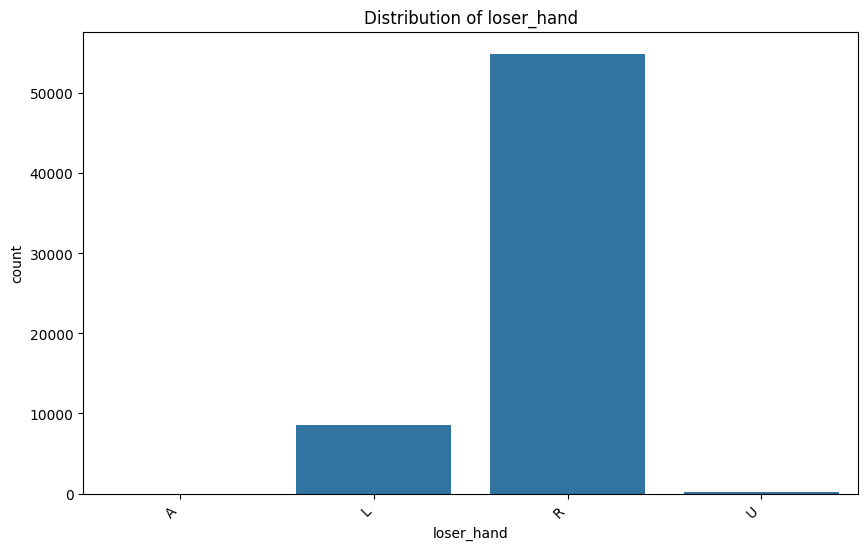

Distribution of round:
round
R32     0.328435
R16     0.184479
R64     0.158479
R128    0.101000
QF      0.094390
RR      0.060007
SF      0.048278
F       0.024414
ER      0.000393
BR      0.000126
Name: proportion, dtype: float64


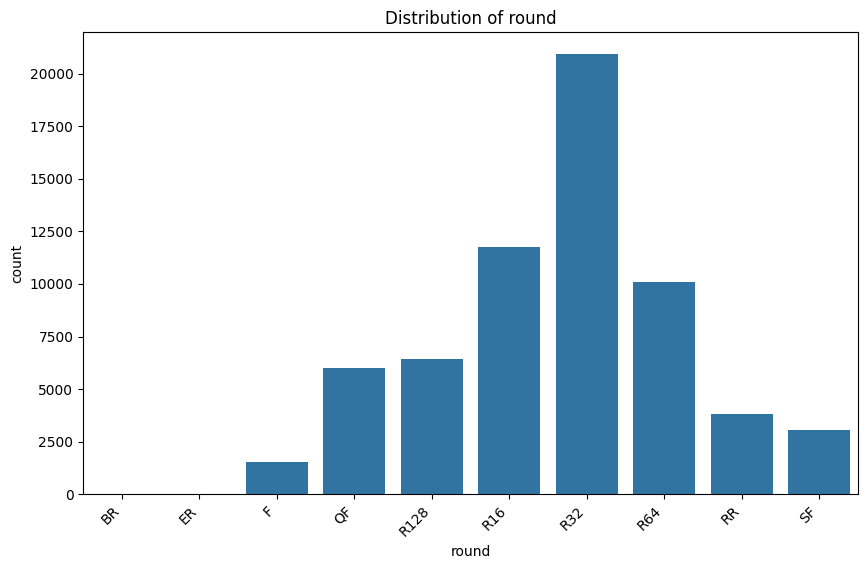

In [50]:
# Ensure distribution of categorical variables remain the same
for col in categorical_cols:
    print(f"Distribution of {col}:")
    print(df_no_outliers[col].value_counts(normalize=True))  # Normalize to get proportions
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_no_outliers)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

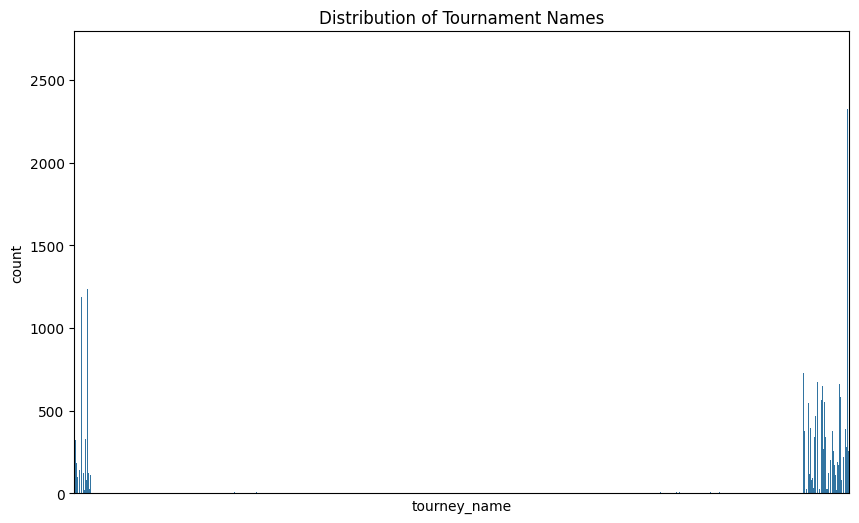

In [51]:
# Distribution of tournament names. Exclude name labels on x-axis

plt.figure(figsize=(10, 6))
sns.countplot(x='tourney_name', data=df_no_outliers)
plt.title('Distribution of Tournament Names')
plt.xticks([]) # Remove x-axis labels
plt.show()

##  Patterns

### Correlations

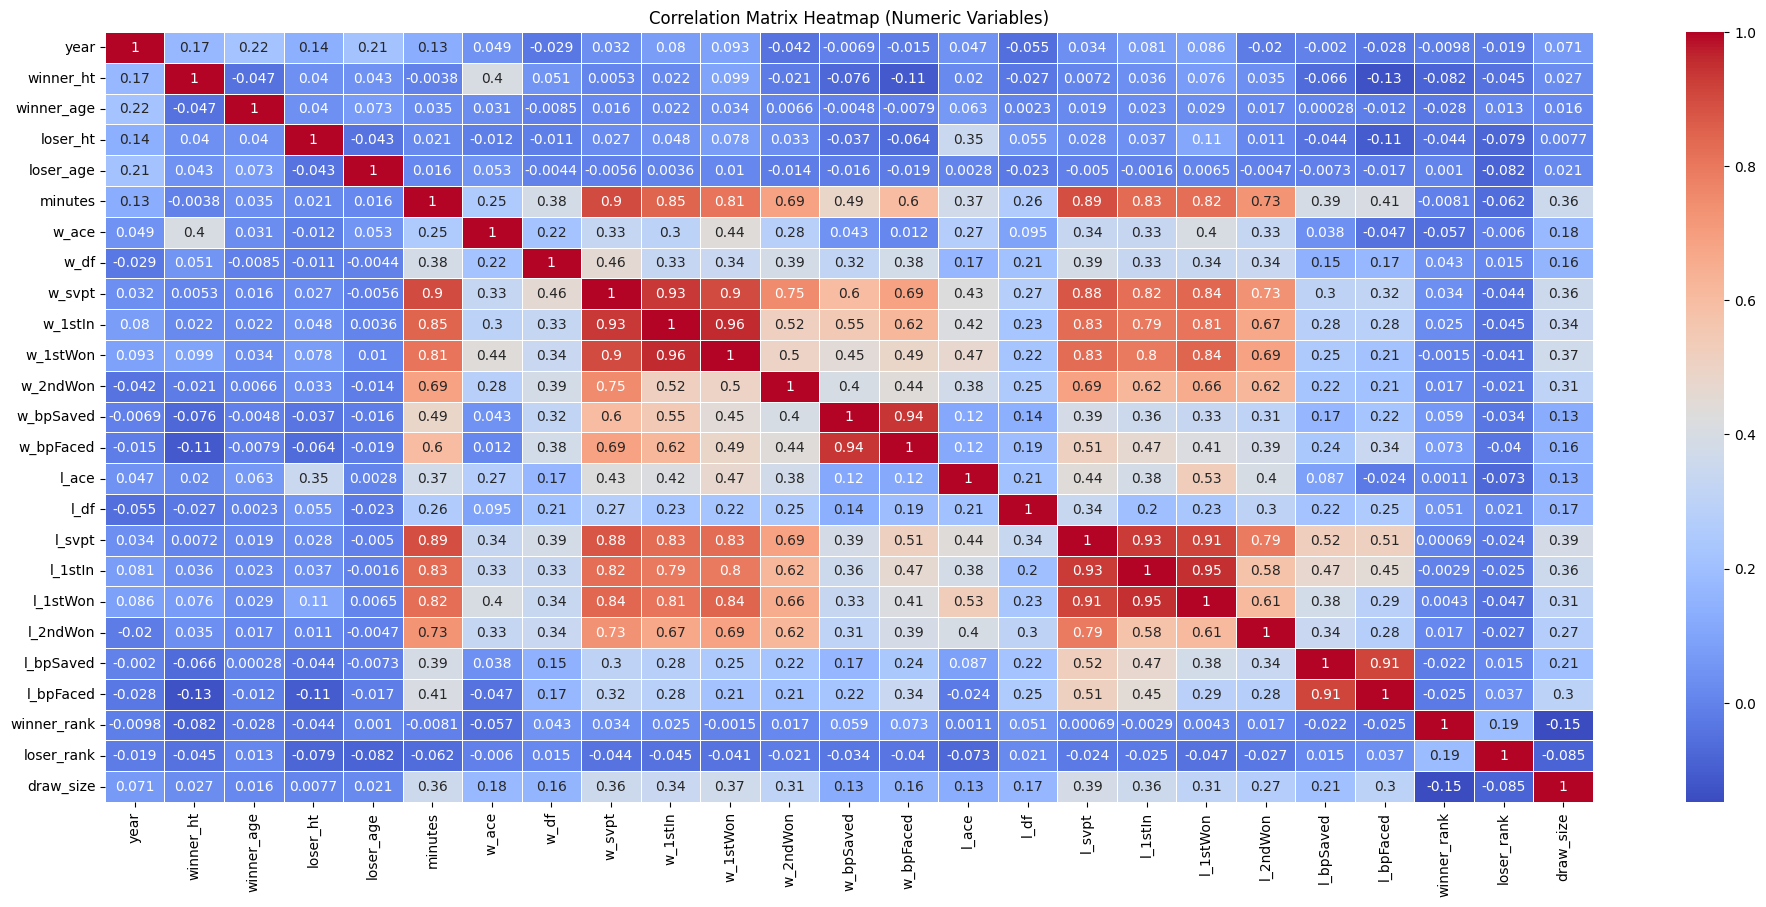

In [52]:
# Correlation among numeric variables

# Select only the numeric columns from the dataframe
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numeric variables
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numeric Variables)")
plt.show()

### Distributions of Categorical and Numeric Variables

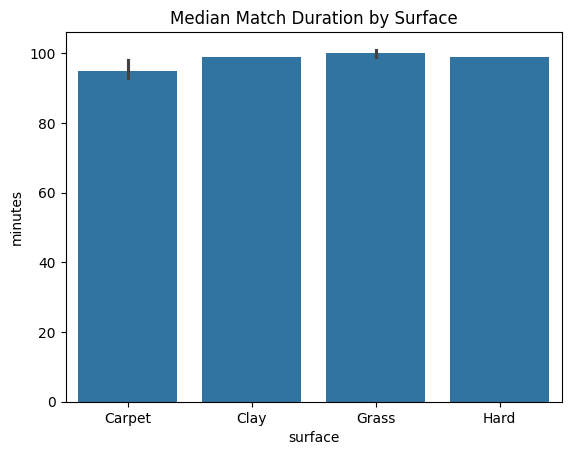

In [55]:
sns.barplot(x='surface', y='minutes', data=df_no_outliers, estimator='median')
plt.title('Median Match Duration by Surface')
plt.show()

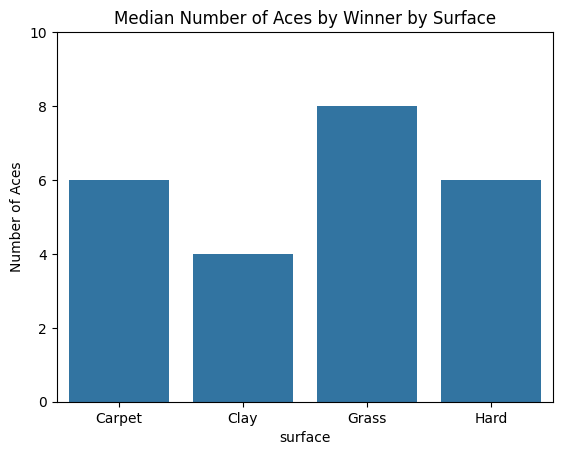

In [56]:
sns.barplot(x='surface', y='w_ace', data=df_no_outliers, estimator='median')
plt.title('Median Number of Aces by Winner by Surface')
plt.ylabel("Number of Aces")
plt.ylim(0, 10)  # Set y-axis limits
plt.show()

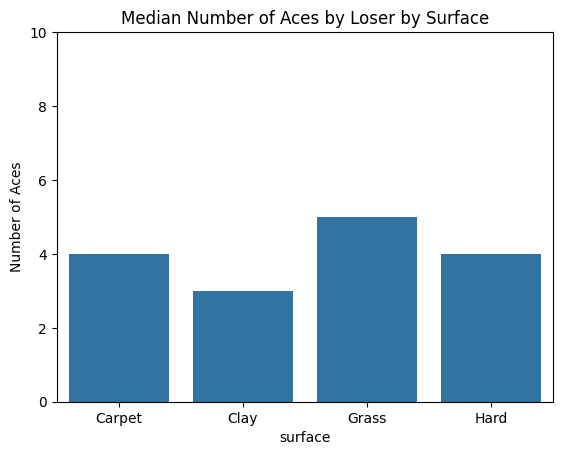

In [57]:
sns.barplot(x='surface', y='l_ace', data=df_no_outliers, estimator='median')
plt.title('Median Number of Aces by Loser by Surface')
plt.ylabel("Number of Aces")
plt.ylim(0, 10)  # Set y-axis limits
plt.show()

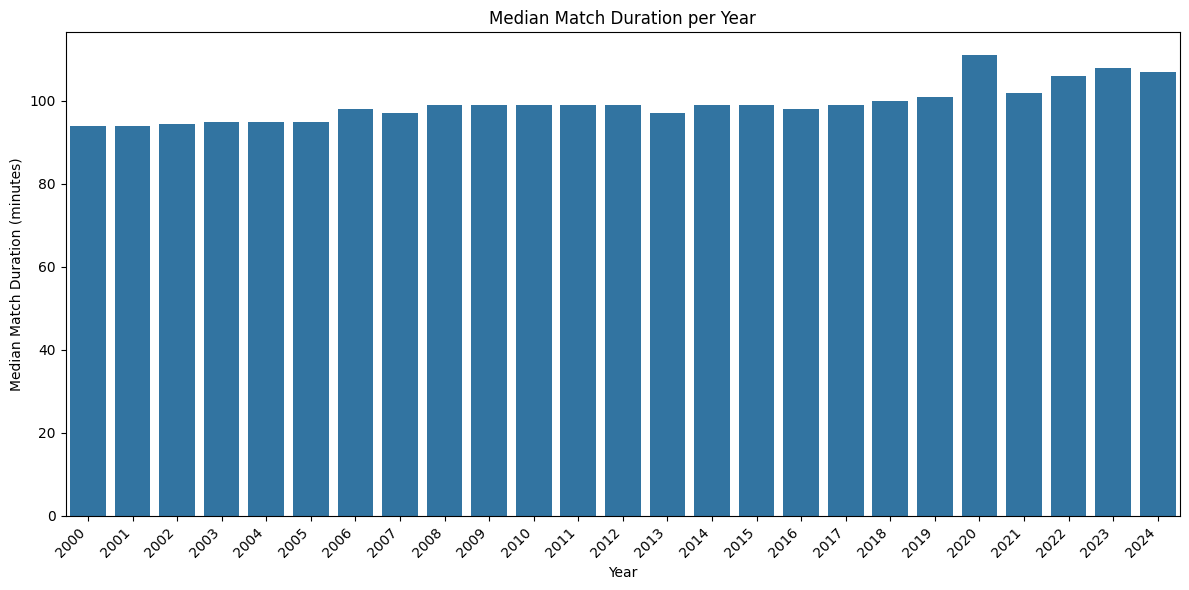

In [58]:
# Group the data by year and calculate the median duration
duration_by_year = df_no_outliers.groupby('year')['minutes'].median()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_by_year.index, y=duration_by_year.values)
plt.xlabel("Year")
plt.ylabel("Median Match Duration (minutes)")
plt.title("Median Match Duration per Year")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [59]:
df_no_outliers['tourney_level'].unique()

['A', 'M', 'G', 'F', 'D']
Categories (5, object): ['A', 'D', 'F', 'G', 'M']

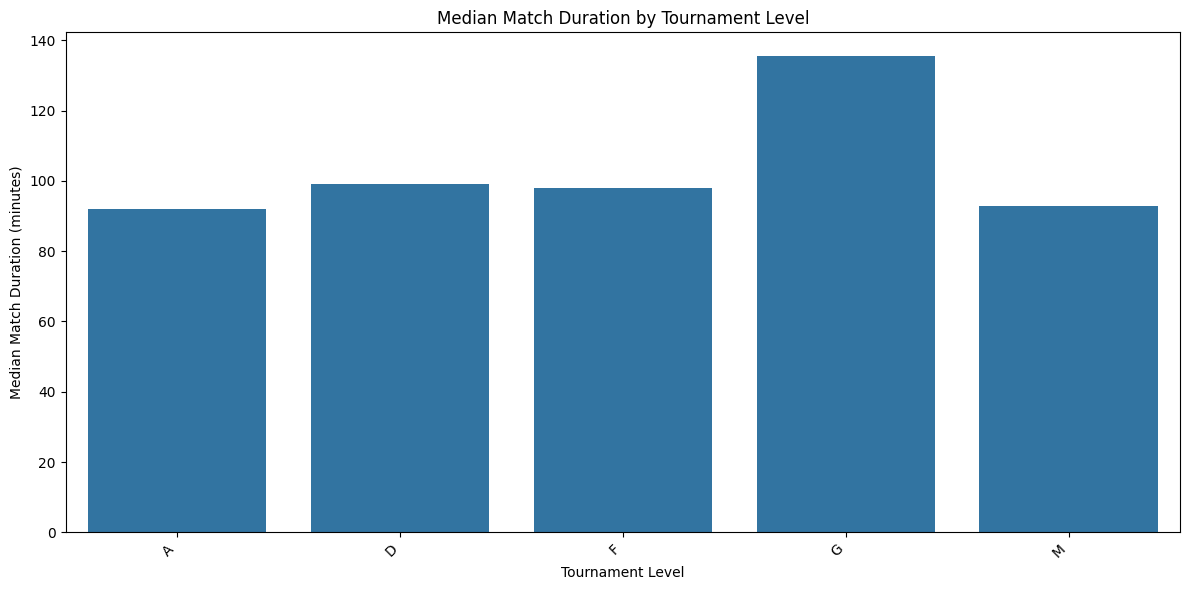

In [60]:
# Group the data by tournament level and calculate the median duration
duration_by_year = df_no_outliers.groupby('tourney_level', observed = True)['minutes'].median()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_by_year.index, y=duration_by_year.values)
plt.xlabel("Tournament Level")
plt.ylabel("Median Match Duration (minutes)")
plt.title("Median Match Duration by Tournament Level")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-61-9ee6bf2e7992>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  winner_df = df_no_outliers.groupby('surface')['w_df'].median()
<ipython-input-61-9ee6bf2e7992>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loser_df = df_no_outliers.groupby('surface')['l_df'].median()


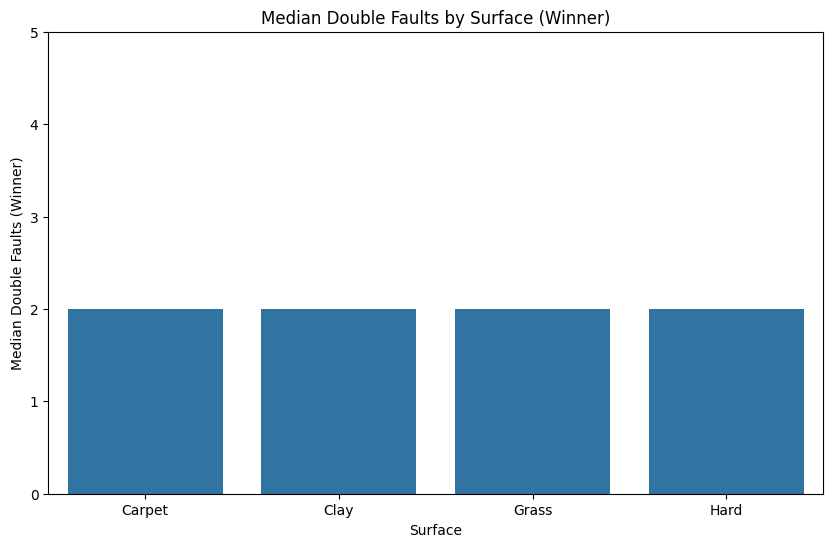

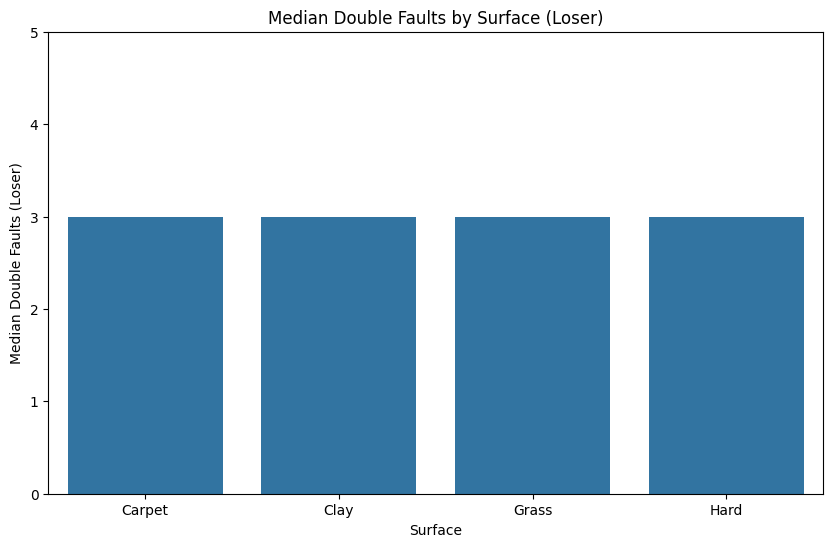

In [61]:
# Median number of double faults by surface type for winner and loser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median double faults by surface for the winner
winner_df = df_no_outliers.groupby('surface')['w_df'].median()

# Calculate the median double faults by surface for the loser
loser_df = df_no_outliers.groupby('surface')['l_df'].median()

# Create a bar plot for winner's double faults
plt.figure(figsize=(10,6))
sns.barplot(x=winner_df.index, y=winner_df.values)
plt.xlabel("Surface")
plt.ylabel("Median Double Faults (Winner)")
plt.title("Median Double Faults by Surface (Winner)")
plt.ylim(0, 5)
plt.show()

# Create a bar plot for loser's double faults
plt.figure(figsize=(10, 6))
sns.barplot(x=loser_df.index, y=loser_df.values)
plt.xlabel("Surface")
plt.ylabel("Median Double Faults (Loser)")
plt.title("Median Double Faults by Surface (Loser)")
plt.ylim(0, 5)
plt.show()


<ipython-input-62-88a177ecf95d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  winner_first_serve_won = df_no_outliers.groupby('tourney_level')['w_1stWon'].median()
<ipython-input-62-88a177ecf95d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loser_first_serve_won = df_no_outliers.groupby('tourney_level')['l_1stWon'].median()


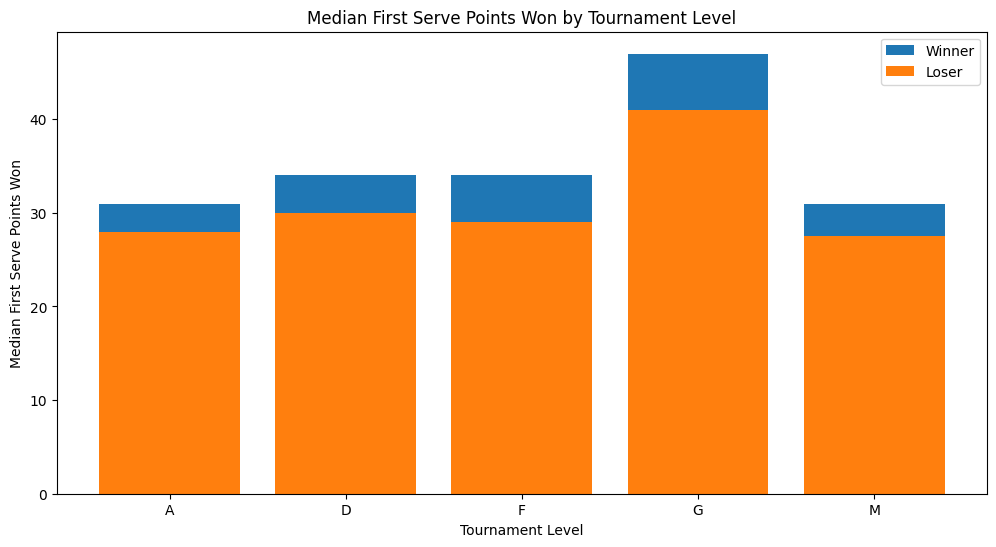

In [62]:
# Create visualization for median number of first serve points won by tournament level
# for winner and for loser

# Calculate the median of first serve points won by tournament level for winners
winner_first_serve_won = df_no_outliers.groupby('tourney_level')['w_1stWon'].median()

# Calculate the median of first serve points won by tournament level for losers
loser_first_serve_won = df_no_outliers.groupby('tourney_level')['l_1stWon'].median()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(winner_first_serve_won.index, winner_first_serve_won.values, label='Winner')
plt.bar(loser_first_serve_won.index, loser_first_serve_won.values, label='Loser')
plt.xlabel("Tournament Level")
plt.ylabel("Median First Serve Points Won")
plt.title("Median First Serve Points Won by Tournament Level")
plt.legend()
plt.show()

<ipython-input-63-f59518db31f8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  winner_first_serve_won_by_round = df_no_outliers.groupby('round')['w_1stWon'].median()
<ipython-input-63-f59518db31f8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loser_first_serve_won_by_round = df_no_outliers.groupby('round')['l_1stWon'].median()


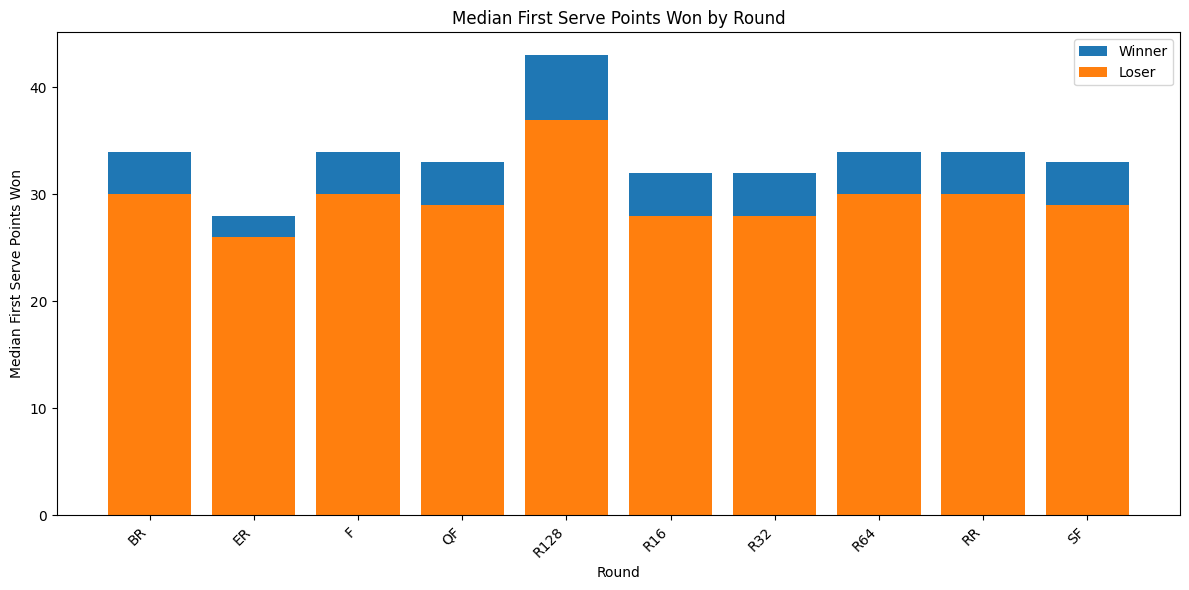

In [63]:
# Plot for median number of first-serve points won by round for winner and loser

# Calculate the median of first serve points won by round for winners
winner_first_serve_won_by_round = df_no_outliers.groupby('round')['w_1stWon'].median()

# Calculate the median of first serve points won by round for losers
loser_first_serve_won_by_round = df_no_outliers.groupby('round')['l_1stWon'].median()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(winner_first_serve_won_by_round.index, winner_first_serve_won_by_round.values, label='Winner')
plt.bar(loser_first_serve_won_by_round.index, loser_first_serve_won_by_round.values, label='Loser')
plt.xlabel("Round")
plt.ylabel("Median First Serve Points Won")
plt.title("Median First Serve Points Won by Round")
plt.legend()
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Combine variables to serve as predictors

In [64]:
final_df = df_no_outliers[['year', 'tourney_name', 'tourney_level', 'minutes',
                           'surface', 'draw_size', 'round',
                           'winner_hand', 'loser_hand', 'winner_ht', 'loser_ht',
                           'winner_age', 'loser_age', 'winner_rank', 'loser_rank']]

# Aggresiveness and effectiveness of serves
final_df['w_ace/df'] = df_no_outliers['w_ace'] / df_no_outliers['w_df']
final_df['l_ace/df'] = df_no_outliers['l_ace'] / df_no_outliers['l_df']

# First-serve accuracy (consistency)
final_df['w_1stInPerc'] = df_no_outliers['w_1stIn'] / df_no_outliers['w_svpt']
final_df['l_1stInPerc'] = df_no_outliers['l_1stIn'] / df_no_outliers['l_svpt']

# Calculate the number of second serves made in
# Serve points outside first-serves made in are second-serves made in or not (double fault)
df_no_outliers['w_2ndIn'] = df_no_outliers['w_svpt'] - df_no_outliers['w_1stIn'] - df_no_outliers['w_df']
df_no_outliers['l_2ndIn'] = df_no_outliers['l_svpt'] - df_no_outliers['l_1stIn'] - df_no_outliers['l_df']

# Second-serve accuracy (consistency)
final_df['w_2ndInPerc'] = df_no_outliers['w_2ndIn'] / df_no_outliers['w_svpt']
final_df['l_2ndInPerc'] = df_no_outliers['l_2ndIn'] / df_no_outliers['l_svpt']

# Effectiveness on points initiated by first-serve
final_df['w_1stWon/1stIn'] = df_no_outliers['w_1stWon'] / df_no_outliers['w_1stIn']
final_df['l_1stWon/1stIn'] = df_no_outliers['l_1stWon'] / df_no_outliers['l_1stIn']

# Effectiveness on points initiated by second-serve
final_df['w_2ndWon/2ndIn'] = df_no_outliers['w_2ndWon'] / df_no_outliers['w_2ndIn']
final_df['l_2ndWon/2ndIn'] = df_no_outliers['l_2ndWon'] / df_no_outliers['l_2ndIn']

# Performance under high pressure (break points)
final_df['w_bpSaved/bpFaced'] = df_no_outliers['w_bpSaved'] / df_no_outliers['w_bpFaced']
final_df['l_bpSaved/bpFaced'] = df_no_outliers['l_bpSaved'] / df_no_outliers['l_bpFaced']

print(f"Final columns = {final_df.columns}")
final_df

Final columns = Index(['year', 'tourney_name', 'tourney_level', 'minutes', 'surface',
       'draw_size', 'round', 'winner_hand', 'loser_hand', 'winner_ht',
       'loser_ht', 'winner_age', 'loser_age', 'winner_rank', 'loser_rank',
       'w_ace/df', 'l_ace/df', 'w_1stInPerc', 'l_1stInPerc', 'w_2ndInPerc',
       'l_2ndInPerc', 'w_1stWon/1stIn', 'l_1stWon/1stIn', 'w_2ndWon/2ndIn',
       'l_2ndWon/2ndIn', 'w_bpSaved/bpFaced', 'l_bpSaved/bpFaced'],
      dtype='object')


<ipython-input-64-7246f9da100d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['w_ace/df'] = df_no_outliers['w_ace'] / df_no_outliers['w_df']
<ipython-input-64-7246f9da100d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['l_ace/df'] = df_no_outliers['l_ace'] / df_no_outliers['l_df']
<ipython-input-64-7246f9da100d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

year                  tourney_name tourney_level  minutes surface  \
0      2000                      Auckland             A    108.0    Hard   
1      2000                      Auckland             A     85.0    Hard   
2      2000                      Auckland             A     56.0    Hard   
3      2000                      Auckland             A     68.0    Hard   
4      2000                      Auckland             A    115.0    Hard   
...     ...                           ...           ...      ...     ...   
73222  2024  Davis Cup WG2 PO: ESA vs POC             D     78.0    Hard   
73224  2024  Davis Cup WG2 PO: HKG vs ZIM             D     59.0    Hard   
73230  2024  Davis Cup WG2 PO: PAR vs MON             D     67.0    Clay   
73231  2024  Davis Cup WG2 PO: PAR vs MON             D     67.0    Clay   
73232  2024  Davis Cup WG2 PO: PAR vs MON             D    167.0    Clay   

       draw_size round winner_hand loser_hand  winner_ht  ...  w_1stInPerc  \
0             32   R32           R          L      188.0  ...     0.510417   
1             32   R32           R          L      190.0  ...     0.684211   
2             32   R32           R          R      175.0  ...     0.636364   
3             32   R32           R          R      183.0  ...     0.528302   
4             32   R32           R          R      180.0  ...     0.673469   
...          ...   ...         ...        ...        ...  ...          ...   
73222          4    RR           U          U      191.0  ...     0.700000   
73224          4    RR           R          R      185.0  ...     0.625000   
73230          4    RR           R          R      185.0  ...     0.690476   
73231          4    RR           U          U      185.0  ...     0.695652   
73232          4    RR           U          R      185.0  ...     0.652632   

       l_1stInPerc  w_2ndInPerc  l_2ndInPerc  w_1stWon/1stIn  l_1stWon/1stIn  \
0         0.518868     0.447917     0.405660        0.795918        0.709091   
1         0.432432     0.276316     0.432432        0.750000        0.781250   
2         0.589286     0.363636     0.303571        0.714286        0.606061   
3         0.614286     0.452830     0.357143        0.928571        0.674419   
4         0.500000     0.306122     0.413043        0.590909        0.739130   
...            ...          ...          ...             ...             ...   
73222     0.620690     0.275000     0.293103        0.714286        0.527778   
73224     0.607843     0.325000     0.352941        0.880000        0.451613   
73230     0.574074     0.309524     0.425926        0.689655        0.548387   
73231     0.589744     0.282609     0.358974        0.781250        0.434783   
73232     0.656863     0.336842     0.313725        0.709677        0.656716   

       w_2ndWon/2ndIn  l_2ndWon/2ndIn  w_bpSaved/bpFaced  l_bpSaved/bpFaced  
0            0.651163        0.674419           0.600000           0.571429  
1            0.619048        0.562500           0.833333           0.500000  
2            0.600000        0.411765           1.000000           0.636364  
3            0.625000        0.560000                NaN           0.750000  
4            0.466667        0.473684           0.545455           0.555556  
...               ...             ...                ...                ...  
73222        0.818182        0.470588           1.000000           0.500000  
73224        0.538462        0.444444           1.000000           0.444444  
73230        0.923077        0.434783           0.000000           0.428571  
73231        0.461538        0.285714           0.000000           0.166667  
73232        0.531250        0.593750           0.500000           0.500000  

[63693 rows x 27 columns]

### Correlation among final predictors

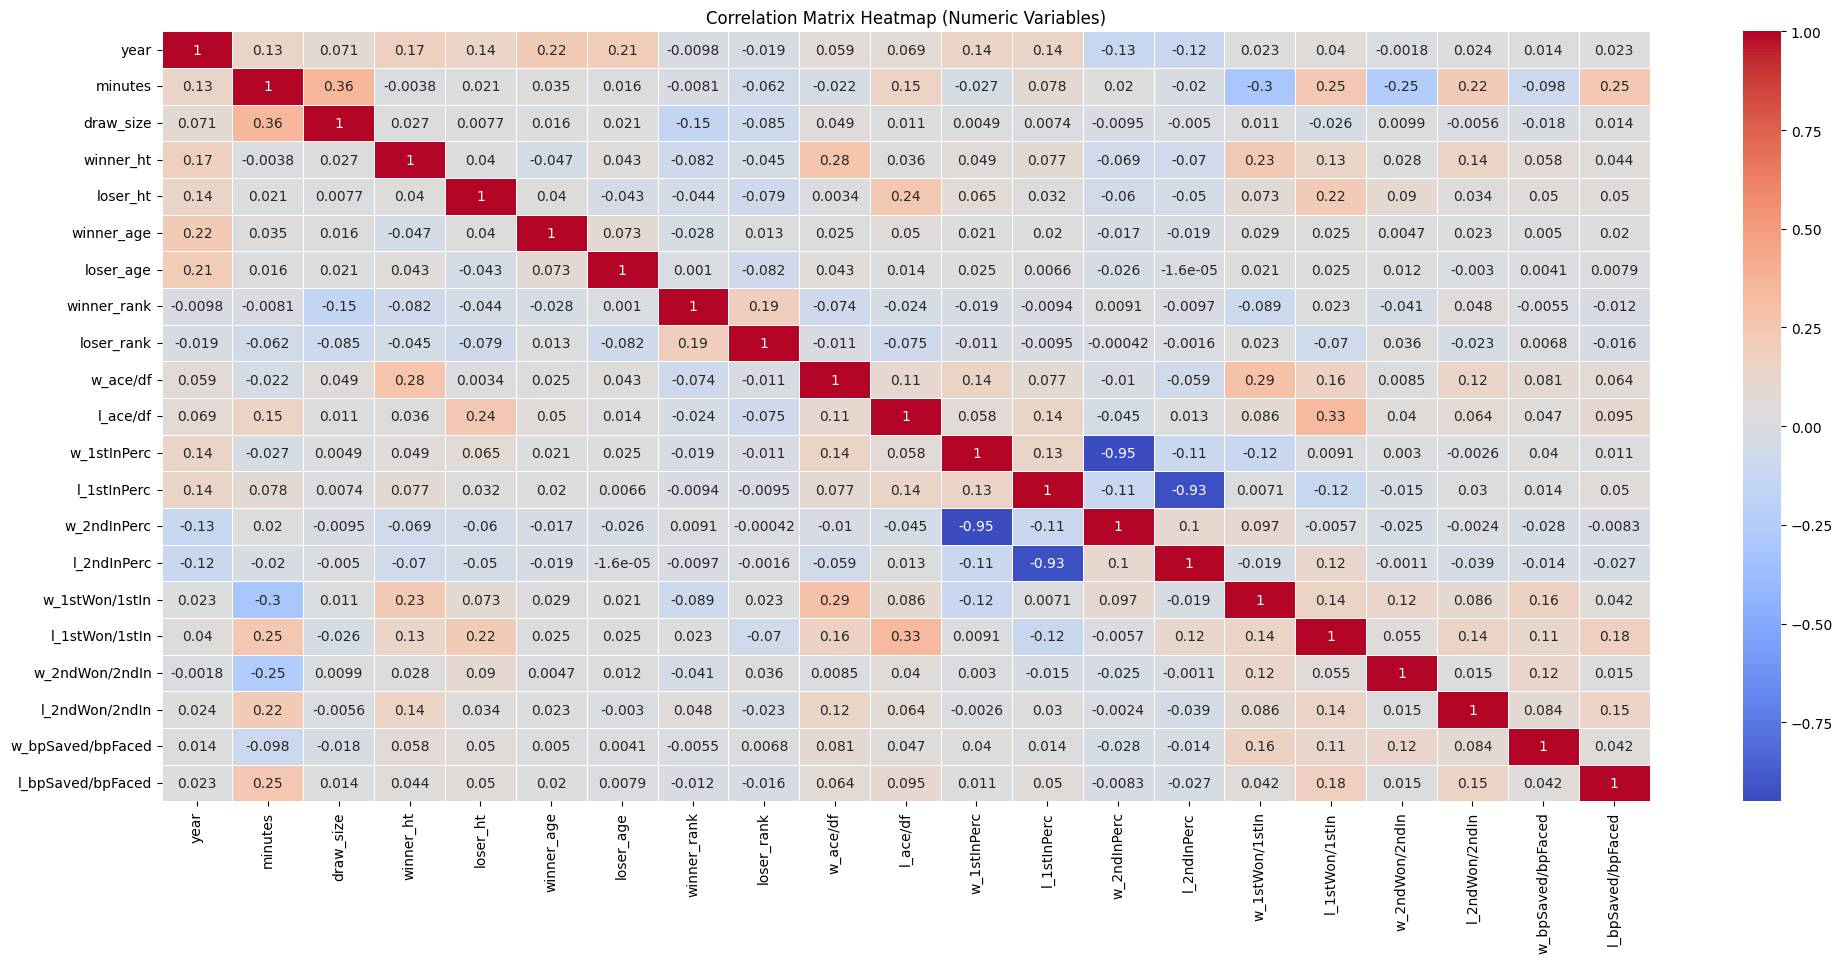

In [65]:
# Correlation among numeric variables

# Select only the numeric columns from the dataframe
numeric_df = final_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numeric variables
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numeric Variables)")
plt.show()

# Prepare data for training and prediction

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63693 entries, 0 to 73232
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               63693 non-null  int64   
 1   tourney_name       63693 non-null  category
 2   tourney_level      63693 non-null  category
 3   minutes            63693 non-null  float64 
 4   surface            63693 non-null  category
 5   draw_size          63693 non-null  int64   
 6   round              63693 non-null  category
 7   winner_hand        63693 non-null  category
 8   loser_hand         63693 non-null  category
 9   winner_ht          63693 non-null  float64 
 10  loser_ht           63693 non-null  float64 
 11  winner_age         63693 non-null  float64 
 12  loser_age          63693 non-null  float64 
 13  winner_rank        63693 non-null  float64 
 14  loser_rank         63693 non-null  float64 
 15  w_ace/df           63126 non-null  float64 
 16  l_ace/df 

In [67]:
original_rows_count = final_df.shape[0]
original_rows_count

63693

## Examine NA values and exclude

In [68]:
# Check percentage of NA values per column
print(f"Percentage of NA values per column")
missing = round((final_df.isna().sum()/len(final_df)) * 100, 3)
missing[missing != 0]

Percentage of NA values per column


w_ace/df             0.890
l_ace/df             1.237
w_1stInPerc          0.006
l_1stInPerc          0.006
w_2ndInPerc          0.006
l_2ndInPerc          0.006
w_1stWon/1stIn       0.006
l_1stWon/1stIn       0.009
w_2ndWon/2ndIn       0.024
l_2ndWon/2ndIn       0.020
w_bpSaved/bpFaced    9.356
l_bpSaved/bpFaced    0.245
dtype: float64

In [69]:
# Check percentage of inf values per column and drop them

import pandas as pd

# Assuming 'final_df' is your DataFrame as defined in the provided code.
# Check percentage of inf values per column
print(f"Percentage of inf values per column")
inf_percentage = (final_df.isin([float('inf'), float('-inf')]).sum() / len(final_df)) * 100
print(inf_percentage[inf_percentage != 0])


Percentage of inf values per column
w_ace/df    13.525819
l_ace/df     6.908137
dtype: float64


In [70]:
# Drop  NA values
final_df = final_df.dropna()

print(f"Percentage of NA values per column")
missing = round((final_df.isna().sum()/len(final_df)) * 100, 3)
missing[missing != 0]

Percentage of NA values per column


Series([], dtype: float64)

In [71]:
# Drop rows with inf values
final_df = final_df.replace([float('inf'), float('-inf')], pd.NA).dropna()

# Verify the changes
print(f"\nPercentage of inf values per column after removal:")
inf_percentage = (final_df.isin([float('inf'), float('-inf')]).sum() / len(final_df)) * 100
print(inf_percentage[inf_percentage != 0])


Percentage of inf values per column after removal:
Series([], dtype: float64)


In [72]:
# Percentage of data (rows) removed after excluding NA and inf values
percentage = ((original_rows_count - final_df.shape[0]) / original_rows_count) * 100
print(f"Percentage of data removed: {percentage:.2f}%")
print(f"Current number of rows: {final_df.shape[0]}, Previous rows count: {original_rows_count}")

Percentage of data removed: 26.31%
Current number of rows: 46935, Previous rows count: 63693


## Randomize player assignments and include winner column

In [73]:
temp = final_df.copy()

In [74]:
import pandas as pd
import numpy as np

# Randomize player assignment for each match
def restructure_match(row):
  i, j = 0, 1
  winner = i
  if np.random.rand() > 0.5:
    i, j = 1, 0
    winner = i

  return pd.Series({
      f'player{i}_hand': row['winner_hand'],
      f'player{j}_hand': row['loser_hand'],
      f'player{i}_ht': row['winner_ht'],
      f'player{j}_ht': row['loser_ht'],
      f'player{i}_age': row['winner_age'],
      f'player{j}_age': row['loser_age'],
      f'player{i}_rank': row['winner_rank'],
      f'player{j}_rank': row['loser_rank'],
      f'player{i}_ace/df': row['w_ace/df'],
      f'player{j}_ace/df': row['l_ace/df'],
      f'player{i}_1stInPerc': row['w_1stInPerc'],
      f'player{j}_1stInPerc': row['l_1stInPerc'],
      f'player{i}_2ndInPerc': row['w_2ndInPerc'],
      f'player{j}_2ndInPerc': row['l_2ndInPerc'],
      f'player{i}_1stWon/1stIn': row['w_1stWon/1stIn'],
      f'player{j}_1stWon/1stIn': row['l_1stWon/1stIn'],
      f'player{i}_2ndWon/2ndIn': row['w_2ndWon/2ndIn'],
      f'player{j}_2ndWon/2ndIn': row['l_2ndWon/2ndIn'],
      f'player{i}_bpSaved/bpFaced': row['w_bpSaved/bpFaced'],
      f'player{j}_bpSaved/bpFaced': row['l_bpSaved/bpFaced'],
      'winner': winner
  })

# Apply restructuring
df = temp.apply(restructure_match, axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46935 entries, 0 to 73232
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player0_1stInPerc        46935 non-null  float64
 1   player0_1stWon/1stIn     46935 non-null  float64
 2   player0_2ndInPerc        46935 non-null  float64
 3   player0_2ndWon/2ndIn     46935 non-null  float64
 4   player0_ace/df           46935 non-null  float64
 5   player0_age              46935 non-null  float64
 6   player0_bpSaved/bpFaced  46935 non-null  float64
 7   player0_hand             46935 non-null  object 
 8   player0_ht               46935 non-null  float64
 9   player0_rank             46935 non-null  float64
 10  player1_1stInPerc        46935 non-null  float64
 11  player1_1stWon/1stIn     46935 non-null  float64
 12  player1_2ndInPerc        46935 non-null  float64
 13  player1_2ndWon/2ndIn     46935 non-null  float64
 14  player1_ace/df           46

In [76]:
# Define missing columns
missing_cols = ['year', 'minutes', 'draw_size', 'tourney_name', 'tourney_level', 'surface', 'round']
for col in missing_cols:
  df[col] = temp[col]

categorical_cols = ['tourney_name', 'tourney_level', 'surface', 'round', 'player0_hand', 'player1_hand']
for col in categorical_cols:
  df[col] = df[col].astype('category')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 46935 entries, 0 to 73232
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   player0_1stInPerc        46935 non-null  float64 
 1   player0_1stWon/1stIn     46935 non-null  float64 
 2   player0_2ndInPerc        46935 non-null  float64 
 3   player0_2ndWon/2ndIn     46935 non-null  float64 
 4   player0_ace/df           46935 non-null  float64 
 5   player0_age              46935 non-null  float64 
 6   player0_bpSaved/bpFaced  46935 non-null  float64 
 7   player0_hand             46935 non-null  category
 8   player0_ht               46935 non-null  float64 
 9   player0_rank             46935 non-null  float64 
 10  player1_1stInPerc        46935 non-null  float64 
 11  player1_1stWon/1stIn     46935 non-null  float64 
 12  player1_2ndInPerc        46935 non-null  float64 
 13  player1_2ndWon/2ndIn     46935 non-null  float64 
 14  player1_ace

None

player0_1stInPerc  player0_1stWon/1stIn  player0_2ndInPerc  \
0           0.510417              0.795918           0.447917   
1           0.684211              0.750000           0.276316   
4           0.673469              0.590909           0.306122   
5           0.619048              0.630769           0.352381   
6           0.652174              0.622222           0.275362   

   player0_2ndWon/2ndIn  player0_ace/df  player0_age  player0_bpSaved/bpFaced  \
0              0.651163        4.500000         21.7                 0.600000   
1              0.619048        1.666667         24.5                 0.833333   
4              0.466667        0.500000         27.3                 0.545455   
5              0.567568        1.000000         30.2                 0.400000   
6              0.631579        0.200000         22.2                 0.750000   

  player0_hand  player0_ht  player0_rank  ...  player1_ht  player1_rank  \
0            R       188.0          11.0  ...       180.0          63.0   
1            R       190.0         211.0  ...       183.0          49.0   
4            R       180.0         167.0  ...       185.0          34.0   
5            R       175.0          70.0  ...       175.0          50.0   
6            R       185.0         246.0  ...       185.0          60.0   

   winner  year  minutes  draw_size  tourney_name tourney_level  surface  \
0       0  2000    108.0         32      Auckland             A     Hard   
1       0  2000     85.0         32      Auckland             A     Hard   
4       0  2000    115.0         32      Auckland             A     Hard   
5       1  2000    140.0         32      Auckland             A     Hard   
6       1  2000     84.0         32      Auckland             A     Hard   

   round  
0    R32  
1    R32  
4    R32  
5    R32  
6    R32  

[5 rows x 28 columns]

## Encode categorical variables

In [77]:
# Encode categorical variables in the dataframe
# such that it can be used with model for training and prediction

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [78]:
df

player0_1stInPerc  player0_1stWon/1stIn  player0_2ndInPerc  \
0               0.510417              0.795918           0.447917   
1               0.684211              0.750000           0.276316   
4               0.673469              0.590909           0.306122   
5               0.619048              0.630769           0.352381   
6               0.652174              0.622222           0.275362   
...                  ...                   ...                ...   
73220           0.521739              0.666667           0.369565   
73222           0.620690              0.527778           0.293103   
73224           0.607843              0.451613           0.352941   
73231           0.695652              0.781250           0.282609   
73232           0.656863              0.656716           0.313725   

       player0_2ndWon/2ndIn  player0_ace/df  player0_age  \
0                  0.651163        4.500000         21.7   
1                  0.619048        1.666667         24.5   
4                  0.466667        0.500000         27.3   
5                  0.567568        1.000000         30.2   
6                  0.631579        0.200000         22.2   
...                     ...             ...          ...   
73220              0.176471        0.400000         20.7   
73222              0.470588        0.400000         27.2   
73224              0.444444        0.500000         27.2   
73231              0.461538        3.000000         25.2   
73232              0.593750        1.333333         39.6   

       player0_bpSaved/bpFaced  player0_hand  player0_ht  player0_rank  ...  \
0                     0.600000             2       188.0          11.0  ...   
1                     0.833333             2       190.0         211.0  ...   
4                     0.545455             2       180.0         167.0  ...   
5                     0.400000             2       175.0          70.0  ...   
6                     0.750000             2       185.0         246.0  ...   
...                        ...           ...         ...           ...  ...   
73220                 0.444444             3       185.0          68.0  ...   
73222                 0.500000             3       185.0          68.0  ...   
73224                 0.444444             2       198.0         348.0  ...   
73231                 0.000000             3       185.0         171.0  ...   
73232                 0.500000             2       185.0          68.0  ...   

       player1_ht  player1_rank  winner  year  minutes  draw_size  \
0           180.0          63.0       0  2000    108.0         32   
1           183.0          49.0       0  2000     85.0         32   
4           185.0          34.0       0  2000    115.0         32   
5           175.0          50.0       1  2000    140.0         32   
6           185.0          60.0       1  2000     84.0         32   
...           ...           ...     ...   ...      ...        ...   
73220       191.0          45.0       1  2024     69.0          4   
73222       191.0          45.0       1  2024     78.0          4   
73224       185.0         247.0       1  2024     59.0          4   
73231       185.0          68.0       0  2024     67.0          4   
73232       185.0         171.0       1  2024    167.0          4   

       tourney_name  tourney_level  surface  round  
0                13              0        3      6  
1                13              0        3      6  
4                13              0        3      6  
5                13              0        3      6  
6                13              0        3      6  
...             ...            ...      ...    ...  
73220          1023              1        3      8  
73222          1023              1        3      8  
73224          1024              1        3      8  
73231          1026              1        1      8  
73232          1026              1        1      8  

[46935 rows x 28 columns]

In [79]:
data = df.copy()

In [80]:
missing = data.isna().sum()
missing[missing != 0]

Series([], dtype: int64)

# XGBoost

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46935 entries, 0 to 73232
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player0_1stInPerc        46935 non-null  float64
 1   player0_1stWon/1stIn     46935 non-null  float64
 2   player0_2ndInPerc        46935 non-null  float64
 3   player0_2ndWon/2ndIn     46935 non-null  float64
 4   player0_ace/df           46935 non-null  float64
 5   player0_age              46935 non-null  float64
 6   player0_bpSaved/bpFaced  46935 non-null  float64
 7   player0_hand             46935 non-null  int64  
 8   player0_ht               46935 non-null  float64
 9   player0_rank             46935 non-null  float64
 10  player1_1stInPerc        46935 non-null  float64
 11  player1_1stWon/1stIn     46935 non-null  float64
 12  player1_2ndInPerc        46935 non-null  float64
 13  player1_2ndWon/2ndIn     46935 non-null  float64
 14  player1_ace/df           46

## Train and predict function

In [81]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

def train_predict_XGBoost(data):
  X = data.drop('winner', axis=1)
  y = data['winner']
  # Train-test split (randomly selects rows to split data)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize and train XGBoost model
  model = XGBClassifier(eval_metric='logloss')
  model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)
  # Get probability of predicting 1 (i.e., player 1 wins, player 2 loses)
  y_pred_prob = model.predict_proba(X_test)[:, 1]

  return [model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob]

## Evaluate function

In [82]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def evaluate_XGBoost(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob):

  print("Training set class distribution:")
  print(y_train.value_counts(normalize=True))

  print("Test set class distribution:")
  print(f"{y_test.value_counts(normalize=True)}\n")

  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy:.2f}')

  # Area under the Curve
  roc_auc = roc_auc_score(y_test, y_pred_prob)
  print(f'ROC AUC: {roc_auc:.2f}')

  # Train vs. Test Average Prediction Accuracy
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

  # Precision
  precision = precision_score(y_test, y_pred)
  print(f"Precision: {precision:.2f}")

  # Recall (sensitivity)
  recall = recall_score(y_test, y_pred)
  print(f"Recall: {recall:.2f}")

  # F1 Score
  f1 = f1_score(y_test, y_pred)
  print(f"F1 Score: {f1:.2f}")

  # Get confusion matrix values
  cm = confusion_matrix(y_test, y_pred)
  TN, FP, FN, TP = cm.ravel()

  # Calculate Specificity
  specificity = TN / (TN + FP)
  print(f"Specificity: {specificity:.2f}")

  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='g', cmap='PiYG', xticklabels=['Player 0', 'Player 1'], yticklabels=['Player 0', 'Player 1'])

  # Add labels and title
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix for XGBoost')

  # Show the plot
  plt.show()

  # Plot feature importance based by gain
  importances = model.feature_importances_

  # Create a DataFrame for better readability
  feature_importance_df = pd.DataFrame({
      'Feature': X_train.columns, # feature names (predictors)
      'Importance': importances
  })

  # Sort features by importance in descending order
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  plt.figure(figsize=(10, 8))
  plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
  plt.xlabel('Feature Importance')
  plt.ylabel('Features')
  plt.title('XGBoost Feature Importance (Gain)')
  plt.gca().invert_yaxis()  # To display the highest importance at the top
  plt.show()

## Train and predict with all data

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64
Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.94
ROC AUC: 0.99
Train Accuracy: 0.9811707680835198, Test Accuracy: 0.9354426334292106
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
Specificity: 0.94


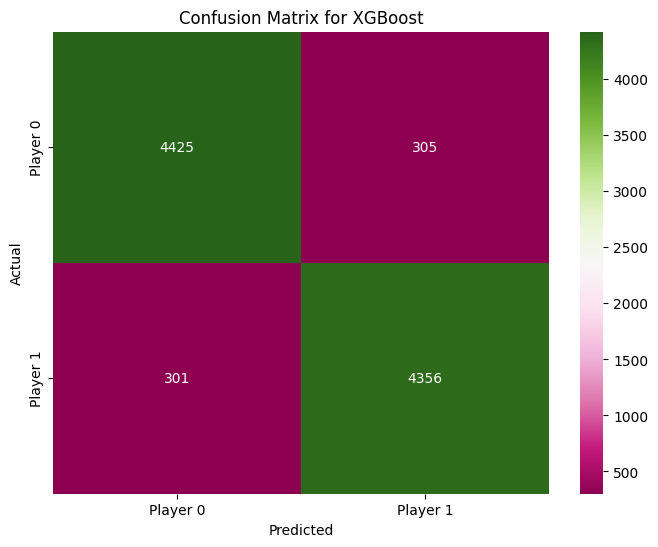

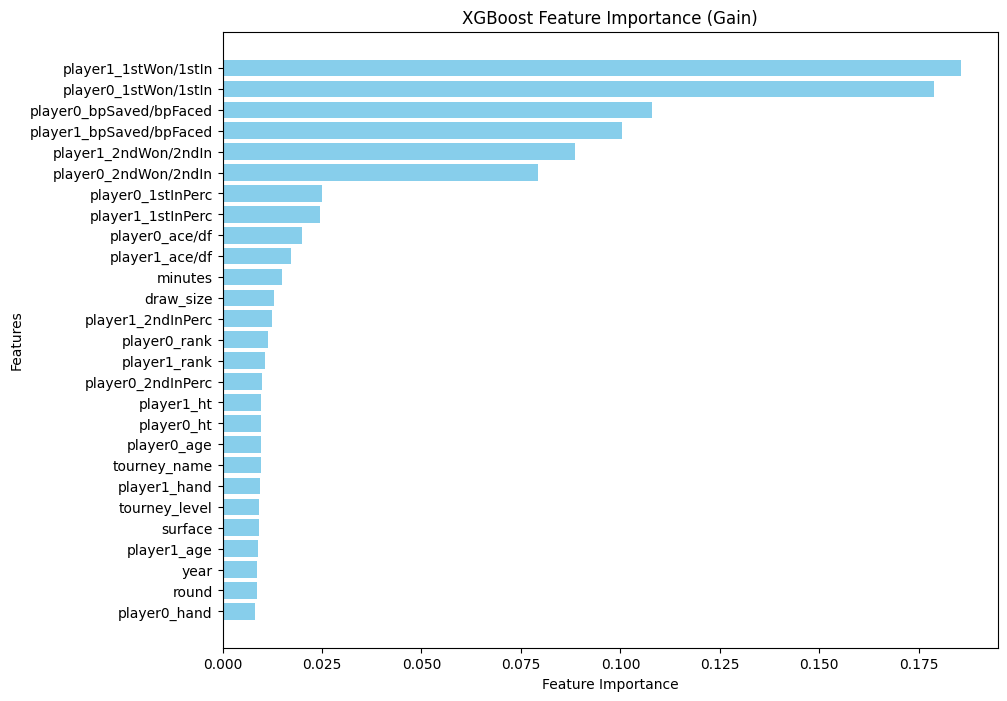

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_XGBoost(data)
evaluate_XGBoost(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train and predict without year

In [ ]:
exclude_year = data.drop('year', axis=1)
exclude_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46935 entries, 0 to 73232
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player0_1stInPerc        46935 non-null  float64
 1   player0_1stWon/1stIn     46935 non-null  float64
 2   player0_2ndInPerc        46935 non-null  float64
 3   player0_2ndWon/2ndIn     46935 non-null  float64
 4   player0_ace/df           46935 non-null  float64
 5   player0_age              46935 non-null  float64
 6   player0_bpSaved/bpFaced  46935 non-null  float64
 7   player0_hand             46935 non-null  int64  
 8   player0_ht               46935 non-null  float64
 9   player0_rank             46935 non-null  float64
 10  player1_1stInPerc        46935 non-null  float64
 11  player1_1stWon/1stIn     46935 non-null  float64
 12  player1_2ndInPerc        46935 non-null  float64
 13  player1_2ndWon/2ndIn     46935 non-null  float64
 14  player1_ace/df           46

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64
Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.93
ROC AUC: 0.99
Train Accuracy: 0.9820762757004368, Test Accuracy: 0.9341642697347395
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Specificity: 0.94


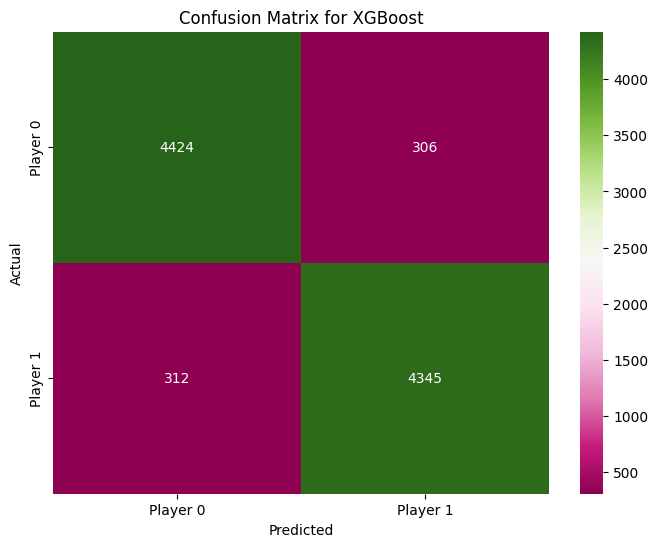

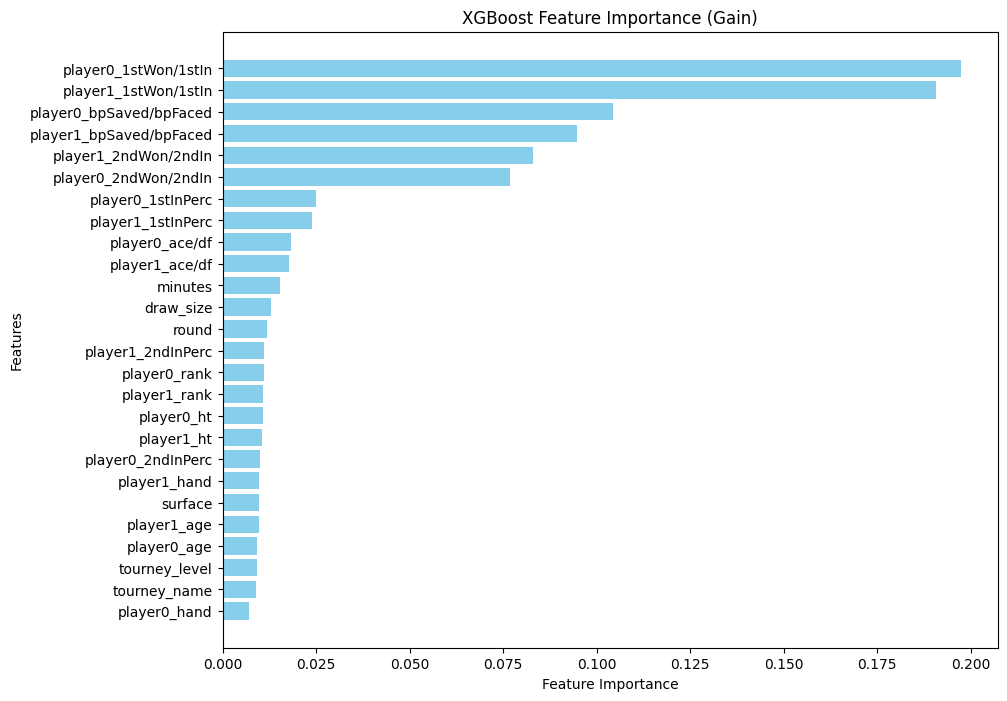

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_XGBoost(exclude_year)
evaluate_XGBoost(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train and predict only with rank

In [ ]:
only_rank = data[['player0_rank', 'player1_rank', 'winner']]
only_rank

player0_rank  player1_rank  winner
0              11.0          63.0       0
1              49.0         211.0       1
4             167.0          34.0       0
5              70.0          50.0       1
6              60.0         246.0       0
...             ...           ...     ...
73220          68.0          45.0       1
73222          68.0          45.0       1
73224         348.0         247.0       1
73231          68.0         171.0       1
73232         171.0          68.0       0

[46935 rows x 3 columns]

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64
Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.63
ROC AUC: 0.69
Train Accuracy: 0.6830190689251092, Test Accuracy: 0.6336422712261638
Precision: 0.63
Recall: 0.62
F1 Score: 0.63
Specificity: 0.65


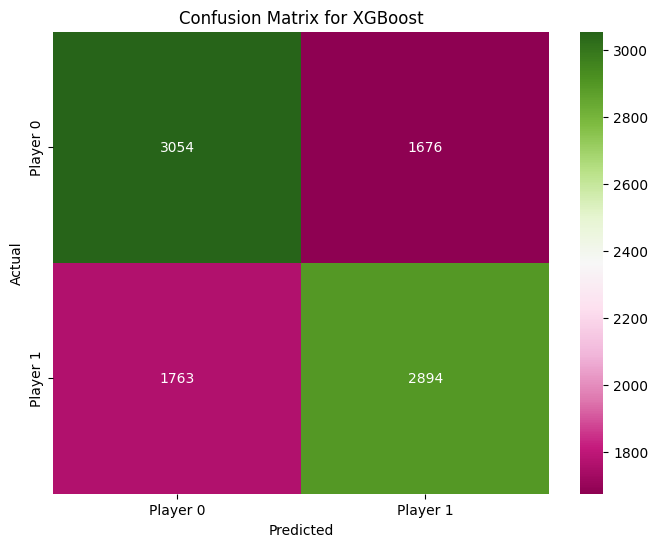

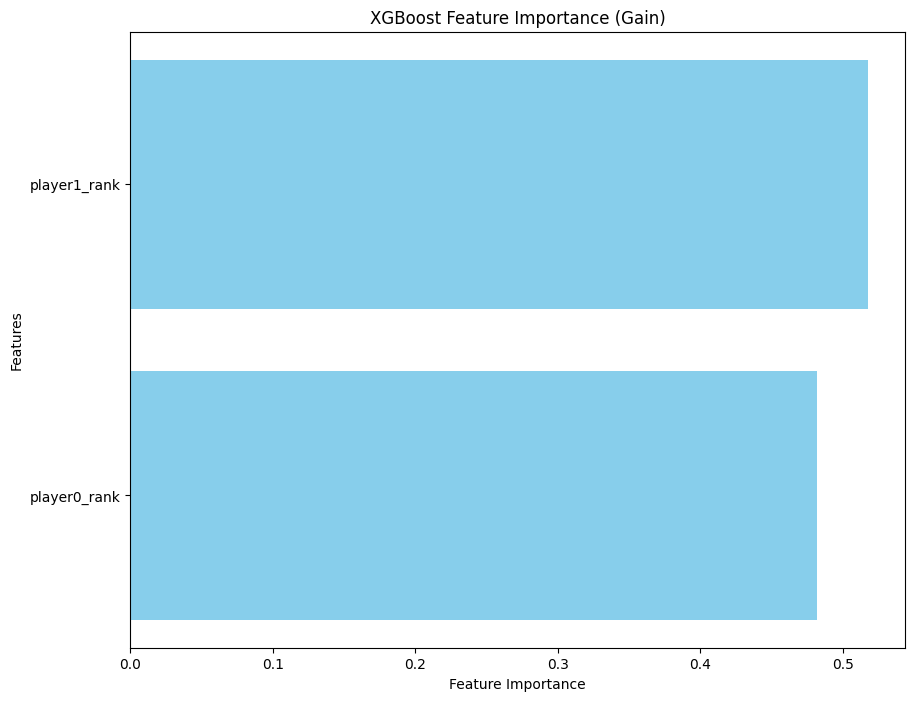

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_XGBoost(only_rank)
evaluate_XGBoost(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train and predict only with serve-related data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46935 entries, 0 to 73232
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player0_1stInPerc        46935 non-null  float64
 1   player0_1stWon/1stIn     46935 non-null  float64
 2   player0_2ndInPerc        46935 non-null  float64
 3   player0_2ndWon/2ndIn     46935 non-null  float64
 4   player0_ace/df           46935 non-null  float64
 5   player0_age              46935 non-null  float64
 6   player0_bpSaved/bpFaced  46935 non-null  float64
 7   player0_hand             46935 non-null  int64  
 8   player0_ht               46935 non-null  float64
 9   player0_rank             46935 non-null  float64
 10  player1_1stInPerc        46935 non-null  float64
 11  player1_1stWon/1stIn     46935 non-null  float64
 12  player1_2ndInPerc        46935 non-null  float64
 13  player1_2ndWon/2ndIn     46935 non-null  float64
 14  player1_ace/df           46

In [ ]:
serve_features = ['player0_1stInPerc', 'player1_1stInPerc',
                   'player0_2ndInPerc', 'player1_2ndInPerc',
                   'player0_ace/df', 'player1_ace/df',
                   'player0_bpSaved/bpFaced', 'player1_bpSaved/bpFaced',
                  #  'player0_1stWon/1stIn', 'player1_1stWon/1stIn',
                  #  'player0_2ndWon/2ndIn', 'player1_2ndWon/2ndIn',
                   'winner']
only_serve = data[serve_features]

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64
Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.84
ROC AUC: 0.92
Train Accuracy: 0.892697347395334, Test Accuracy: 0.8381804623415362
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
Specificity: 0.84


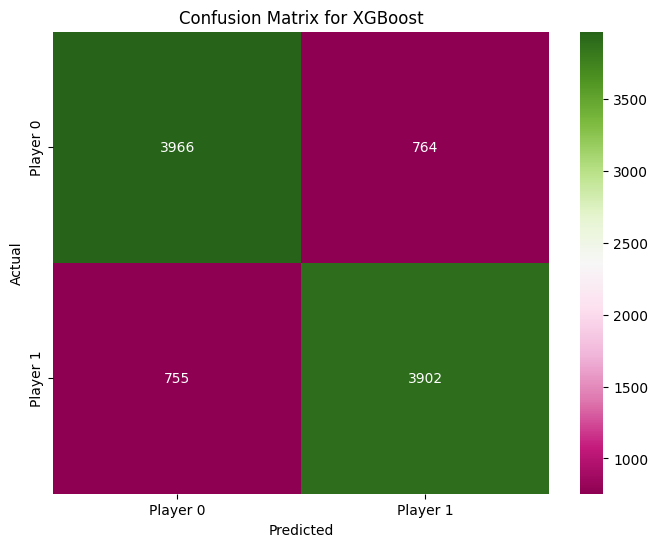

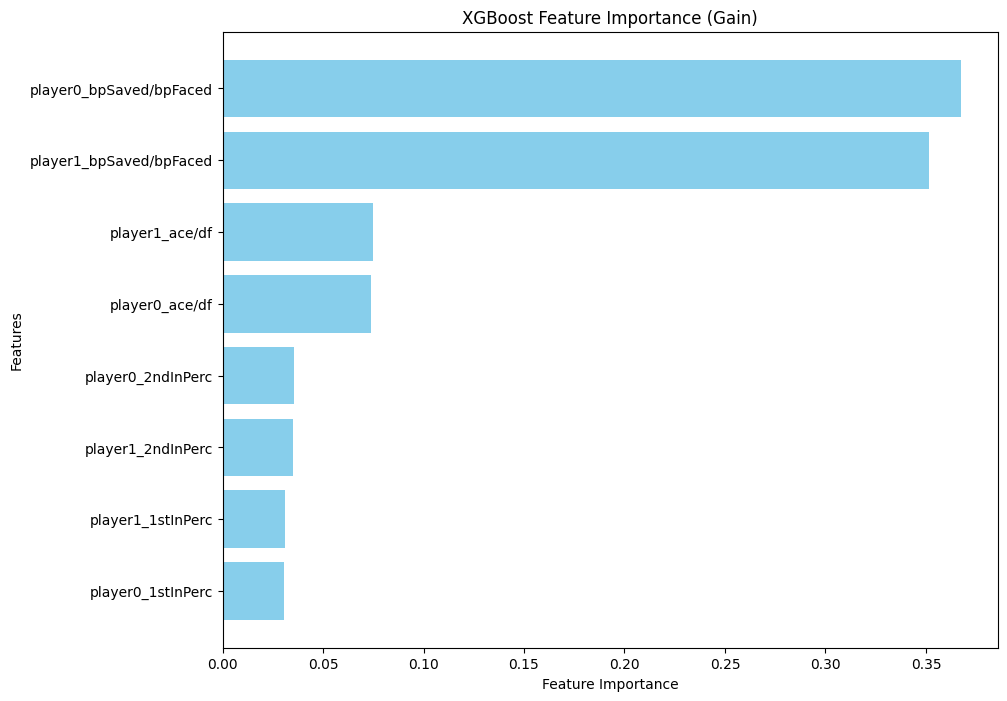

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_XGBoost(only_serve)
evaluate_XGBoost(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train with rank and serve-related features

In [83]:
serve_and_rank = data[['player0_rank', 'player1_rank',
                        'player0_1stInPerc', 'player1_1stInPerc',
                        'player0_2ndInPerc', 'player1_2ndInPerc',
                        'player0_ace/df', 'player1_ace/df',
                        'player0_bpSaved/bpFaced', 'player1_bpSaved/bpFaced',
                        'winner']]
serve_and_rank

player0_rank  player1_rank  player0_1stInPerc  player1_1stInPerc  \
0              11.0          63.0           0.510417           0.518868   
1             211.0          49.0           0.684211           0.432432   
4             167.0          34.0           0.673469           0.500000   
5              70.0          50.0           0.619048           0.584158   
6             246.0          60.0           0.652174           0.516667   
...             ...           ...                ...                ...   
73220          68.0          45.0           0.521739           0.586957   
73222          68.0          45.0           0.620690           0.700000   
73224         348.0         247.0           0.607843           0.625000   
73231         171.0          68.0           0.695652           0.589744   
73232          68.0         171.0           0.656863           0.652632   

       player0_2ndInPerc  player1_2ndInPerc  player0_ace/df  player1_ace/df  \
0               0.447917           0.405660        4.500000        0.875000   
1               0.276316           0.432432        1.666667        0.500000   
4               0.306122           0.413043        0.500000        1.000000   
5               0.352381           0.386139        1.000000        1.666667   
6               0.275362           0.350000        0.200000        0.500000   
...                  ...                ...             ...             ...   
73220           0.369565           0.391304        0.400000        4.000000   
73222           0.293103           0.275000        0.400000        1.000000   
73224           0.352941           0.325000        0.500000        5.000000   
73231           0.282609           0.358974        3.000000        1.000000   
73232           0.313725           0.336842        1.333333        5.000000   

       player0_bpSaved/bpFaced  player1_bpSaved/bpFaced  winner  
0                     0.600000                 0.571429       0  
1                     0.833333                 0.500000       0  
4                     0.545455                 0.555556       0  
5                     0.400000                 0.250000       1  
6                     0.750000                 0.666667       1  
...                        ...                      ...     ...  
73220                 0.444444                 0.000000       1  
73222                 0.500000                 1.000000       1  
73224                 0.444444                 1.000000       1  
73231                 0.000000                 0.166667       0  
73232                 0.500000                 0.500000       1  

[46935 rows x 11 columns]

Training set class distribution:
winner
0    0.501784
1    0.498216
Name: proportion, dtype: float64
Test set class distribution:
winner
1    0.505273
0    0.494727
Name: proportion, dtype: float64

Accuracy: 0.85
ROC AUC: 0.93
Train Accuracy: 0.9048950676467455, Test Accuracy: 0.8487269628209225
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Specificity: 0.85


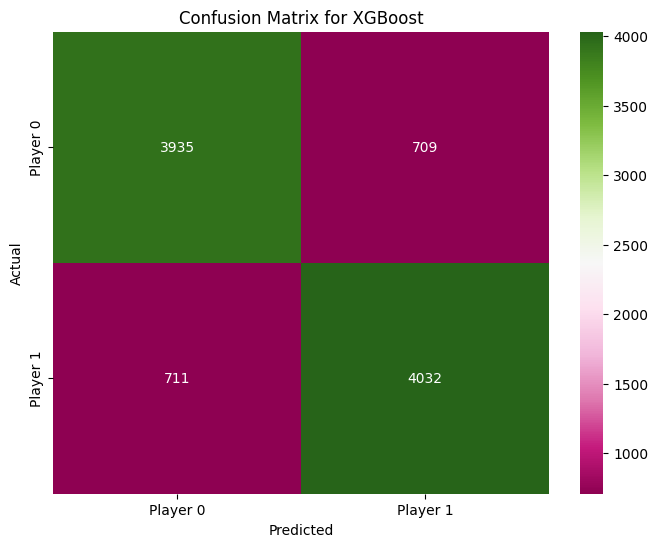

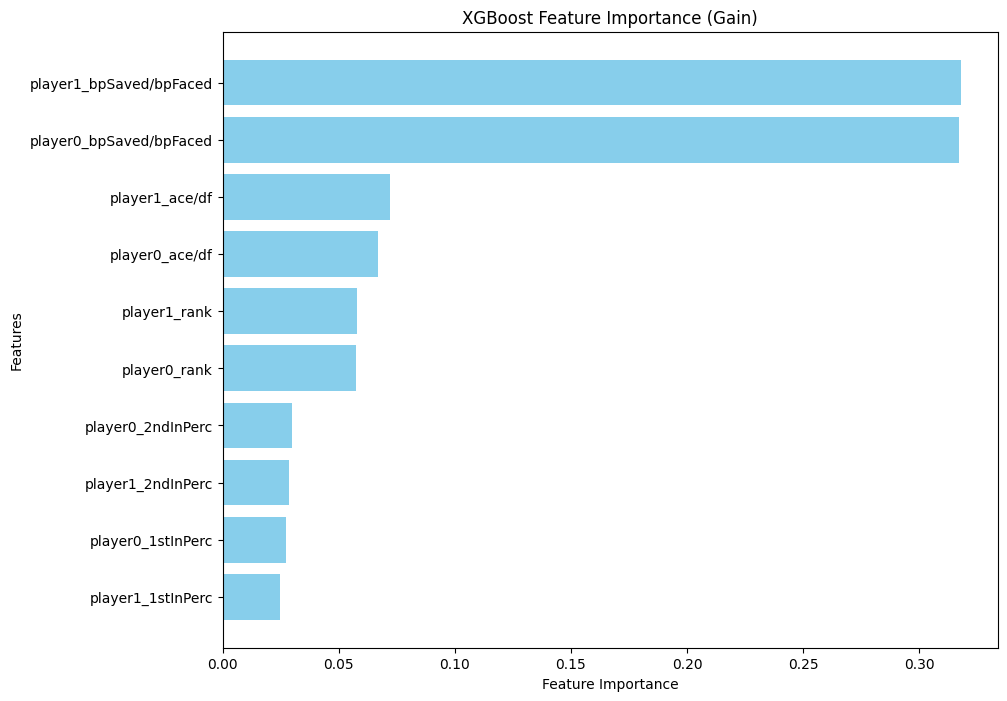

In [84]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_XGBoost(serve_and_rank)
evaluate_XGBoost(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

# Random Forest

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46935 entries, 0 to 73232
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player0_1stInPerc        46935 non-null  float64
 1   player0_1stWon/1stIn     46935 non-null  float64
 2   player0_2ndInPerc        46935 non-null  float64
 3   player0_2ndWon/2ndIn     46935 non-null  float64
 4   player0_ace/df           46935 non-null  float64
 5   player0_age              46935 non-null  float64
 6   player0_bpSaved/bpFaced  46935 non-null  float64
 7   player0_hand             46935 non-null  int64  
 8   player0_ht               46935 non-null  float64
 9   player0_rank             46935 non-null  float64
 10  player1_1stInPerc        46935 non-null  float64
 11  player1_1stWon/1stIn     46935 non-null  float64
 12  player1_2ndInPerc        46935 non-null  float64
 13  player1_2ndWon/2ndIn     46935 non-null  float64
 14  player1_ace/df           46

## Train and predict function

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def train_predict_RandomForest(data):
    # Separate features and target
    X = data.drop('winner', axis=1)
    y = data['winner']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Get probability of predicting 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    return [model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob]

## Evaluate function

In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_RandomForest(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob):
    # Class distribution in the training set
    print("Training set class distribution:")
    print(y_train.value_counts(normalize=True))

    # Class distribution in the test set
    print("\nTest set class distribution:")
    print(y_test.value_counts(normalize=True))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\nAccuracy: {accuracy:.2f}')

    # Area Under the Curve (AUC)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f'ROC AUC: {roc_auc:.2f}')

    # Train vs. Test Accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f'Precision: {precision:.2f}')

    # Recall (Sensitivity)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall:.2f}')

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    # Specificity
    specificity = TN / (TN + FP)
    print(f'Specificity: {specificity:.2f}')

    # Plotting the Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='PiYG', xticklabels=['Player 0', 'Player 1'], yticklabels=['Player 0', 'Player 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Random Forest')
    plt.show()

    # Plot feature importance
    importances = model.feature_importances_

    # Create a DataFrame for better readability
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns, # feature names (predictors)
        'Importance': importances
    })

    # Sort features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Random Forest Feature Importance (Gain)')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

## Train and predict with all data

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64

Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.93
ROC AUC: 0.98
Train Accuracy: 1.00, Test Accuracy: 0.93
Precision: 0.93
Recall: 0.92
F1 Score: 0.93
Specificity: 0.94


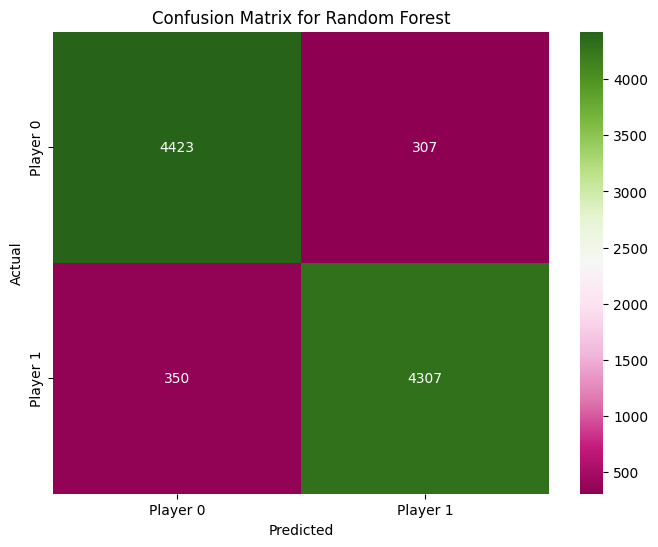

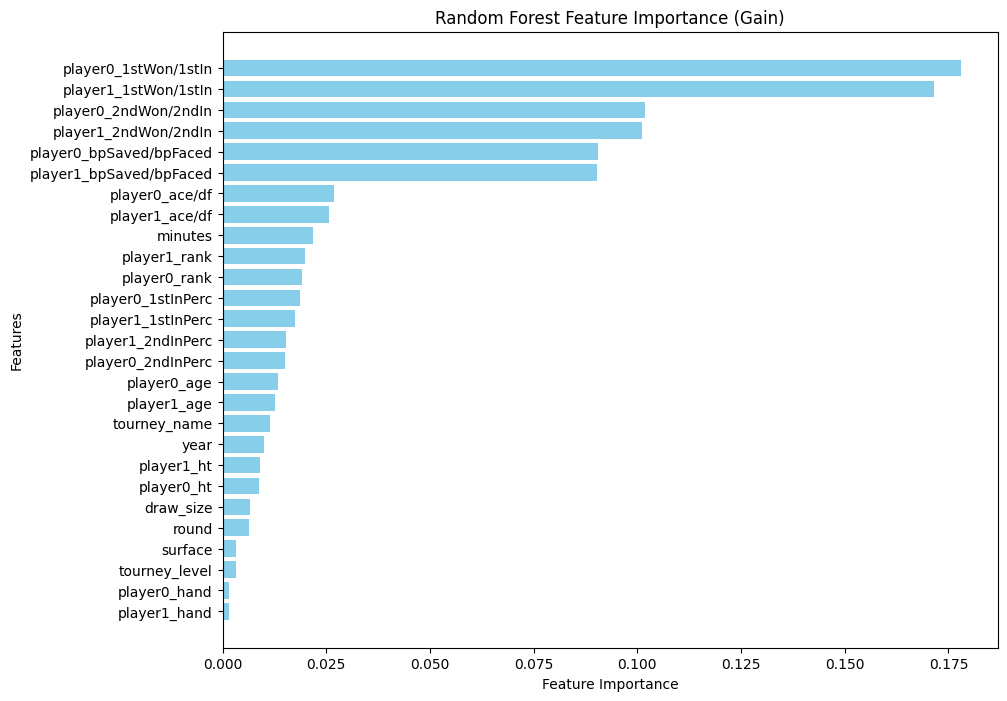

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_RandomForest(data)
evaluate_RandomForest(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train and predict without year

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64

Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.93
ROC AUC: 0.98
Train Accuracy: 1.00, Test Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Specificity: 0.94


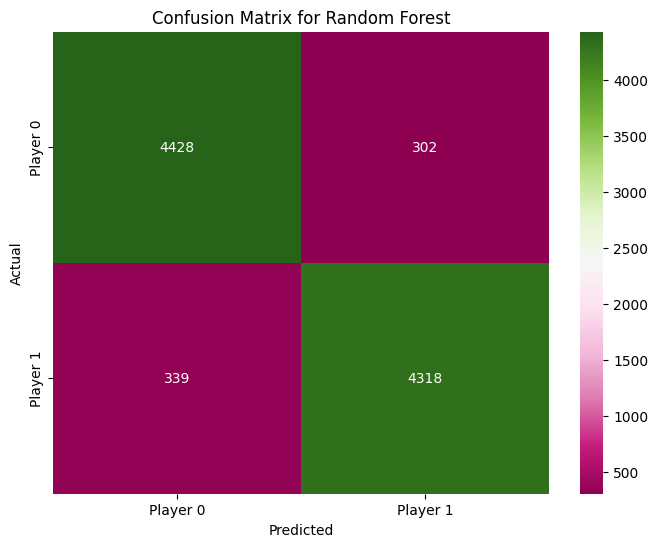

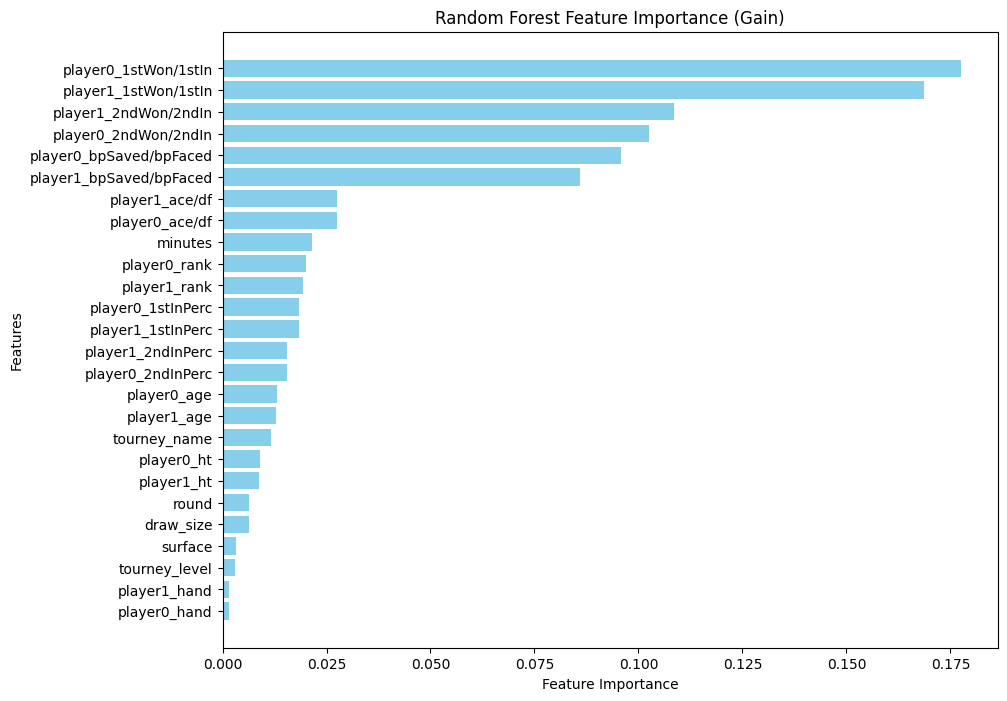

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_RandomForest(exclude_year)
evaluate_RandomForest(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train and predict only with rank

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64

Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.59
ROC AUC: 0.63
Train Accuracy: 0.82, Test Accuracy: 0.59
Precision: 0.59
Recall: 0.58
F1 Score: 0.58
Specificity: 0.60


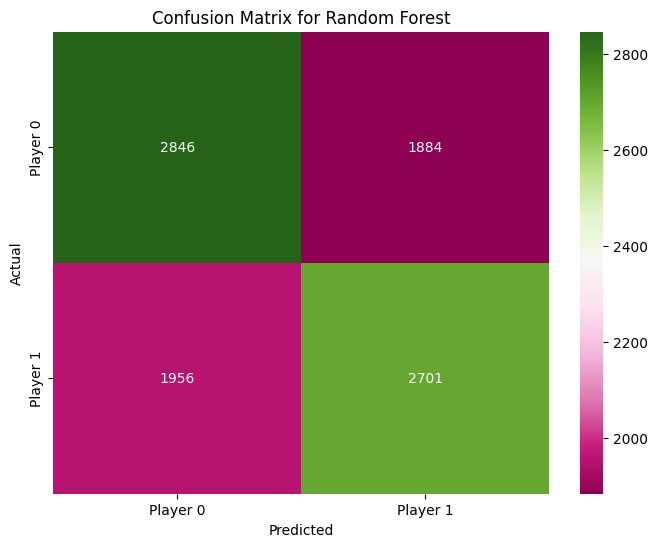

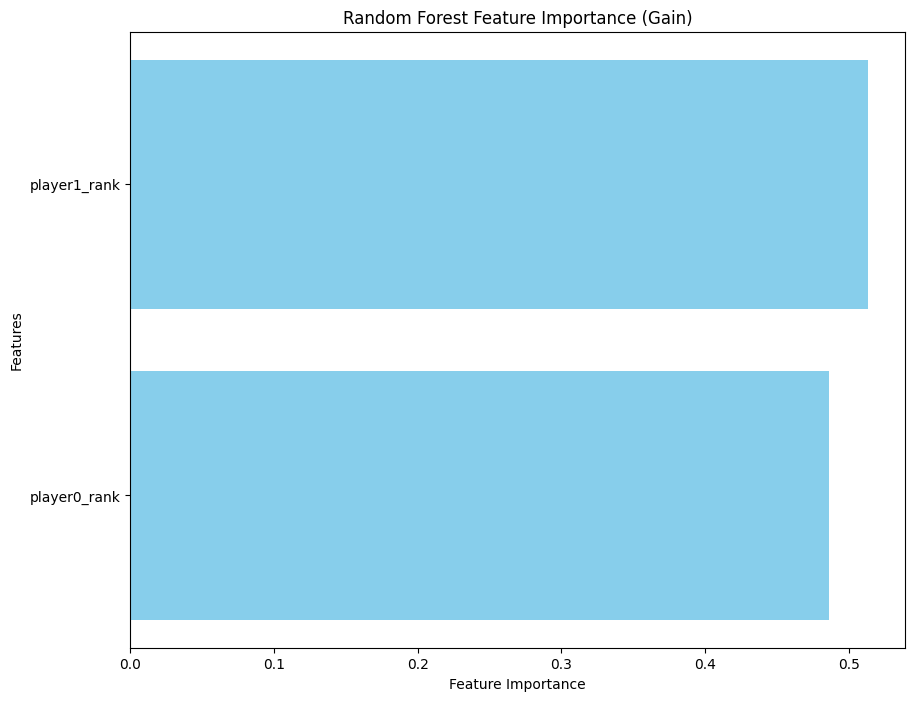

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_RandomForest(only_rank)
evaluate_RandomForest(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train and predict only with serve-related data

Training set class distribution:
winner
0    0.503516
1    0.496484
Name: proportion, dtype: float64

Test set class distribution:
winner
0    0.503888
1    0.496112
Name: proportion, dtype: float64

Accuracy: 0.81
ROC AUC: 0.90
Train Accuracy: 1.00, Test Accuracy: 0.81
Precision: 0.81
Recall: 0.80
F1 Score: 0.80
Specificity: 0.81


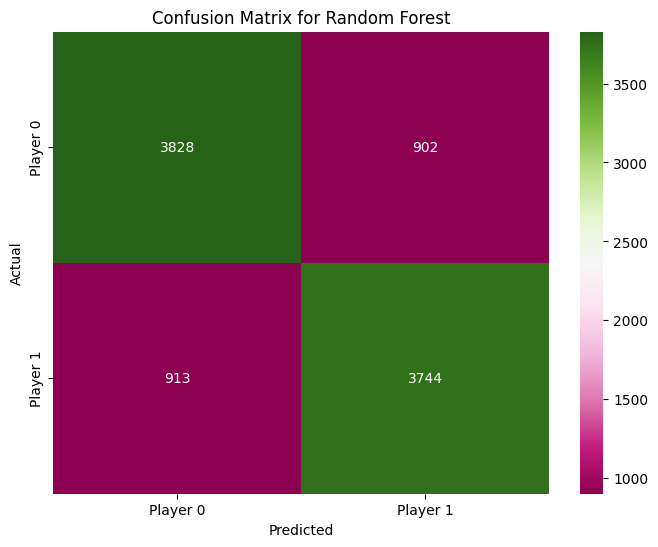

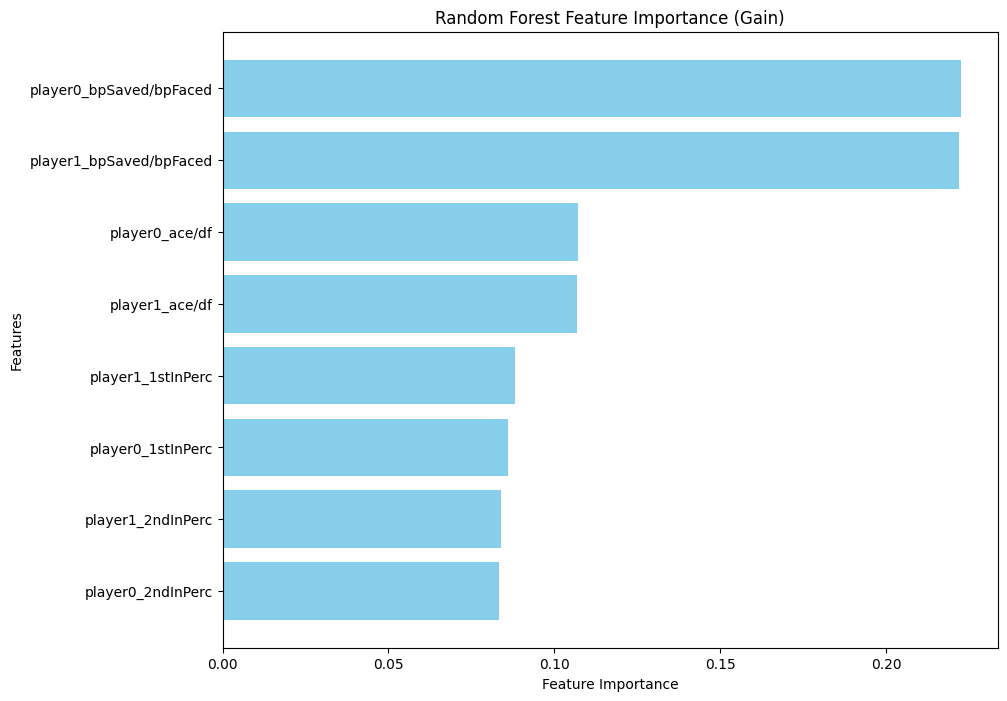

In [ ]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_RandomForest(only_serve)
evaluate_RandomForest(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)

## Train with rank and serve-related features

Training set class distribution:
winner
0    0.501784
1    0.498216
Name: proportion, dtype: float64

Test set class distribution:
winner
1    0.505273
0    0.494727
Name: proportion, dtype: float64

Accuracy: 0.82
ROC AUC: 0.91
Train Accuracy: 1.00, Test Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Specificity: 0.82


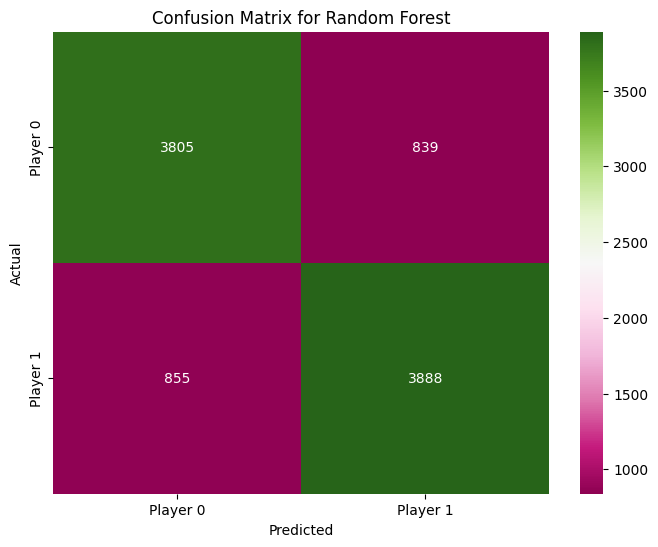

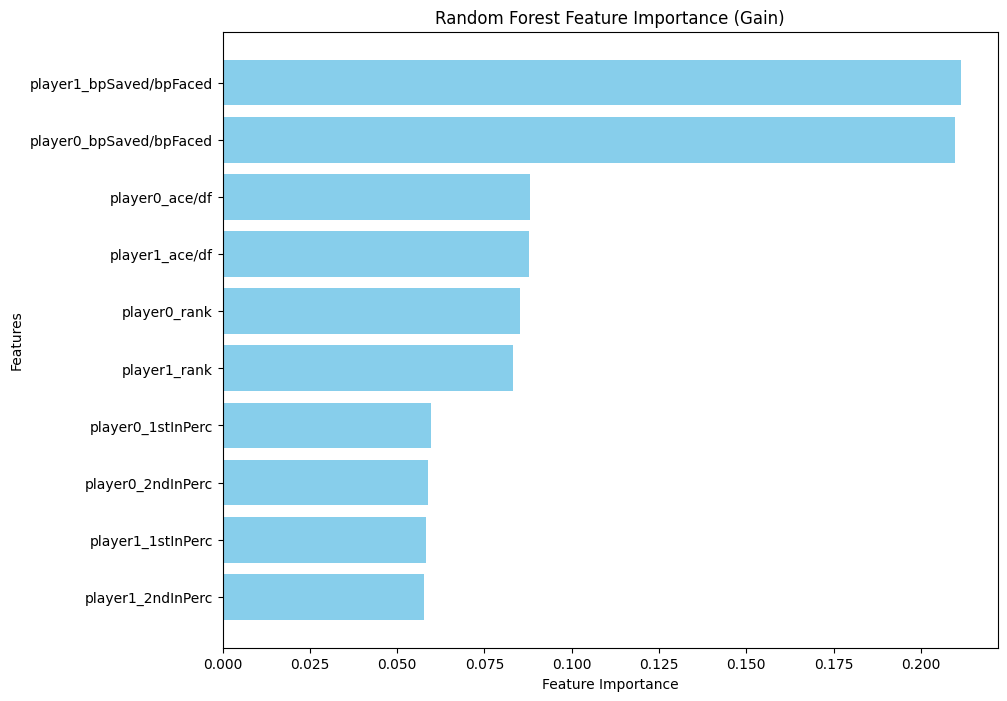

In [88]:
model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob = train_predict_RandomForest(serve_and_rank)
evaluate_RandomForest(model, X_train, X_test, y_train, y_test, y_pred, y_pred_prob)